# 🌍 Analyzing Global Economic Growth
## The Impact of International Trade on GDP and Economic Indicators

---

### **Research Question**
*To what extent do international trade (imports and exports) correlate with the economic growth of nations?*

### **Objective**
This analysis investigates the relationship between international trade, imports, exports, and GDP across **220 countries** from **1970 to 2021** using the Global Economy Indicators dataset.

### **Key Metrics Analyzed:**
- 📊 Gross Domestic Product (GDP)
- 💰 Gross National Income (GNI) per capita
- 📦 Exports and Imports of goods and services
- 👥 Population dynamics
- 💱 Exchange rates
- 🏭 Sector contributions (Agriculture, Manufacturing, Services)

### **Dataset Source**
[Global Economy Indicators - Kaggle](https://www.kaggle.com/datasets/prasad22/global-economy-indicators)

### **Analysis Period:** 1970 - 2021 (52 years)

---


In [29]:
# ==============================================================================
# IMPORT LIBRARIES
# ==============================================================================

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization - Static (GitHub-friendly, primary use)
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization - Interactive (For Dashboard)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score

# Utilities
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [30]:
# Load data
file_path = "/Users/sere/Downloads/My Projects/Global Economy Indicators/data/Global Economy Indicators.csv"
df = pd.read_csv(file_path)

# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

display(Markdown("### 📁 Dataset Loaded Successfully"))
print(f"Dataset Dimensions: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Time Period: {df['Year'].min()} - {df['Year'].max()}")
print(f"Number of Countries: {df['Country'].nunique()}")

### 📁 Dataset Loaded Successfully

Dataset Dimensions: 10,512 rows × 26 columns
Time Period: 1970 - 2021
Number of Countries: 220


In [31]:
# INITIAL DATA EXPLORATION

display(Markdown("## Initial Data Exploration"))
display(Markdown("### **First 5 Rows:**"))
display(df.head())

display(Markdown("### **Last 5 Rows:**"))
display(df.tail())

display(Markdown("### **Random Sample:**"))
display(df.sample(5, random_state=42))

## Initial Data Exploration

### **First 5 Rows:**

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,Final consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.04,0.04,10752971,Afghani,164,869917407.00,NaN,46793902.00,165618722.00,1663221269.00,112126986.00,94611818.00,94611818.00,1551094283.00,195277226.00,370146827.00,376690811.00,127747843.00,1731454254.00,83917200.00,226387091.00,1766527525.00,1731435587.00
1,4,Afghanistan,1971,0.04,0.04,11015857,Afghani,168,910828104.00,NaN,48994113.00,193580300.00,1796541240.00,121114833.00,99012350.00,99012350.00,1675426407.00,276296480.00,387549502.00,394401164.00,133754097.00,1812857077.00,87860382.00,237019196.00,1850121913.00,1812837521.00
2,4,Afghanistan,1972,0.04,0.04,11286753,Afghani,149,827945340.00,NaN,44535223.00,227654380.00,1607159399.00,108347543.00,103456794.00,103456794.00,1498811856.00,290370350.00,352284669.00,358512865.00,121582672.00,1647917912.00,79864525.00,215477287.00,1683947905.00,1647900178.00
3,4,Afghanistan,1973,0.04,0.04,11575305,Afghani,150,855486925.00,NaN,46018542.00,226913554.00,1617037233.00,109013455.00,121728433.00,121728433.00,1508023800.00,262962880.00,364010279.00,370445793.00,125630236.00,1702734673.00,82528885.00,222624293.00,1739998153.00,1702716294.00
4,4,Afghanistan,1974,0.04,0.04,11869879,Afghani,177,1035913365.00,NaN,55721659.00,284938449.00,1907408182.00,128588961.00,175061875.00,175061875.00,1778819221.00,305679151.00,440760406.00,448552790.00,152119162.00,2061751510.00,99918604.00,269525910.00,2106420227.00,2061729287.00


### **Last 5 Rows:**

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,Final consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
10507,894,Zambia,2017,9.52,9.52,17298054,Kwacha,1448,1041005150.00,567729313.00,2455716846.00,9052007684.00,15702400095.00,3549314035.00,10606752974.00,10039023662.00,12153086060.00,9465894906.00,2102368508.00,7194153137.00,6187123926.00,24166615021.00,1965026231.00,5323589731.00,25056039122.00,25868161487.00
10508,894,Zambia,2018,10.46,10.46,17835893,Kwacha,1451,879116033.00,929063411.00,2516888819.00,9987350922.00,15175899896.00,3343898559.00,10167235075.00,9238171664.00,11832001337.00,9717268554.00,1801783275.00,6556883733.00,5791375325.00,24225704415.00,2490720067.00,5990720439.00,25884551401.00,26311984736.00
10509,894,Zambia,2019,12.89,12.89,18380477,Kwacha,1246,666838493.00,817104395.00,2560456980.00,8073599669.00,13970260569.00,4122148918.00,9151848518.00,8334744124.00,9848111651.00,7961414619.00,1582484188.00,5584425195.00,5231061681.00,21539705859.00,2537646020.00,4959277491.00,22910111424.00,23310362238.00
10510,894,Zambia,2020,18.34,18.34,18927715,Kwacha,928,539169351.00,439295787.00,2661360906.00,8473999612.00,9633639757.00,2664372735.00,5848494441.00,5409198654.00,6969267022.00,5892353020.00,1397302739.00,4269405326.00,4217430508.00,17180203862.00,2258715217.00,3234122554.00,17562333727.00,18110638617.00
10511,894,Zambia,2021,20.02,20.02,19473125,Kwacha,1062,628528683.00,293485060.00,3252116619.00,11501344444.00,11444642581.00,3021303145.00,6102614423.00,5809129363.00,8423339436.00,7735234719.00,1876458190.00,6639509940.00,4250491657.00,20712541286.00,2060541275.00,3881353112.00,20679619455.00,21313366728.00


### **Random Sample:**

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,Construction (ISIC F),Exports of goods and services,Final consumption expenditure,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
3434,276,Germany,1971,1.79,1.79,78511398,Euro,3196,6846629322.00,3517980024.00,20806091166.00,36398248225.00,183000000000.00,43379446715.00,79519021251.00,76001041227.00,139000000000.00,40706464995.00,74613152327.00,85645654059.00,67877111461.00,228000000000.00,15392076141.00,31739177048.00,251000000000.00,250000000000.00
5515,446,"China, Macao SAR",2020,7.99,7.99,676283,Pataca,44895,NaN,-94504212.00,1584040796.00,15806361412.00,18456484821.00,6545324163.00,6540818002.00,6635322213.00,11911160658.00,15217431191.00,218799155.00,563144966.00,16202903589.00,21351568154.00,729247071.00,2272231733.00,30361687333.00,25586233044.00
33,4,Afghanistan,2003,48.76,48.76,22645130,Afghani,209,1981633068.00,NaN,216394293.00,1948898419.00,6269973449.00,438135689.00,537868146.00,537868146.00,5831837759.00,3799110373.00,691580599.00,703842914.00,676723389.00,4583535524.00,545463877.00,459477984.00,4721728965.00,4729042179.00
2319,191,Croatia,1997,6.16,6.16,4711373,Croatian Kuna,5100,1259702292.00,956987415.00,1501026871.00,7460836598.00,20987154746.00,5345614567.00,6117570780.00,5160583365.00,15641540178.00,10535919148.00,4040591886.00,4887881883.00,7207532632.00,20192067604.00,1862210245.00,3473713681.00,24030194872.00,24029659208.00
2900,231,Ethiopia,2001,8.46,8.46,69018932,Ethiopian Birr,115,3455052598.00,NaN,319494879.00,963182977.00,6919795183.00,1246632096.00,1876462423.00,1876462423.00,5673163087.00,1904625229.00,456152833.00,667441342.00,1676134481.00,7532957684.00,332851515.00,1081982870.00,7930286457.00,7963475849.00


In [32]:
# DATA STRUCTURE OVERVIEW

display(Markdown("### **Dataset Information:**"))
print(df.info())

display(Markdown("\n### **Data Types Summary:**"))
print(df.dtypes.value_counts())

display(Markdown("\n### **Column Names:**"))
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

### **Dataset Information:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10512 entries, 0 to 10511
Data columns (total 26 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   CountryID                                                                                 10512 non-null  int64  
 1   Country                                                                                   10512 non-null  object 
 2   Year                                                                                      10512 non-null  int64  
 3   AMA exchange rate                                                                         10512 non-null  float64
 4   IMF based exchange rate                                                                   10512 non-null  float64
 5   Population                                           


### **Data Types Summary:**

float64    20
int64       4
object      2
Name: count, dtype: int64



### **Column Names:**

 1. CountryID
 2. Country
 3. Year
 4. AMA exchange rate
 5. IMF based exchange rate
 6. Population
 7. Currency
 8. Per capita GNI
 9. Agriculture, hunting, forestry, fishing (ISIC A-B)
10. Changes in inventories
11. Construction (ISIC F)
12. Exports of goods and services
13. Final consumption expenditure
14. General government final consumption expenditure
15. Gross capital formation
16. Gross fixed capital formation (including Acquisitions less disposals of valuables)
17. Household consumption expenditure (including Non-profit institutions serving households)
18. Imports of goods and services
19. Manufacturing (ISIC D)
20. Mining, Manufacturing, Utilities (ISIC C-E)
21. Other Activities (ISIC J-P)
22. Total Value Added
23. Transport, storage and communication (ISIC I)
24. Wholesale, retail trade, restaurants and hotels (ISIC G-H)
25. Gross National Income(GNI) in USD
26. Gross Domestic Product (GDP)


## Data Quality Assessment

### **Missing Values Analysis:**

,Column,Missing_Count,Missing_Percentage
Changes in inventories,Changes in inventories,1841,17.513318
"Agriculture, hunting, forestry, fishing (ISIC A-B)","Agriculture, hunting, forestry, fishing (ISIC A-B)",121,1.151065
General government final consumption expenditure,General government final consumption expenditure,52,0.494673
Gross fixed capital formation (including Acquisitions less disposals of valuables),Gross fixed capital formation (including Acquisitions less disposals of valuables),52,0.494673
Household consumption expenditure (including Non-profit institutions serving households),Household consumption expenditure (including Non-profit institutions serving households),52,0.494673
Gross capital formation,Gross capital formation,52,0.494673
"Wholesale, retail trade, restaurants and hotels (ISIC G-H)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",49,0.466134
"Transport, storage and communication (ISIC I)","Transport, storage and communication (ISIC I)",49,0.466134
Manufacturing (ISIC D),Manufacturing (ISIC D),43,0.409056
Imports of goods and services,Imports of goods and services,42,0.399543


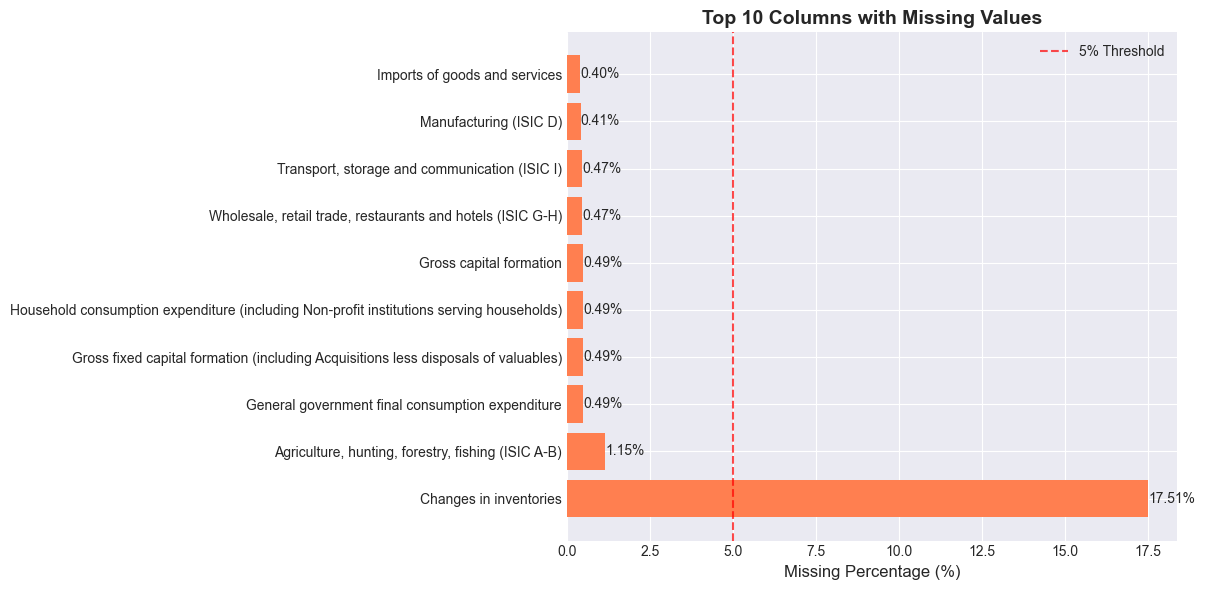


✅ Total missing values: 2,374
📊 Columns with missing data: 11


In [33]:
# MISSING VALUE ANALYSIS

display(Markdown("## Data Quality Assessment"))
display(Markdown("### **Missing Values Analysis:**"))

# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('Missing_Percentage', ascending=False)

# Display missing values table
display(missing_data[missing_data['Missing_Count'] > 0].style.background_gradient(
    cmap='Reds', subset=['Missing_Percentage']
))

# Visualize missing values
fig, ax = plt.subplots(figsize=(12, 6))
missing_cols = missing_data[missing_data['Missing_Count'] > 0].head(10)
bars = ax.barh(missing_cols['Column'], missing_cols['Missing_Percentage'], color='coral')
ax.set_xlabel('Missing Percentage (%)', fontsize=12)
ax.set_title('Top 10 Columns with Missing Values', fontsize=14, fontweight='bold')
ax.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='5% Threshold')
ax.legend()

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:.2f}%', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n✅ Total missing values: {df.isnull().sum().sum():,}")
print(f"📊 Columns with missing data: {(df.isnull().sum() > 0).sum()}")

## Data Quality Assessment

### Missing Values: Analysis and Strategy

Upon initial inspection, the dataset contains **2,374 missing values** across **11 columns** out of 10,512 total records. Understanding the extent and pattern of missing data is crucial for maintaining analytical integrity.

#### **Missing Data Distribution:**

The missing values are not uniformly distributed:

1. **High Missing Rate (>10%):**
   - `Changes in inventories`: **17.51% missing** (1,841 values)
   
2. **Low Missing Rate (<2%):**
   - `Agriculture, hunting, forestry, fishing (ISIC A-B)`: 1.15%
   - `General government final consumption expenditure`: 0.49%
   - `Gross capital formation`: 0.49%
   - `Household consumption expenditure`: 0.49%
   - Other economic indicators: <0.5%

#### **Our Approach:**

**For High Missing Rate Columns (>10%):**
- **Decision:** Remove `Changes in inventories` from analysis
- **Rationale:** 
  - 17.51% missing data exceeds the acceptable threshold (typically 5-10%)
  - This variable is not central to our research question about trade-GDP correlation
  - Imputing such a large proportion could introduce significant bias
  - Better to work with complete, reliable data for core metrics

**For Low Missing Rate Columns (<2%):**
- **Decision:** Apply mean imputation
- **Rationale:**
  - Missing percentages are minimal (<0.5% for most columns)
  - These are critical economic indicators central to our analysis
  - Mean imputation is appropriate as:
    - Economic data tends to be normally distributed within countries
    - Small missing percentages minimize bias introduction
    - Maintains sample size (10,512 records across 220 countries)
  - Alternative approaches (dropping rows) would lose valuable country-year observations

#### **Why Not Other Methods?**

- **Forward/Backward Fill:** Inappropriate - missing values aren't time-dependent patterns
- **Median Imputation:** Mean preferred for economic metrics that follow normal distributions
- **Dropping Rows:** Would lose 2,374 observations, reducing dataset by ~22.6%
- **Advanced Methods (KNN, MICE):** Unnecessary complexity for <2% missing data

This balanced approach preserves data integrity while maintaining analytical power for our core research questions.

In [34]:
# DUPLICATE CHECK and DATA TYPE VALIDATION

display(Markdown("### **Duplicate Rows:**"))
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("⚠️ Duplicates found - will be removed in cleaning")
else:
    print("✅ No duplicates found")

display(Markdown("\n### **Unique Countries and Time Period:**"))
print(f"🌍 Unique Countries: {df['Country'].nunique()}")
print(f"📅 Years Covered: {df['Year'].min()} - {df['Year'].max()} ({df['Year'].max() - df['Year'].min() + 1} years)")
print(f"💱 Unique Currencies: {df['Currency'].nunique()}")

# Check for countries with incomplete time series
display(Markdown("\n### **Data Completeness by Country:**"))
country_year_count = df.groupby('Country')['Year'].count().sort_values()
print(f"\nCountries with full 52-year data: {(country_year_count == 52).sum()}")
print(f"Countries with incomplete data: {(country_year_count < 52).sum()}")

# Show countries with least data
print("\n📉 Countries with Least Data Points:")
print(country_year_count.head(10))

### **Duplicate Rows:**

Number of duplicate rows: 0
✅ No duplicates found



### **Unique Countries and Time Period:**

🌍 Unique Countries: 220
📅 Years Covered: 1970 - 2021 (52 years)
💱 Unique Currencies: 153



### **Data Completeness by Country:**


Countries with full 52-year data: 179
Countries with incomplete data: 41

📉 Countries with Least Data Points:
Country
 Sudan                            14
 South Sudan                      14
 Sint Maarten (Dutch part)        17
 Curaçao                          17
 Yugoslavia (Former)              21
 Yemen Democratic (Former)        21
 Yemen Arab Republic (Former)     21
 USSR (Former)                    21
 Czechoslovakia (Former)          21
 Ethiopia (Former)                24
Name: Year, dtype: int64


### Duplicate Rows and Data Completeness: Analysis and Strategy

#### **Duplicate Assessment:**

A comprehensive check for duplicate records across all columns reveals **zero duplicate rows** in the dataset. This indicates excellent data quality and consistent data collection practices across the 52-year period. No action is required for duplicate handling.

#### **Data Completeness Analysis:**

While the dataset spans from 1970 to 2021 (52 years) and covers 220 countries, not all countries have complete time series data:

**Completeness Breakdown:**
- **179 countries (81.4%)**: Full 52-year data coverage
- **41 countries (18.6%)**: Incomplete time series

**Understanding Incomplete Data:**

The incomplete time series are not random missing data, but rather reflect **real-world geopolitical changes**:

1. **Former Countries (Dissolved Nations):**
   - USSR (Former) - 21 years → Dissolved in 1991, became 15 independent nations
   - Yugoslavia (Former) - 21 years → Dissolved in 1992, became 7 independent nations
   - Czechoslovakia (Former) - 21 years → Split in 1993 into Czechia and Slovakia
   - Yemen Arab Republic & Yemen Democratic (Former) - 21 years → Unified in 1990
   - Ethiopia (Former) - 24 years → Eritrea gained independence in 1993
   - Sudan (Former) - 14 years → South Sudan gained independence in 2011

2. **Newly Independent Countries:**
   - South Sudan - 14 years (independent since 2011)
   - Curaçao - 17 years (autonomous since 2010)
   - Sint Maarten - 17 years (autonomous since 2010)

3. **Historical Transitions:**
   - These represent legitimate historical events, not data quality issues
   - Successor states (e.g., Russia, Serbia, Czechia) appear as separate entries

#### **Our Approach:**

**Decision:** **Retain all 220 countries** with incomplete data flagged for appropriate handling.

**Rationale:**
- **Historical Value:** These transitions represent significant economic shifts worth studying
- **Maximum Information:** Retains 10,512 country-year observations
- **Analytical Flexibility:** Allows both complete-series and full-dataset analyses
- **Real-World Accuracy:** Reflects actual geopolitical changes, not missing data

**Implementation Strategy:**

1. **Add Data Flags:**
   - `Complete_Timeseries`: Boolean flag (True = 52 years, False = incomplete)
   - `Former_Country`: Boolean flag identifying dissolved nations
   
2. **Analysis-Specific Handling:**
   - **Year-over-Year Growth Rates:** Accept NaN for first year of new countries
   - **Time Series Analysis:** Option to filter to 179 complete countries
   - **Cross-Sectional Analysis:** Use all 220 countries (more representative)
   - **Global Aggregations:** Exclude former countries to prevent double-counting
   - **Clustering/ML Models:** Include all (snapshot-based, not time-dependent)

3. **Transparency:**
   - Clearly document which analyses use which subset
   - Note limitations in interpretation
   - Acknowledge that some trends may be influenced by country transitions

This approach balances analytical rigor with historical context, allowing us to tell a complete story of global economic development while being mindful of data limitations.

### **Outlier Analysis (Z-Score Method):**

Outlier counts by column (Z-score > 3):
Per capita GNI                       201
Exports of goods and services        185
Imports of goods and services        161
Population                           104
Gross Domestic Product (GDP)         103
Gross National Income(GNI) in USD    102
dtype: int64

Outlier percentages:
Per capita GNI                      1.91
Exports of goods and services       1.76
Imports of goods and services       1.53
Population                          0.99
Gross Domestic Product (GDP)        0.98
Gross National Income(GNI) in USD   0.97
dtype: float64


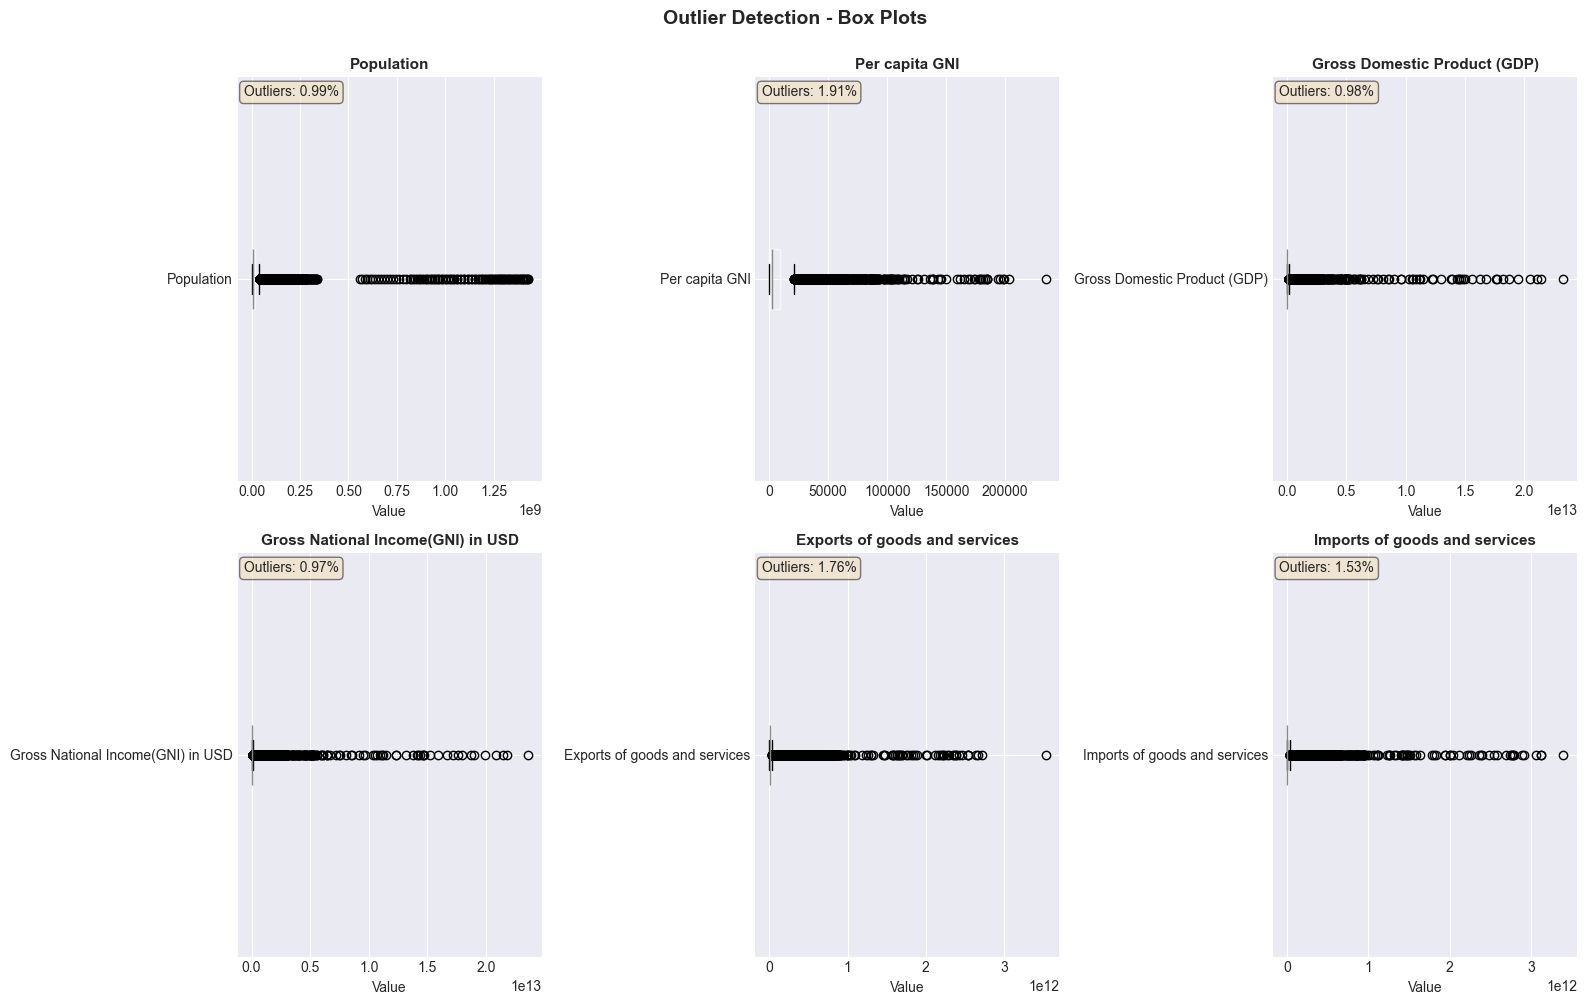

In [35]:
# OUTLIER DETECTION

display(Markdown("### **Outlier Analysis (Z-Score Method):**"))

# Select key economic indicators for outlier detection
outlier_columns = [
    'Population',
    'Per capita GNI',
    'Gross Domestic Product (GDP)',
    'Gross National Income(GNI) in USD',
    'Exports of goods and services',
    'Imports of goods and services'
]

# Calculate z-scores
z_scores = np.abs((df[outlier_columns] - df[outlier_columns].mean()) / df[outlier_columns].std())

# Identify outliers (|z| > 3)
outliers = (z_scores > 3)
outlier_counts = outliers.sum().sort_values(ascending=False)

# Display outlier counts
print("Outlier counts by column (Z-score > 3):")
print(outlier_counts)
print(f"\nOutlier percentages:")
print((outlier_counts / len(df) * 100).round(2))

# Visualize outliers with boxplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(outlier_columns):
    ax = axes[idx]
    df.boxplot(column=col, ax=ax, vert=False)
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Value')
    
    # Add statistics
    outlier_pct = (outliers[col].sum() / len(df) * 100)
    ax.text(0.02, 0.98, f'Outliers: {outlier_pct:.2f}%', 
            transform=ax.transAxes, va='top', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Outlier Detection - Box Plots', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()


**Comment:** Outliers represent legitimate extreme values (e.g., China, USA vs. small nations).  
These will be **retained** as they reflect real economic diversity.

In [36]:
# DATA CLEANING IMPLEMENTATION

display(Markdown("## Data Cleaning based on previous steps"))

# Create working data copy
df_clean = df.copy()
print("Starting data cleaning process...")
print(f"   Initial shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns\n")

# -----------------------------------------------------------------------------
# DROP HIGH-MISSING COLUMN
# -----------------------------------------------------------------------------
print("✅ Remove High-Missing Column")
if 'Changes in inventories' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Changes in inventories'])
    print(f"   Dropped 'Changes in inventories' (17.51% missing)")
    print(f"   New column count: {df_clean.shape[1]}")

# -----------------------------------------------------------------------------
# IMPUTE MISSING VALUES
# -----------------------------------------------------------------------------
print("\n✅ Missing Value Imputation")
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
missing_before = df_clean[numerical_cols].isnull().sum().sum()
affected_cols = (df[numerical_cols].isnull().sum() > 0).sum()

imputer = SimpleImputer(strategy='mean')
df_clean[numerical_cols] = imputer.fit_transform(df_clean[numerical_cols])

print(f"   Imputed {missing_before:,} missing values using mean strategy")
print(f"   Columns affected: {affected_cols}")
print(f"   Remaining missing values: {df_clean.isnull().sum().sum()}")

# -----------------------------------------------------------------------------
# CLEAN TEXT DATA
# -----------------------------------------------------------------------------
print("\n✅ Text Data Cleaning")
df_clean['Country'] = df_clean['Country'].str.strip()
df_clean['Currency'] = df_clean['Currency'].str.strip()
print(f"   Cleaned Country and Currency names (whitespace removed)")

# -----------------------------------------------------------------------------
# CREATE DATA QUALITY FLAGS
# -----------------------------------------------------------------------------
print("\n✅ Data Quality Flags")

# Complete Timeseries Flag
country_year_counts = df_clean.groupby('Country')['Year'].transform('count')
df_clean['Complete_Timeseries'] = (country_year_counts == 52)
print(f"   Created 'Complete_Timeseries' flag")
print(f"   → {df_clean[df_clean['Complete_Timeseries']]['Country'].nunique()} countries with complete data")

# Former Country Flag
former_countries = [
    'USSR (Former)', 
    'Yugoslavia (Former)', 
    'Czechoslovakia (Former)', 
    'Yemen Democratic (Former)', 
    'Yemen Arab Republic (Former)', 
    'Ethiopia (Former)', 
    'Sudan (Former)'
]
df_clean['Former_Country'] = df_clean['Country'].isin(former_countries)
former_count = df_clean['Former_Country'].sum()
print(f"   Created 'Former_Country' flag")
print(f"   → {former_count:,} records from dissolved nations")

# -----------------------------------------------------------------------------
# VALIDATION
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("🔍 DATA VALIDATION")
print("="*70)

# Check for missing values
missing_check = df_clean.isnull().sum().sum()
assert missing_check == 0, f"❌ ERROR: {missing_check} missing values still present!"
print(f"✅ Missing values: {missing_check}")

# Check for duplicates (final verification)
duplicate_check = df_clean.duplicated().sum()
print(f"✅ Duplicate rows: {duplicate_check}")

# Check data types
num_cols = len(df_clean.select_dtypes(include=[np.number]).columns)
cat_cols = len(df_clean.select_dtypes(include=['object']).columns)
bool_cols = len(df_clean.select_dtypes(include=['bool']).columns)
print(f"✅ Data types: {num_cols} numerical, {cat_cols} categorical, {bool_cols} boolean")

# Check shape
print(f"✅ Final shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")

print("\n" + "="*70)
print("DATA CLEANING COMPLETED SUCCESSFULLY!")
print("="*70)

# Display summary statistics
display(Markdown("\n### **Cleaned Dataset Summary:**"))
summary_stats = pd.DataFrame({
    'Metric': [
        'Total Records',
        'Total Columns',
        'Numerical Columns',
        'Categorical Columns',
        'Boolean Flags',
        'Unique Countries',
        'Time Period',
        'Complete Countries',
        'Former Countries',
        'Missing Values',
        'Duplicate Rows'
    ],
    'Value': [
        f"{df_clean.shape[0]:,}",
        f"{df_clean.shape[1]}",
        f"{num_cols}",
        f"{cat_cols}",
        f"{bool_cols}",
        f"{df_clean['Country'].nunique()}",
        f"{df_clean['Year'].min()} - {df_clean['Year'].max()}",
        f"{df_clean[df_clean['Complete_Timeseries']]['Country'].nunique()} (81%)",
        f"{df_clean[df_clean['Former_Country']]['Country'].nunique()}",
        f"{missing_check}",
        f"{duplicate_check}"
    ]
})

display(summary_stats.style.set_properties(**{
    'text-align': 'left',
    'font-size': '11pt'
}).hide(axis='index'))

## Data Cleaning based on previous steps

Starting data cleaning process...
   Initial shape: 10,512 rows × 26 columns

✅ Remove High-Missing Column
   Dropped 'Changes in inventories' (17.51% missing)
   New column count: 25

✅ Missing Value Imputation
   Imputed 533 missing values using mean strategy
   Columns affected: 10
   Remaining missing values: 0

✅ Text Data Cleaning
   Cleaned Country and Currency names (whitespace removed)

✅ Data Quality Flags
   Created 'Complete_Timeseries' flag
   → 179 countries with complete data
   Created 'Former_Country' flag
   → 170 records from dissolved nations

🔍 DATA VALIDATION
✅ Missing values: 0
✅ Duplicate rows: 0
✅ Data types: 23 numerical, 2 categorical, 2 boolean
✅ Final shape: 10,512 rows × 27 columns

DATA CLEANING COMPLETED SUCCESSFULLY!



### **Cleaned Dataset Summary:**

Metric,Value
Total Records,"10,512"
Total Columns,27
Numerical Columns,23
Categorical Columns,2
Boolean Flags,2
Unique Countries,220
Time Period,1970.0 - 2021.0
Complete Countries,179 (81%)
Former Countries,7
Missing Values,0


In [37]:

# VERIFY CLEANED DATA
display(Markdown("### **Cleaned Data Preview:**"))

# Show first few rows with new flags
display(df_clean[['Country', 'Year', 'Gross Domestic Product (GDP)', 
                   'Complete_Timeseries', 'Former_Country']].head(10))

# Show example of former country
display(Markdown("\n**Example: Former Country (USSR)**"))
display(df_clean[df_clean['Country'] == 'USSR (Former)'][
    ['Country', 'Year', 'Gross Domestic Product (GDP)', 'Complete_Timeseries', 'Former_Country']
].head())

# Show example of new country
display(Markdown("\n**Example: New Country (South Sudan)**"))
display(df_clean[df_clean['Country'] == 'South Sudan'][
    ['Country', 'Year', 'Gross Domestic Product (GDP)', 'Complete_Timeseries', 'Former_Country']
].head())

print("\n✅ Data cleaning verification complete!")

### **Cleaned Data Preview:**

,Country,Year,Gross Domestic Product (GDP),Complete_Timeseries,Former_Country
0,Afghanistan,1970.00,1731435587.00,True,False
1,Afghanistan,1971.00,1812837521.00,True,False
2,Afghanistan,1972.00,1647900178.00,True,False
3,Afghanistan,1973.00,1702716294.00,True,False
4,Afghanistan,1974.00,2061729287.00,True,False
5,Afghanistan,1975.00,2319753506.00,True,False
6,Afghanistan,1976.00,2513580659.00,True,False
7,Afghanistan,1977.00,2864939207.00,True,False
8,Afghanistan,1978.00,3222963833.00,True,False
9,Afghanistan,1979.00,3630767856.00,True,False



**Example: Former Country (USSR)**

,Country,Year,Gross Domestic Product (GDP),Complete_Timeseries,Former_Country
9884,USSR (Former),1970.00,433000000000.00,False,True
9885,USSR (Former),1971.00,456000000000.00,False,True
9886,USSR (Former),1972.00,516000000000.00,False,True
9887,USSR (Former),1973.00,618000000000.00,False,True
9888,USSR (Former),1974.00,617000000000.00,False,True



**Example: New Country (South Sudan)**

,Country,Year,Gross Domestic Product (GDP),Complete_Timeseries,Former_Country
8907,South Sudan,2008.00,14453648701.00,False,False
8908,South Sudan,2009.00,11590968057.00,False,False
8909,South Sudan,2010.00,14924990282.00,False,False
8910,South Sudan,2011.00,17192591466.00,False,False
8911,South Sudan,2012.00,8874498843.00,False,False



✅ Data cleaning verification complete!



## Feature Engineering

Creating new metrics to deepen our understanding of the relationship between international trade and economic growth. These derived features will enable more sophisticated analysis of trade patterns, economic openness, and growth dynamics.

### **New Features to Create:**

1. **Trade Metrics:**
   - `Total_Trade`: Sum of exports and imports
   - `Trade_Balance`: Net trade (Exports - Imports)
   - `Trade_Openness`: Trade intensity relative to GDP

2. **Per Capita Metrics:**
   - `GDP_per_Capita`: Economic output per person
   - `GNI_per_Capita_USD`: Income per person in USD

3. **Trade Ratios:**
   - `Export_Import_Ratio`: Export dependency relative to imports
   - `Exports_to_GDP`: Export contribution to GDP
   - `Imports_to_GDP`: Import dependency as % of GDP

4. **Growth Rates (Year-over-Year):**
   - `GDP_Growth_Rate`: Annual GDP growth
   - `Population_Growth_Rate`: Annual population change
   - `Trade_Growth_Rate`: Annual trade expansion

5. **Economic Structure:**
   - `Trade_Balance_to_GDP`: Trade surplus/deficit as % of GDP
   - `Net_Exporter`: Boolean flag (True if exports > imports)



In [38]:
# FEATURE ENGINEERING

display(Markdown("### **Creating New Features:**"))

# Make a copy to preserve our cleaned data (df_clean)
df_featured = df_clean.copy()

print("Engineering new features...\n")

# -----------------------------------------------------------------------------
# TRADE METRICS
# -----------------------------------------------------------------------------
print("📦 Trade Metrics:")

# Total Trade
df_featured['Total_Trade'] = (
    df_featured['Exports of goods and services'] + 
    df_featured['Imports of goods and services']
)
print("   ✓ Total_Trade (Exports + Imports)")

# Trade Balance
df_featured['Trade_Balance'] = (
    df_featured['Exports of goods and services'] - 
    df_featured['Imports of goods and services']
)
print("   ✓ Trade_Balance (Exports - Imports)")

# Trade Openness (as percentage of GDP)
df_featured['Trade_Openness'] = (
    df_featured['Total_Trade'] / 
    df_featured['Gross Domestic Product (GDP)']
) * 100
print("   ✓ Trade_Openness ((Exports + Imports) / GDP × 100)")

# -----------------------------------------------------------------------------
# PER CAPITA METRICS
# -----------------------------------------------------------------------------
print("\n👥 Per Capita Metrics:")

# GDP per Capita
df_featured['GDP_per_Capita'] = (
    df_featured['Gross Domestic Product (GDP)'] / 
    df_featured['Population']
)
print("   ✓ GDP_per_Capita (GDP / Population)")

# GNI per Capita in USD (already exists as 'Per capita GNI', but let's standardize name)
# Note: Dataset already has this as integer, we'll keep both for reference
df_featured['GNI_per_Capita_USD'] = df_featured['Per capita GNI']
print("   ✓ GNI_per_Capita_USD (standardized from existing column)")

# -----------------------------------------------------------------------------
# TRADE RATIOS
# -----------------------------------------------------------------------------
print("\n📊 Trade Ratios:")

# Export/Import Ratio
df_featured['Export_Import_Ratio'] = (
    df_featured['Exports of goods and services'] / 
    df_featured['Imports of goods and services']
)
print("   ✓ Export_Import_Ratio (Exports / Imports)")

# Exports as % of GDP
df_featured['Exports_to_GDP'] = (
    df_featured['Exports of goods and services'] / 
    df_featured['Gross Domestic Product (GDP)']
) * 100
print("   ✓ Exports_to_GDP (Exports / GDP × 100)")

# Imports as % of GDP
df_featured['Imports_to_GDP'] = (
    df_featured['Imports of goods and services'] / 
    df_featured['Gross Domestic Product (GDP)']
) * 100
print("   ✓ Imports_to_GDP (Imports / GDP × 100)")

# -----------------------------------------------------------------------------
# GROWTH RATES (Year-over-Year)
# -----------------------------------------------------------------------------
print("\n📈 Growth Rates (YoY %):")

# Sort by Country and Year to ensure proper ordering
df_featured = df_featured.sort_values(['Country', 'Year']).reset_index(drop=True)

# GDP Growth Rate
df_featured['GDP_Growth_Rate'] = (
    df_featured.groupby('Country')['Gross Domestic Product (GDP)']
    .pct_change() * 100
)
print("   ✓ GDP_Growth_Rate (Year-over-Year % change)")

# Population Growth Rate
df_featured['Population_Growth_Rate'] = (
    df_featured.groupby('Country')['Population']
    .pct_change() * 100
)
print("   ✓ Population_Growth_Rate (Year-over-Year % change)")

# Trade Growth Rate
df_featured['Trade_Growth_Rate'] = (
    df_featured.groupby('Country')['Total_Trade']
    .pct_change() * 100
)
print("   ✓ Trade_Growth_Rate (Year-over-Year % change)")

# Export Growth Rate
df_featured['Export_Growth_Rate'] = (
    df_featured.groupby('Country')['Exports of goods and services']
    .pct_change() * 100
)
print("   ✓ Export_Growth_Rate (Year-over-Year % change)")

# Import Growth Rate
df_featured['Import_Growth_Rate'] = (
    df_featured.groupby('Country')['Imports of goods and services']
    .pct_change() * 100
)
print("   ✓ Import_Growth_Rate (Year-over-Year % change)")

# -----------------------------------------------------------------------------
# ECONOMIC STRUCTURE
# -----------------------------------------------------------------------------
print("\n🏭 Economic Structure:")

# Trade Balance as % of GDP
df_featured['Trade_Balance_to_GDP'] = (
    df_featured['Trade_Balance'] / 
    df_featured['Gross Domestic Product (GDP)']
) * 100
print("   ✓ Trade_Balance_to_GDP (Trade Balance / GDP × 100)")

# Net Exporter Flag
df_featured['Net_Exporter'] = (
    df_featured['Exports of goods and services'] > 
    df_featured['Imports of goods and services']
)
print("   ✓ Net_Exporter (Boolean: Exports > Imports)")

# -----------------------------------------------------------------------------
# SUMMARY
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("FEATURE ENGINEERING COMPLETED!")
print("="*70)

new_features = [
    'Total_Trade', 'Trade_Balance', 'Trade_Openness',
    'GDP_per_Capita', 'GNI_per_Capita_USD',
    'Export_Import_Ratio', 'Exports_to_GDP', 'Imports_to_GDP',
    'GDP_Growth_Rate', 'Population_Growth_Rate', 'Trade_Growth_Rate',
    'Export_Growth_Rate', 'Import_Growth_Rate',
    'Trade_Balance_to_GDP', 'Net_Exporter'
]

print(f"\n✅ Created {len(new_features)} new features")
print(f"📊 Dataset now has {df_featured.shape[1]} total columns")


# Display feature summary
display(Markdown("\n### **New Features Summary:**"))
feature_summary = pd.DataFrame({
    'Category': [
        'Trade Metrics', 'Trade Metrics', 'Trade Metrics',
        'Per Capita', 'Per Capita',
        'Trade Ratios', 'Trade Ratios', 'Trade Ratios',
        'Growth Rates', 'Growth Rates', 'Growth Rates', 'Growth Rates', 'Growth Rates',
        'Economic Structure', 'Economic Structure'
    ],
    'Feature': new_features,
    'Description': [
        'Sum of exports and imports',
        'Net trade (Exports - Imports)',
        'Trade intensity relative to GDP (%)',
        'GDP divided by population',
        'GNI per person in USD',
        'Exports relative to imports',
        'Exports as percentage of GDP',
        'Imports as percentage of GDP',
        'Year-over-year GDP change (%)',
        'Year-over-year population change (%)',
        'Year-over-year total trade change (%)',
        'Year-over-year export change (%)',
        'Year-over-year import change (%)',
        'Trade balance as % of GDP',
        'Whether country exports more than imports'
    ]
})

display(feature_summary.style.set_properties(**{
    'text-align': 'left',
    'font-size': '10pt'
}).hide(axis='index'))

### **Creating New Features:**

Engineering new features...

📦 Trade Metrics:
   ✓ Total_Trade (Exports + Imports)
   ✓ Trade_Balance (Exports - Imports)
   ✓ Trade_Openness ((Exports + Imports) / GDP × 100)

👥 Per Capita Metrics:
   ✓ GDP_per_Capita (GDP / Population)
   ✓ GNI_per_Capita_USD (standardized from existing column)

📊 Trade Ratios:
   ✓ Export_Import_Ratio (Exports / Imports)
   ✓ Exports_to_GDP (Exports / GDP × 100)
   ✓ Imports_to_GDP (Imports / GDP × 100)

📈 Growth Rates (YoY %):
   ✓ GDP_Growth_Rate (Year-over-Year % change)
   ✓ Population_Growth_Rate (Year-over-Year % change)
   ✓ Trade_Growth_Rate (Year-over-Year % change)
   ✓ Export_Growth_Rate (Year-over-Year % change)
   ✓ Import_Growth_Rate (Year-over-Year % change)

🏭 Economic Structure:
   ✓ Trade_Balance_to_GDP (Trade Balance / GDP × 100)
   ✓ Net_Exporter (Boolean: Exports > Imports)

FEATURE ENGINEERING COMPLETED!

✅ Created 15 new features
📊 Dataset now has 42 total columns



### **New Features Summary:**

Category,Feature,Description
Trade Metrics,Total_Trade,Sum of exports and imports
Trade Metrics,Trade_Balance,Net trade (Exports - Imports)
Trade Metrics,Trade_Openness,Trade intensity relative to GDP (%)
Per Capita,GDP_per_Capita,GDP divided by population
Per Capita,GNI_per_Capita_USD,GNI per person in USD
Trade Ratios,Export_Import_Ratio,Exports relative to imports
Trade Ratios,Exports_to_GDP,Exports as percentage of GDP
Trade Ratios,Imports_to_GDP,Imports as percentage of GDP
Growth Rates,GDP_Growth_Rate,Year-over-year GDP change (%)
Growth Rates,Population_Growth_Rate,Year-over-year population change (%)


### **New Feature Distributions:**

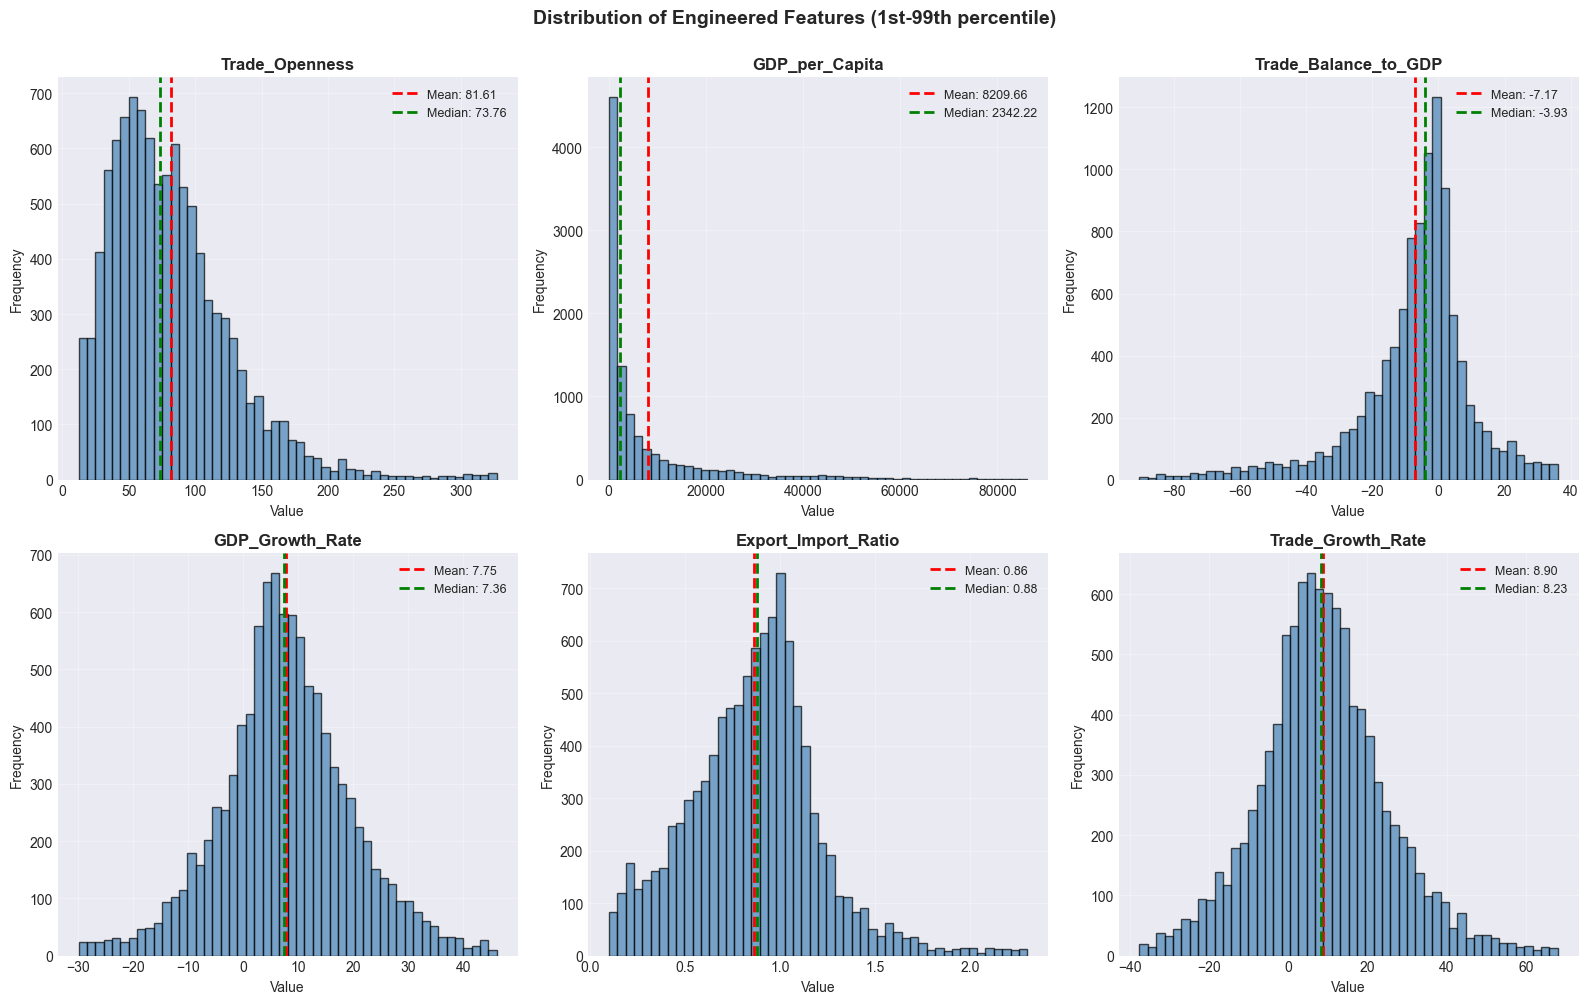

📊 Note: Distributions shown between 1st and 99th percentile for clarity


In [39]:
# FEATURE DISTRIBUTIONS

display(Markdown("### **New Feature Distributions:**"))

# Select key features to visualize
viz_features = [
    'Trade_Openness', 'GDP_per_Capita', 'Trade_Balance_to_GDP',
    'GDP_Growth_Rate', 'Export_Import_Ratio', 'Trade_Growth_Rate'
]

# Create distribution plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for idx, feature in enumerate(viz_features):
    ax = axes[idx]
    
    # Remove outliers for better visualization (keep between 1st and 99th percentile)
    # NOTE: As decided earlier, outliers are RETAINED in the dataset (they represent 
    # legitimate economic diversity - e.g., China/USA vs. small nations).
    # The 1-99th percentile filtering below is ONLY for visualization clarity to prevent 
    # extreme values from compressing the histogram scale. df_featured which is our 
    # original dataset remains unmodified.

    data = df_featured[feature].dropna()
    lower = data.quantile(0.01)
    upper = data.quantile(0.99)
    filtered_data = data[(data >= lower) & (data <= upper)]
    
    # Histogram with KDE
    ax.hist(filtered_data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax.axvline(filtered_data.mean(), color='red', linestyle='--', 
               linewidth=2, label=f'Mean: {filtered_data.mean():.2f}')
    ax.axvline(filtered_data.median(), color='green', linestyle='--', 
               linewidth=2, label=f'Median: {filtered_data.median():.2f}')
    
    ax.set_title(feature, fontsize=12, fontweight='bold')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Distribution of Engineered Features (1st-99th percentile)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("📊 Note: Distributions shown between 1st and 99th percentile for clarity")

### **Correlation: New Features vs GDP:**

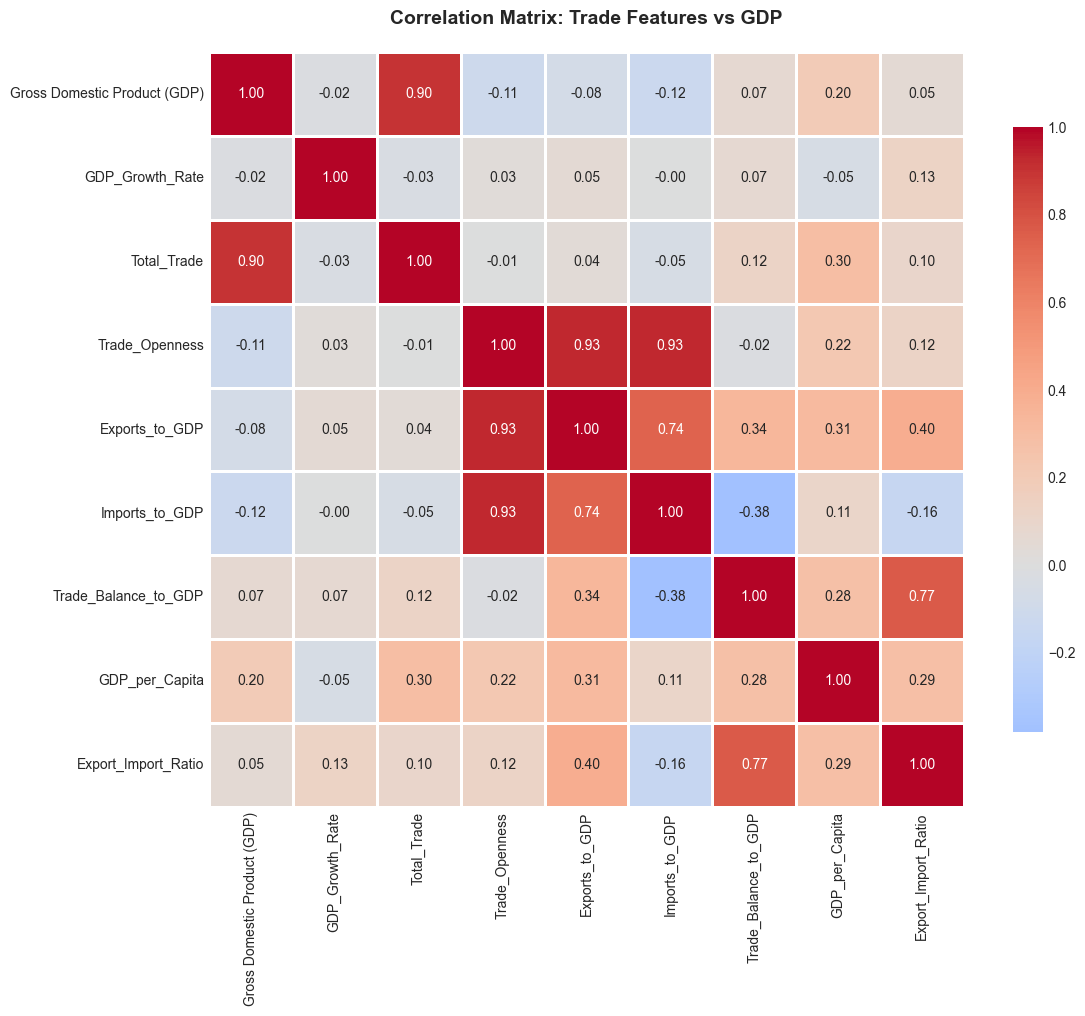


**Strongest Correlations with GDP:**

Total_Trade             0.90
GDP_per_Capita          0.20
Trade_Balance_to_GDP    0.07
Export_Import_Ratio     0.05
GDP_Growth_Rate        -0.02
Exports_to_GDP         -0.08
Trade_Openness         -0.11
Imports_to_GDP         -0.12
Name: Gross Domestic Product (GDP), dtype: float64


In [40]:
# ==============================================================================
# FEATURE CORRELATION ANALYSIS
# ==============================================================================

display(Markdown("### **Correlation: New Features vs GDP:**"))

# Select features for correlation analysis
correlation_features = [
    'Gross Domestic Product (GDP)',
    'GDP_Growth_Rate',
    'Total_Trade',
    'Trade_Openness',
    'Exports_to_GDP',
    'Imports_to_GDP',
    'Trade_Balance_to_GDP',
    'GDP_per_Capita',
    'Export_Import_Ratio'
]

# Calculate correlation matrix
corr_matrix = df_featured[correlation_features].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, 
            cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix: Trade Features vs GDP', 
             fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Display strongest correlations with GDP
display(Markdown("\n**Strongest Correlations with GDP:**"))
gdp_corr = corr_matrix['Gross Domestic Product (GDP)'].sort_values(ascending=False)
print(gdp_corr[1:])  # Exclude GDP vs GDP (1.0)


## Exploratory Data Analysis (EDA)

Now we explore the data to answer our central research question: **To what extent do international trade (imports and exports) correlate with economic growth?**

### **Analysis Structure:**

1. **Global Economic Landscape** - Understanding the overall distributions
2. **Temporal Evolution** - How trade and GDP evolved from 1970-2021
3. **Trade-GDP Relationships** - Direct correlation analysis
4. **Regional Patterns** - Geographic economic differences
5. **Country Comparisons** - Success stories vs struggling economies
6. **Trade Patterns** - Net exporters vs importers


### **Global Economic Landscape (1970-2021):**

🌍 Global Economic Statistics (1970-2021):
   Total Observations: 10,512
   Countries: 220
   Years Covered: 1970.0 - 2021.0
   Total Country-Year Combinations: 10512

📊 Aggregate Statistics:
   Cumulative GDP (all years): $1922.40 Trillion
   Cumulative Trade (all years): $973.69 Trillion
   Average Trade Openness: 84.3%
   Net Exporter observations: 3,450 (32.8%)
   Net Importer observations: 7,062 (67.2%)


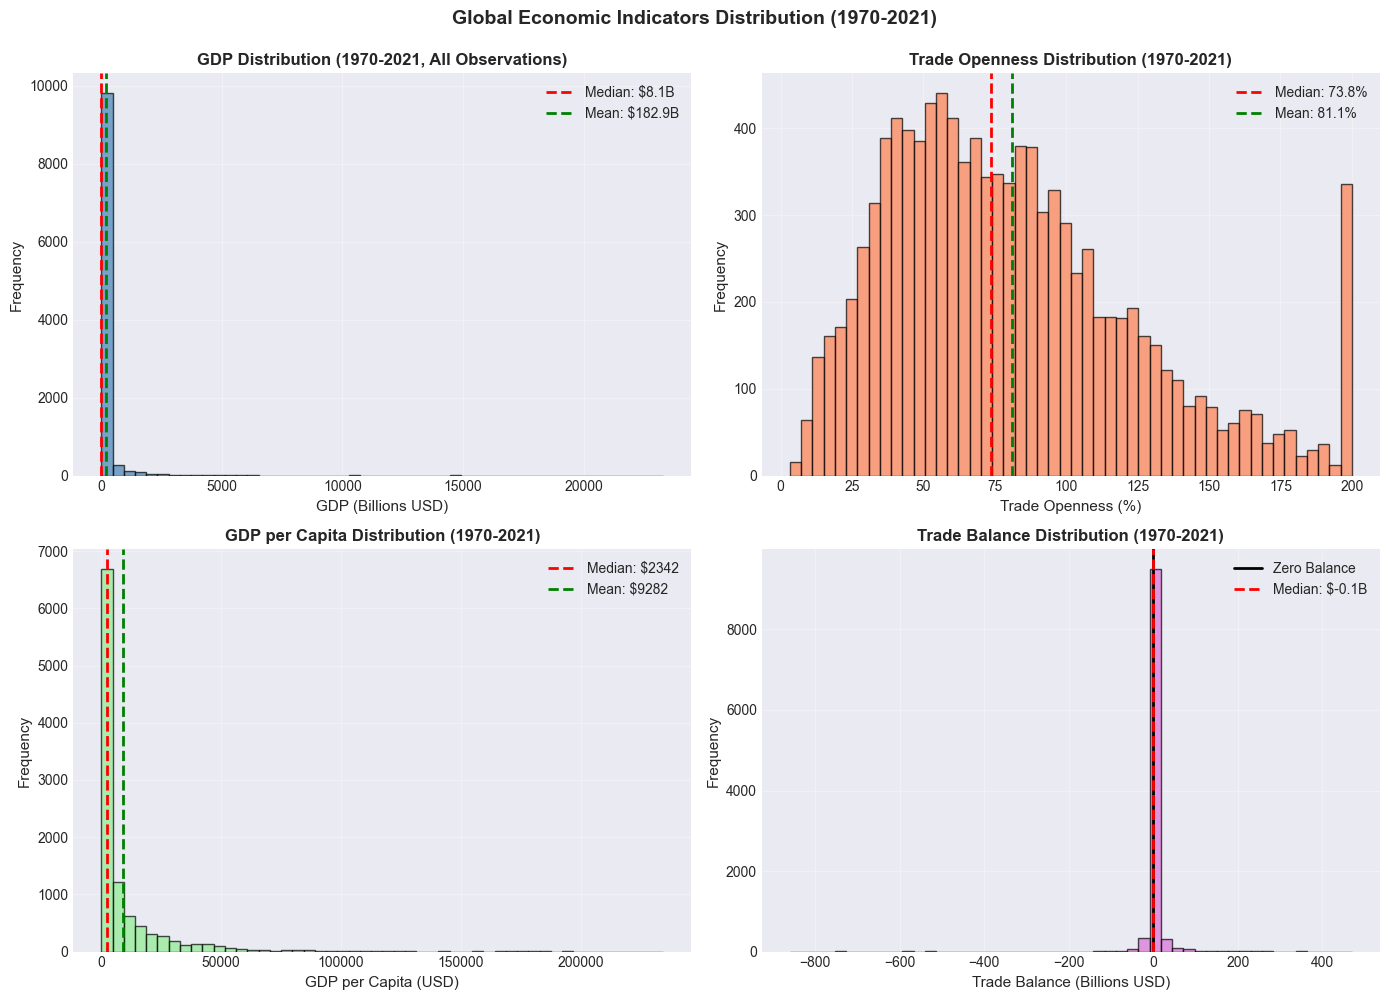


💡 DATA-DRIVEN INSIGHTS (1970-2021)

📊 GDP Distribution (All Years):
   • Total observations: 10,512
   • Skewness: 13.19
   • Kurtosis: 216.80
   • Mean GDP: $182.9B
   • Median GDP: $8.1B
   • Mean/Median ratio: 22.7x
   • Min GDP: $0.00B
   • Max GDP: $23300.00B

   Top 10 Countries by Total GDP (1970-2021):
      United States             $  484.71T total (52 years)
      Japan                     $  177.72T total (52 years)
      China                     $  175.39T total (52 years)
      Germany                   $  108.99T total (52 years)
      United Kingdom            $   78.78T total (52 years)
      France                    $   78.38T total (52 years)
      Italy                     $   62.42T total (52 years)
      Brazil                    $   43.94T total (52 years)
      Canada                    $   43.46T total (52 years)
      India                     $   43.24T total (52 years)


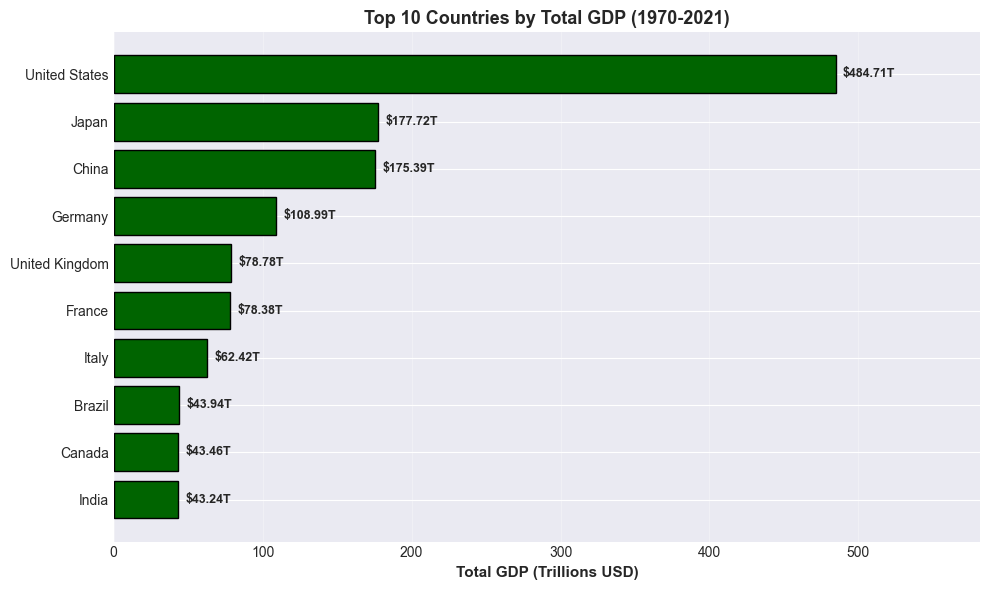


   Bottom 10 Countries by Total GDP (1970-2021):
      Tuvalu                    $    0.93B total (52 years)
      Montserrat                $    2.38B total (52 years)
      Nauru                     $    2.76B total (52 years)
      Kiribati                  $    4.58B total (52 years)
      Marshall Islands          $    5.50B total (52 years)
      Palau                     $    6.39B total (52 years)
      Cook Islands              $    6.99B total (52 years)
      Yemen Democratic (Former) $    7.15B total (21 years)
      Anguilla                  $    7.42B total (52 years)
      Sao Tome and Principe     $    7.83B total (52 years)


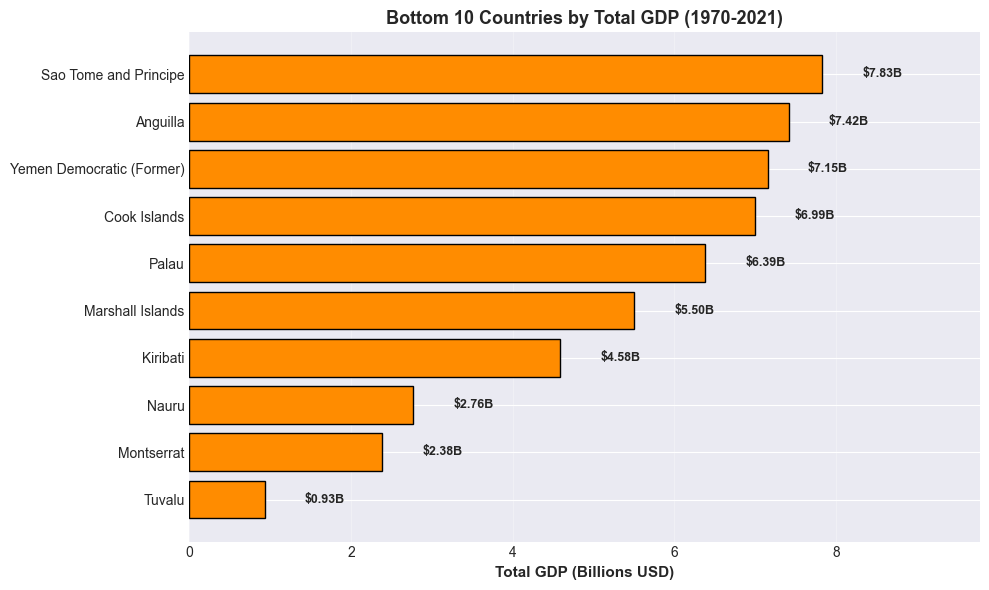


🌐 Trade Openness (All Years):
   • Mean: 84.3%
   • Median: 73.8%
   • Standard Deviation: 58.0%
   • Observations with 20-100% openness: 7,127 (67.8%)
   • Highly open (>100%): 2,972 observations (28.3%)
   • Low openness (<20%): 413 observations (3.9%)

💰 GDP per Capita (All Years):
   • Gini coefficient: 0.720 (0=perfect equality, 1=perfect inequality)
   • Mean: $9,282
   • Median: $2,342
   • Standard Deviation: $17,886
   • Min: $35
   • Max: $234,317
   • Range: $234,282

   Top 10 Countries by Total GDP per Capita (1970-2021):
      Monaco                    $   5,135,194
      Liechtenstein             $   4,405,941
      Luxembourg                $   2,889,331
      Bermuda                   $   2,843,198
      Cayman Islands            $   2,645,397
      Switzerland               $   2,342,502
      Norway                    $   2,237,924
      San Marino                $   1,936,805
      Qatar                     $   1,839,797
      Denmark                   $   1,725,71

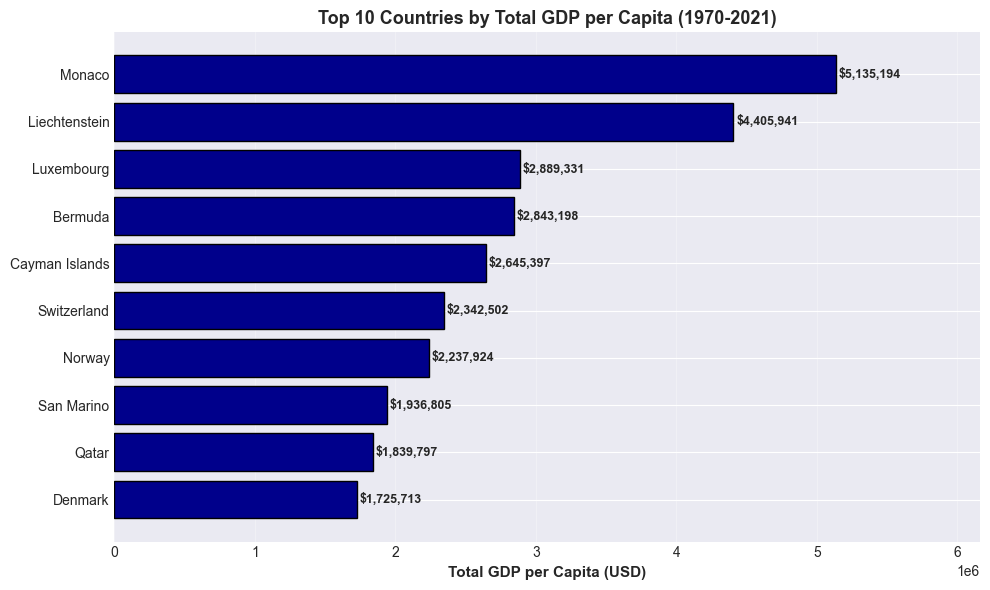


   Bottom 10 Countries by Total GDP per Capita (1970-2021):
      Yemen Democratic (Former) $       3,160
      Ethiopia (Former)         $       3,985
      Yemen Arab Republic (Former) $       4,293
      Burundi                   $       9,648
      Ethiopia                  $      10,683
      South Sudan               $      12,180
      Somalia                   $      12,726
      Eritrea                   $      13,580
      Afghanistan               $      16,199
      Malawi                    $      17,259


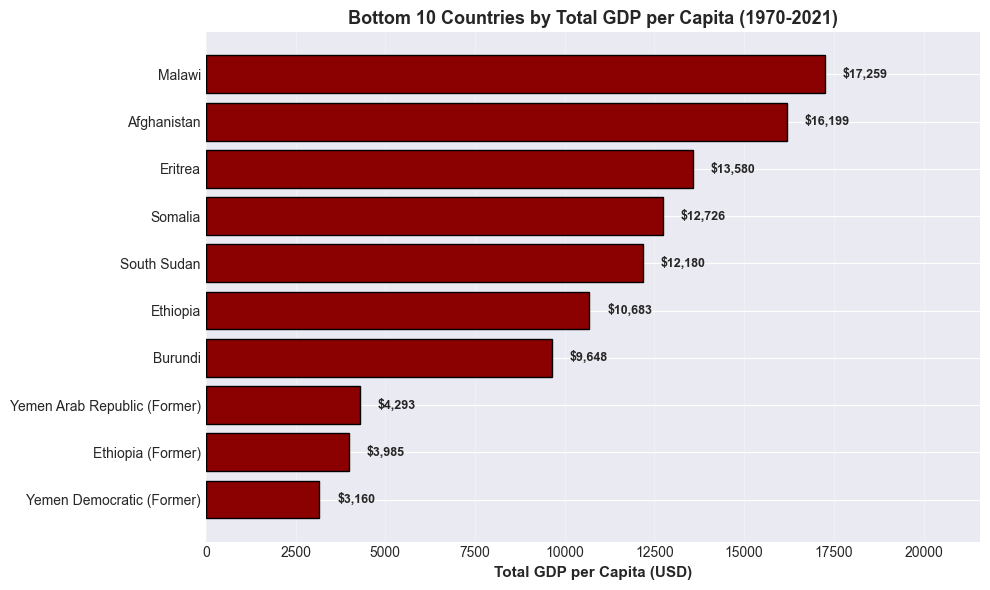


⚖️  Trade Balance (All Years):
   • Mean: $0.80B
   • Median: $-0.10B
   • Standard Deviation: $33.79B
   • Near-balanced observations (±$1B): 6,271 (59.7%)
   • Surplus observations (>$1B): 1,906 (18.1%)
   • Deficit observations (<-$1B): 2,335 (22.2%)



In [41]:
# ==============================================================================
# GLOBAL ECONOMIC OVERVIEW (1970-2021)
# ==============================================================================

display(Markdown("### **Global Economic Landscape (1970-2021):**"))

# Create a working copy for analysis to preserve df_featured in its original state
df_analysis = df_featured.copy()

# Key statistics across all years
print("🌍 Global Economic Statistics (1970-2021):")
print(f"   Total Observations: {len(df_analysis):,}")
print(f"   Countries: {df_analysis['Country'].nunique()}")
print(f"   Years Covered: {df_analysis['Year'].min()} - {df_analysis['Year'].max()}")
print(f"   Total Country-Year Combinations: {len(df_analysis)}")

# Calculate overall statistics
total_global_gdp = df_analysis['Gross Domestic Product (GDP)'].sum()
total_global_trade = df_analysis['Total_Trade'].sum()
avg_trade_openness = df_analysis['Trade_Openness'].mean()
total_net_exporters = df_analysis['Net_Exporter'].sum()
total_observations = len(df_analysis)

print(f"\n📊 Aggregate Statistics:")
print(f"   Cumulative GDP (all years): ${total_global_gdp / 1e12:.2f} Trillion")
print(f"   Cumulative Trade (all years): ${total_global_trade / 1e12:.2f} Trillion")
print(f"   Average Trade Openness: {avg_trade_openness:.1f}%")
print(f"   Net Exporter observations: {total_net_exporters:,} ({total_net_exporters/total_observations*100:.1f}%)")
print(f"   Net Importer observations: {total_observations - total_net_exporters:,} ({(total_observations - total_net_exporters)/total_observations*100:.1f}%)")

# Visualize distributions across ALL years
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GDP Distribution (all years)
ax = axes[0, 0]
gdp_data = df_analysis['Gross Domestic Product (GDP)'] / 1e9  # Convert to billions
ax.hist(gdp_data, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('GDP (Billions USD)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('GDP Distribution (1970-2021, All Observations)', fontsize=12, fontweight='bold')
ax.axvline(gdp_data.median(), color='red', linestyle='--', linewidth=2, 
           label=f'Median: ${gdp_data.median():.1f}B')
ax.axvline(gdp_data.mean(), color='green', linestyle='--', linewidth=2,
           label=f'Mean: ${gdp_data.mean():.1f}B')
ax.legend()
ax.grid(True, alpha=0.3)

# Trade Openness Distribution
ax = axes[0, 1]
trade_open = df_analysis['Trade_Openness'].clip(0, 200)  # Cap at 200% for visualization
ax.hist(trade_open, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax.set_xlabel('Trade Openness (%)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Trade Openness Distribution (1970-2021)', fontsize=12, fontweight='bold')
ax.axvline(trade_open.median(), color='red', linestyle='--', linewidth=2,
           label=f'Median: {trade_open.median():.1f}%')
ax.axvline(trade_open.mean(), color='green', linestyle='--', linewidth=2,
           label=f'Mean: {trade_open.mean():.1f}%')
ax.legend()
ax.grid(True, alpha=0.3)

# GDP per Capita Distribution
ax = axes[1, 0]
gdp_pc = df_analysis['GDP_per_Capita']
ax.hist(gdp_pc, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
ax.set_xlabel('GDP per Capita (USD)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('GDP per Capita Distribution (1970-2021)', fontsize=12, fontweight='bold')
ax.axvline(gdp_pc.median(), color='red', linestyle='--', linewidth=2,
           label=f'Median: ${gdp_pc.median():.0f}')
ax.axvline(gdp_pc.mean(), color='green', linestyle='--', linewidth=2,
           label=f'Mean: ${gdp_pc.mean():.0f}')
ax.legend()
ax.grid(True, alpha=0.3)

# Trade Balance Distribution
ax = axes[1, 1]
trade_bal = df_analysis['Trade_Balance'] / 1e9  # Convert to billions
ax.hist(trade_bal, bins=50, color='orchid', edgecolor='black', alpha=0.7)
ax.set_xlabel('Trade Balance (Billions USD)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Trade Balance Distribution (1970-2021)', fontsize=12, fontweight='bold')
ax.axvline(0, color='black', linestyle='-', linewidth=2, label='Zero Balance')
ax.axvline(trade_bal.median(), color='red', linestyle='--', linewidth=2,
           label=f'Median: ${trade_bal.median():.1f}B')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Global Economic Indicators Distribution (1970-2021)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# DATA-DRIVEN INSIGHTS (Calculated from actual data)
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("💡 DATA-DRIVEN INSIGHTS (1970-2021)")
print("="*70)

# 1. GDP Distribution Analysis
gdp_skewness = gdp_data.skew()
gdp_kurtosis = gdp_data.kurtosis()

print(f"\n📊 GDP Distribution (All Years):")
print(f"   • Total observations: {len(gdp_data):,}")
print(f"   • Skewness: {gdp_skewness:.2f}")
print(f"   • Kurtosis: {gdp_kurtosis:.2f}")
print(f"   • Mean GDP: ${gdp_data.mean():.1f}B")
print(f"   • Median GDP: ${gdp_data.median():.1f}B")
print(f"   • Mean/Median ratio: {gdp_data.mean()/gdp_data.median():.1f}x")
print(f"   • Min GDP: ${gdp_data.min():.2f}B")
print(f"   • Max GDP: ${gdp_data.max():.2f}B")

# Top 10 countries by total GDP across all years
print(f"\n   Top 10 Countries by Total GDP (1970-2021):")
top10_total_gdp = df_analysis.groupby('Country')['Gross Domestic Product (GDP)'].sum().nlargest(10)
for country, total_gdp in top10_total_gdp.items():
    pct_years = df_analysis[df_analysis['Country'] == country].shape[0]
    print(f"      {country:<25} ${total_gdp/1e12:>8.2f}T total ({pct_years} years)")


# Chart 1: Top 10 countries by Total GDP
plt.figure(figsize=(10, 6))
top10_sorted = top10_total_gdp.sort_values(ascending=True)
bars = plt.barh(top10_sorted.index, top10_sorted.values/1e12, color='darkgreen', edgecolor='black')
plt.xlabel('Total GDP (Trillions USD)', fontweight='bold', fontsize=11)
plt.title('Top 10 Countries by Total GDP (1970-2021)', fontweight='bold', fontsize=13)
plt.grid(axis='x', alpha=0.3)
# Extend x-axis to fit labels
max_val = top10_sorted.values.max()/1e12
plt.xlim(0, max_val * 1.2)
# Add value labels
for i, v in enumerate(top10_sorted.values/1e12):
    plt.text(v + 5, i, f'${v:.2f}T', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()


# Bottom 10 countries by total GDP
print(f"\n   Bottom 10 Countries by Total GDP (1970-2021):")
bottom10_total_gdp = df_analysis.groupby('Country')['Gross Domestic Product (GDP)'].sum().nsmallest(10)
for country, total_gdp in bottom10_total_gdp.items():
    pct_years = df_analysis[df_analysis['Country'] == country].shape[0]
    print(f"      {country:<25} ${total_gdp/1e9:>8.2f}B total ({pct_years} years)")


# Chart 2: Bottom 10 by Total GDP
plt.figure(figsize=(10, 6))
bottom10_sorted = bottom10_total_gdp.sort_values(ascending=True)
bars = plt.barh(bottom10_sorted.index, bottom10_sorted.values/1e9, color='darkorange', edgecolor='black')
plt.xlabel('Total GDP (Billions USD)', fontweight='bold', fontsize=11)
plt.title('Bottom 10 Countries by Total GDP (1970-2021)', fontweight='bold', fontsize=13)
plt.grid(axis='x', alpha=0.3)
# Extend x-axis to fit labels
max_val = bottom10_sorted.values.max()/1e9
plt.xlim(0, max_val * 1.25)
# Add value labels
for i, v in enumerate(bottom10_sorted.values/1e9):
    plt.text(v + 0.5, i, f'${v:.2f}B', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

# 2. Trade Openness Analysis
trade_open_full = df_analysis['Trade_Openness']
pct_20_100 = ((trade_open_full >= 20) & (trade_open_full <= 100)).sum() / len(trade_open_full) * 100

print(f"\n🌐 Trade Openness (All Years):")
print(f"   • Mean: {trade_open_full.mean():.1f}%")
print(f"   • Median: {trade_open_full.median():.1f}%")
print(f"   • Standard Deviation: {trade_open_full.std():.1f}%")
print(f"   • Observations with 20-100% openness: {((trade_open_full >= 20) & (trade_open_full <= 100)).sum():,} ({pct_20_100:.1f}%)")
print(f"   • Highly open (>100%): {(trade_open_full > 100).sum():,} observations ({(trade_open_full > 100).sum()/len(trade_open_full)*100:.1f}%)")
print(f"   • Low openness (<20%): {(trade_open_full < 20).sum():,} observations ({(trade_open_full < 20).sum()/len(trade_open_full)*100:.1f}%)")

# 3. GDP per Capita Inequality
gdp_pc_gini = ((gdp_pc.sort_values().reset_index(drop=True) * (2 * np.arange(1, len(gdp_pc) + 1) - len(gdp_pc) - 1)).sum()) / (len(gdp_pc) * gdp_pc.sum())

print(f"\n💰 GDP per Capita (All Years):")
print(f"   • Gini coefficient: {gdp_pc_gini:.3f} (0=perfect equality, 1=perfect inequality)")
print(f"   • Mean: ${gdp_pc.mean():,.0f}")
print(f"   • Median: ${gdp_pc.median():,.0f}")
print(f"   • Standard Deviation: ${gdp_pc.std():,.0f}")
print(f"   • Min: ${gdp_pc.min():,.0f}")
print(f"   • Max: ${gdp_pc.max():,.0f}")
print(f"   • Range: ${gdp_pc.max() - gdp_pc.min():,.0f}")

# Top 10 by total GDP per capita (sum across all years)
print(f"\n   Top 10 Countries by Total GDP per Capita (1970-2021):")
top10_total_gdppc = df_analysis.groupby('Country')['GDP_per_Capita'].sum().nlargest(10)
for country, total_gdppc in top10_total_gdppc.items():
    print(f"      {country:<25} ${total_gdppc:>12,.0f}")

# Chart 3: Top 10 by Total GDP per Capita
plt.figure(figsize=(10, 6))
top10_pc_sorted = top10_total_gdppc.sort_values(ascending=True)
bars = plt.barh(top10_pc_sorted.index, top10_pc_sorted.values, color='darkblue', edgecolor='black')
plt.xlabel('Total GDP per Capita (USD)', fontweight='bold', fontsize=11)
plt.title('Top 10 Countries by Total GDP per Capita (1970-2021)', fontweight='bold', fontsize=13)
plt.grid(axis='x', alpha=0.3)
# Extend x-axis to fit labels
max_val = top10_pc_sorted.values.max()
plt.xlim(0, max_val * 1.2)
# Add value labels
for i, v in enumerate(top10_pc_sorted.values):
    plt.text(v + 20000, i, f'${v:,.0f}', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

# Bottom 10 by total GDP per capita
print(f"\n   Bottom 10 Countries by Total GDP per Capita (1970-2021):")
bottom10_total_gdppc = df_analysis.groupby('Country')['GDP_per_Capita'].sum().nsmallest(10)
for country, total_gdppc in bottom10_total_gdppc.items():
    print(f"      {country:<25} ${total_gdppc:>12,.0f}")

# Chart 4: Bottom 10 by Total GDP per Capita
plt.figure(figsize=(10, 6))
bottom10_pc_sorted = bottom10_total_gdppc.sort_values(ascending=True)
bars = plt.barh(bottom10_pc_sorted.index, bottom10_pc_sorted.values, color='darkred', edgecolor='black')
plt.xlabel('Total GDP per Capita (USD)', fontweight='bold', fontsize=11)
plt.title('Bottom 10 Countries by Total GDP per Capita (1970-2021)', fontweight='bold', fontsize=13)
plt.grid(axis='x', alpha=0.3)
# Extend x-axis to fit labels
max_val = bottom10_pc_sorted.values.max()
plt.xlim(0, max_val * 1.25)
# Add value labels
for i, v in enumerate(bottom10_pc_sorted.values):
    plt.text(v + 500, i, f'${v:,.0f}', va='center', fontweight='bold', fontsize=9)
plt.tight_layout()
plt.show()

# 4. Trade Balance Analysis
trade_bal_full = df_analysis['Trade_Balance']
balanced_observations = ((trade_bal_full >= -1e9) & (trade_bal_full <= 1e9)).sum()

print(f"\n⚖️  Trade Balance (All Years):")
print(f"   • Mean: ${trade_bal_full.mean() / 1e9:.2f}B")
print(f"   • Median: ${trade_bal_full.median() / 1e9:.2f}B")
print(f"   • Standard Deviation: ${trade_bal_full.std() / 1e9:.2f}B")
print(f"   • Near-balanced observations (±$1B): {balanced_observations:,} ({balanced_observations/len(trade_bal_full)*100:.1f}%)")
print(f"   • Surplus observations (>$1B): {(trade_bal_full > 1e9).sum():,} ({(trade_bal_full > 1e9).sum()/len(trade_bal_full)*100:.1f}%)")
print(f"   • Deficit observations (<-$1B): {(trade_bal_full < -1e9).sum():,} ({(trade_bal_full < -1e9).sum()/len(trade_bal_full)*100:.1f}%)")

print("\n" + "="*70)

### Temporal Evolution (1970-2021):

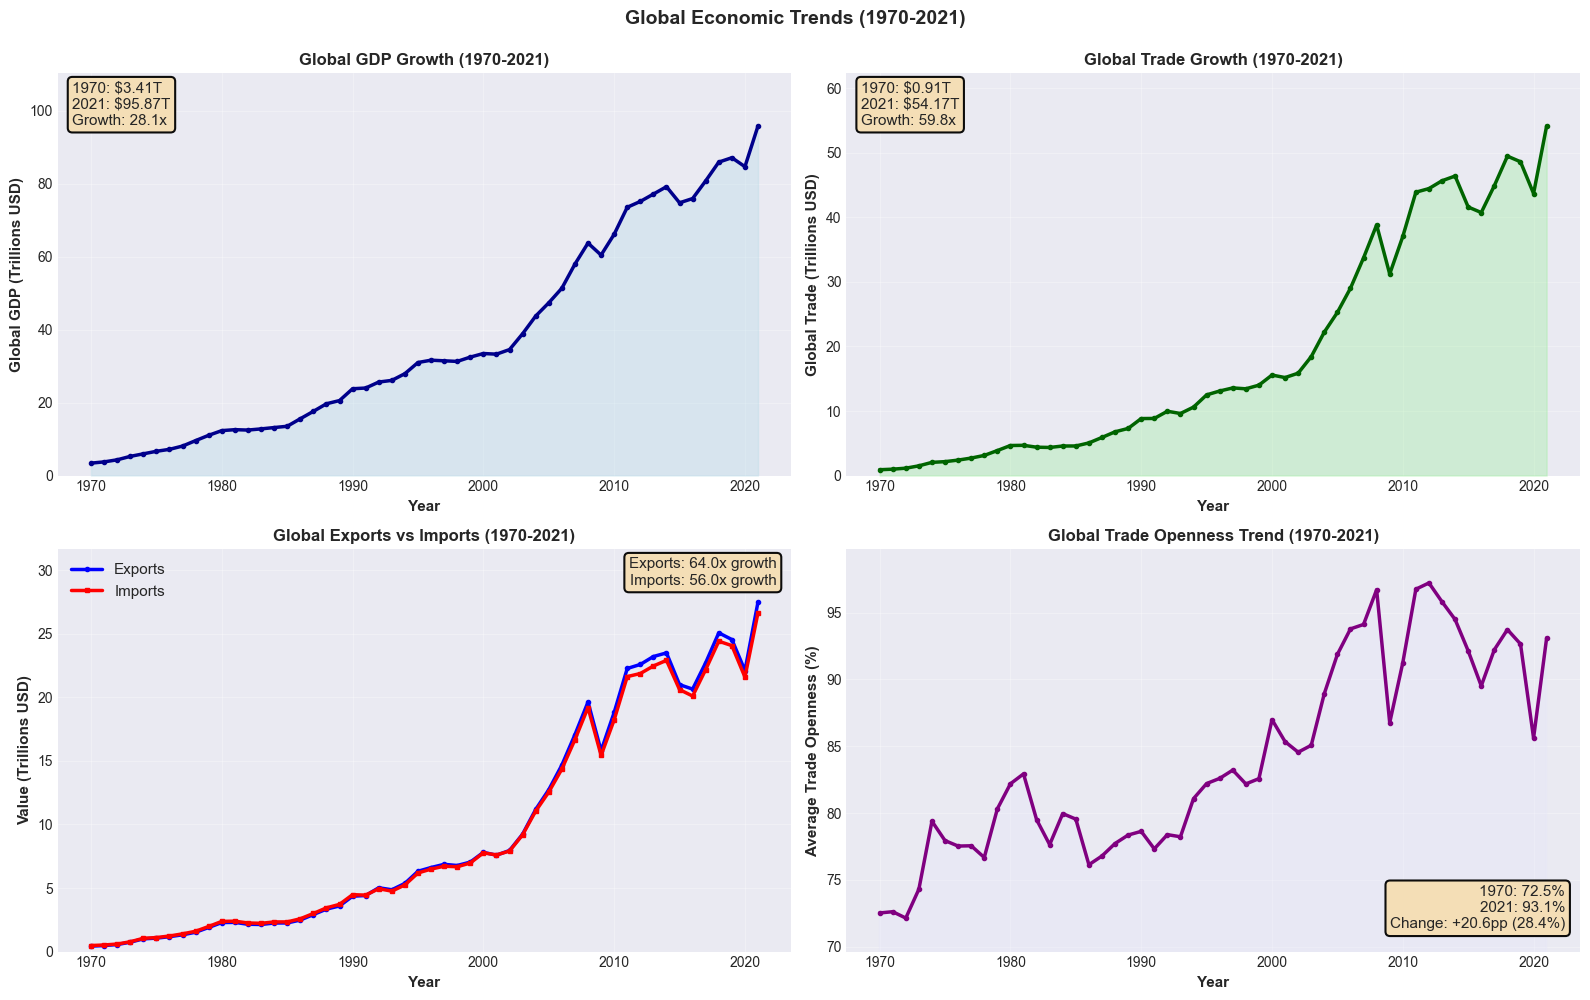


📊 DATA-DRIVEN TEMPORAL INSIGHTS (1970-2021)

💰 Global GDP:
   • 1970: $3.41 Trillion
   • 2021: $95.87 Trillion
   • Absolute growth: $92.46 Trillion
   • Growth multiplier: 28.10x
   • Percentage increase: 2710.3%

🌐 Global Trade:
   • 1970: $0.91 Trillion
   • 2021: $54.17 Trillion
   • Absolute growth: $53.26 Trillion
   • Growth multiplier: 59.78x
   • Percentage increase: 5878.4%

📦 Exports vs Imports:
   • Exports 1970: $0.43T → 2021: $27.50T (Growth: 63.96x)
   • Imports 1970: $0.48T → 2021: $26.66T (Growth: 56.01x)
   • Export/Import growth difference: 7.95x

🔓 Trade Openness:
   • 1970: 72.54%
   • 2021: 93.10%
   • Absolute change: +20.57 percentage points
   • Relative increase: 28.4%

📊 Comparative Growth (GDP vs Trade):
   • GDP growth: 28.10x
   • Trade growth: 59.78x
   • Trade grew 31.68x more than GDP
   • Trade/GDP growth ratio: 2.13

👥 Global Population (Context):
   • 1970: 3.68 Billion
   • 2021: 7.88 Billion
   • Growth: 2.14x

💵 Per Capita Metrics:
   • GDP per 

In [42]:
# ==============================================================================
# TEMPORAL EVOLUTION (1970-2021)
# ==============================================================================

display(Markdown("### Temporal Evolution (1970-2021):"))

# Aggregate global trends by year
yearly_trends = df_featured.groupby('Year').agg({
    'Gross Domestic Product (GDP)': 'sum',
    'Total_Trade': 'sum',
    'Exports of goods and services': 'sum',
    'Imports of goods and services': 'sum',
    'Population': 'sum',
    'Trade_Openness': 'mean'
}).reset_index()

# Convert to trillions for readability
yearly_trends['GDP_Trillions'] = yearly_trends['Gross Domestic Product (GDP)'] / 1e12
yearly_trends['Trade_Trillions'] = yearly_trends['Total_Trade'] / 1e12
yearly_trends['Exports_Trillions'] = yearly_trends['Exports of goods and services'] / 1e12
yearly_trends['Imports_Trillions'] = yearly_trends['Imports of goods and services'] / 1e12

# Create multi-panel time series
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# GDP Over Time
ax = axes[0, 0]
ax.plot(yearly_trends['Year'], yearly_trends['GDP_Trillions'], 
        linewidth=2.5, color='darkblue', marker='o', markersize=3)
ax.fill_between(yearly_trends['Year'], yearly_trends['GDP_Trillions'], 
                alpha=0.3, color='lightblue')
ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Global GDP (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_title('Global GDP Growth (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Calculate GDP growth
gdp_growth_multiplier = yearly_trends['GDP_Trillions'].iloc[-1] / yearly_trends['GDP_Trillions'].iloc[0]
gdp_start = yearly_trends['GDP_Trillions'].iloc[0]
gdp_end = yearly_trends['GDP_Trillions'].iloc[-1]

# Extend y-axis and reposition box with larger font
max_gdp = yearly_trends['GDP_Trillions'].max()
ax.set_ylim(0, max_gdp * 1.15)  # Add 15% space at top for legend

ax.text(0.02, 0.98, f"1970: ${gdp_start:.2f}T\n2021: ${gdp_end:.2f}T\nGrowth: {gdp_growth_multiplier:.1f}x",
        transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.95, edgecolor='black', linewidth=1.5))

# Total Trade Over Time
ax = axes[0, 1]
ax.plot(yearly_trends['Year'], yearly_trends['Trade_Trillions'], 
        linewidth=2.5, color='darkgreen', marker='o', markersize=3)
ax.fill_between(yearly_trends['Year'], yearly_trends['Trade_Trillions'], 
                alpha=0.3, color='lightgreen')
ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Global Trade (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_title('Global Trade Growth (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Calculate trade growth
trade_growth_multiplier = yearly_trends['Trade_Trillions'].iloc[-1] / yearly_trends['Trade_Trillions'].iloc[0]
trade_start = yearly_trends['Trade_Trillions'].iloc[0]
trade_end = yearly_trends['Trade_Trillions'].iloc[-1]

# Extend y-axis and reposition box with larger font 
max_trade = yearly_trends['Trade_Trillions'].max()
ax.set_ylim(0, max_trade * 1.15)  # Add 15% space at top for legend

ax.text(0.02, 0.98, f"1970: ${trade_start:.2f}T\n2021: ${trade_end:.2f}T\nGrowth: {trade_growth_multiplier:.1f}x",
        transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.95, edgecolor='black', linewidth=1.5))

# Exports vs Imports
ax = axes[1, 0]
ax.plot(yearly_trends['Year'], yearly_trends['Exports_Trillions'], 
        linewidth=2.5, color='blue', marker='o', markersize=3, label='Exports')
ax.plot(yearly_trends['Year'], yearly_trends['Imports_Trillions'], 
        linewidth=2.5, color='red', marker='s', markersize=3, label='Imports')
ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Value (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_title('Global Exports vs Imports (1970-2021)', fontsize=12, fontweight='bold')
ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.3)

# Calculate export and import growth
export_growth = yearly_trends['Exports_Trillions'].iloc[-1] / yearly_trends['Exports_Trillions'].iloc[0]
import_growth = yearly_trends['Imports_Trillions'].iloc[-1] / yearly_trends['Imports_Trillions'].iloc[0]

# Extend y-axis and reposition box with larger font
max_value = max(yearly_trends['Exports_Trillions'].max(), yearly_trends['Imports_Trillions'].max())
ax.set_ylim(0, max_value * 1.15)  # Add 15% space at top for legend

ax.text(0.98, 0.98, f"Exports: {export_growth:.1f}x growth\nImports: {import_growth:.1f}x growth",
        transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.95, edgecolor='black', linewidth=1.5))

# Trade Openness Over Time
ax = axes[1, 1]
ax.plot(yearly_trends['Year'], yearly_trends['Trade_Openness'], 
        linewidth=2.5, color='purple', marker='o', markersize=3)
ax.fill_between(yearly_trends['Year'], yearly_trends['Trade_Openness'], 
                alpha=0.3, color='lavender')
ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Global Trade Openness Trend (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

# Calculate trade openness change
openness_start = yearly_trends['Trade_Openness'].iloc[0]
openness_end = yearly_trends['Trade_Openness'].iloc[-1]
openness_change = openness_end - openness_start
openness_pct_change = (openness_change / openness_start) * 100

# Adjust y-axis to create space and reposition box with larger font
min_openness = yearly_trends['Trade_Openness'].min()
max_openness = yearly_trends['Trade_Openness'].max()
y_range = max_openness - min_openness
ax.set_ylim(min_openness - y_range * 0.1, max_openness + y_range * 0.1)  # Add 10% padding

ax.text(0.98, 0.05, f"1970: {openness_start:.1f}%\n2021: {openness_end:.1f}%\nChange: +{openness_change:.1f}pp ({openness_pct_change:.1f}%)",
        transform=ax.transAxes, fontsize=11, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.95, edgecolor='black', linewidth=1.5))

plt.suptitle('Global Economic Trends (1970-2021)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# DATA-DRIVEN INSIGHTS (Calculated from data - NO ASSUMPTIONS)
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("📊 DATA-DRIVEN TEMPORAL INSIGHTS (1970-2021)")
print("="*70)


# GDP Analysis
print(f"\n💰 Global GDP:")
print(f"   • 1970: ${gdp_start:.2f} Trillion")
print(f"   • 2021: ${gdp_end:.2f} Trillion")
print(f"   • Absolute growth: ${gdp_end - gdp_start:.2f} Trillion")
print(f"   • Growth multiplier: {gdp_growth_multiplier:.2f}x")
print(f"   • Percentage increase: {((gdp_end/gdp_start - 1) * 100):.1f}%")

# Trade Analysis
print(f"\n🌐 Global Trade:")
print(f"   • 1970: ${trade_start:.2f} Trillion")
print(f"   • 2021: ${trade_end:.2f} Trillion")
print(f"   • Absolute growth: ${trade_end - trade_start:.2f} Trillion")
print(f"   • Growth multiplier: {trade_growth_multiplier:.2f}x")
print(f"   • Percentage increase: {((trade_end/trade_start - 1) * 100):.1f}%")

# Export vs Import Analysis
exports_start = yearly_trends['Exports_Trillions'].iloc[0]
exports_end = yearly_trends['Exports_Trillions'].iloc[-1]
imports_start = yearly_trends['Imports_Trillions'].iloc[0]
imports_end = yearly_trends['Imports_Trillions'].iloc[-1]

print(f"\n📦 Exports vs Imports:")
print(f"   • Exports 1970: ${exports_start:.2f}T → 2021: ${exports_end:.2f}T (Growth: {export_growth:.2f}x)")
print(f"   • Imports 1970: ${imports_start:.2f}T → 2021: ${imports_end:.2f}T (Growth: {import_growth:.2f}x)")
print(f"   • Export/Import growth difference: {abs(export_growth - import_growth):.2f}x")

# Trade Openness Analysis
print(f"\n🔓 Trade Openness:")
print(f"   • 1970: {openness_start:.2f}%")
print(f"   • 2021: {openness_end:.2f}%")
print(f"   • Absolute change: +{openness_change:.2f} percentage points")
print(f"   • Relative increase: {openness_pct_change:.1f}%")

# Comparative Growth Analysis (GDP vs Trade)
print(f"\n📊 Comparative Growth (GDP vs Trade):")
print(f"   • GDP growth: {gdp_growth_multiplier:.2f}x")
print(f"   • Trade growth: {trade_growth_multiplier:.2f}x")
if trade_growth_multiplier > gdp_growth_multiplier:
    diff = trade_growth_multiplier - gdp_growth_multiplier
    print(f"   • Trade grew {diff:.2f}x more than GDP")
    print(f"   • Trade/GDP growth ratio: {trade_growth_multiplier/gdp_growth_multiplier:.2f}")
elif gdp_growth_multiplier > trade_growth_multiplier:
    diff = gdp_growth_multiplier - trade_growth_multiplier
    print(f"   • GDP grew {diff:.2f}x more than Trade")
    print(f"   • GDP/Trade growth ratio: {gdp_growth_multiplier/trade_growth_multiplier:.2f}")
else:
    print(f"   • GDP and Trade grew at the same rate")

# Population Growth (for context)
pop_start = yearly_trends['Population'].iloc[0]
pop_end = yearly_trends['Population'].iloc[-1]
pop_growth = pop_end / pop_start

print(f"\n👥 Global Population (Context):")
print(f"   • 1970: {pop_start/1e9:.2f} Billion")
print(f"   • 2021: {pop_end/1e9:.2f} Billion")
print(f"   • Growth: {pop_growth:.2f}x")

# Per Capita Calculations
gdp_per_capita_start = (yearly_trends['Gross Domestic Product (GDP)'].iloc[0] / yearly_trends['Population'].iloc[0])
gdp_per_capita_end = (yearly_trends['Gross Domestic Product (GDP)'].iloc[-1] / yearly_trends['Population'].iloc[-1])
gdp_pc_growth = gdp_per_capita_end / gdp_per_capita_start

trade_per_capita_start = (yearly_trends['Total_Trade'].iloc[0] / yearly_trends['Population'].iloc[0])
trade_per_capita_end = (yearly_trends['Total_Trade'].iloc[-1] / yearly_trends['Population'].iloc[-1])
trade_pc_growth = trade_per_capita_end / trade_per_capita_start

print(f"\n💵 Per Capita Metrics:")
print(f"   • GDP per capita 1970: ${gdp_per_capita_start:,.0f} → 2021: ${gdp_per_capita_end:,.0f}")
print(f"   • GDP per capita growth: {gdp_pc_growth:.2f}x")
print(f"   • Trade per capita 1970: ${trade_per_capita_start:,.0f} → 2021: ${trade_per_capita_end:,.0f}")
print(f"   • Trade per capita growth: {trade_pc_growth:.2f}x")

print("\n" + "="*70)

### Trade-GDP Relationship (Core Analysis):

🔍 Correlation Matrix with GDP:
Gross Domestic Product (GDP)     1.00
Imports of goods and services    0.92
Total_Trade                      0.90
Exports of goods and services    0.87
GDP_per_Capita                   0.20
Trade_Openness                  -0.11
Name: Gross Domestic Product (GDP), dtype: float64


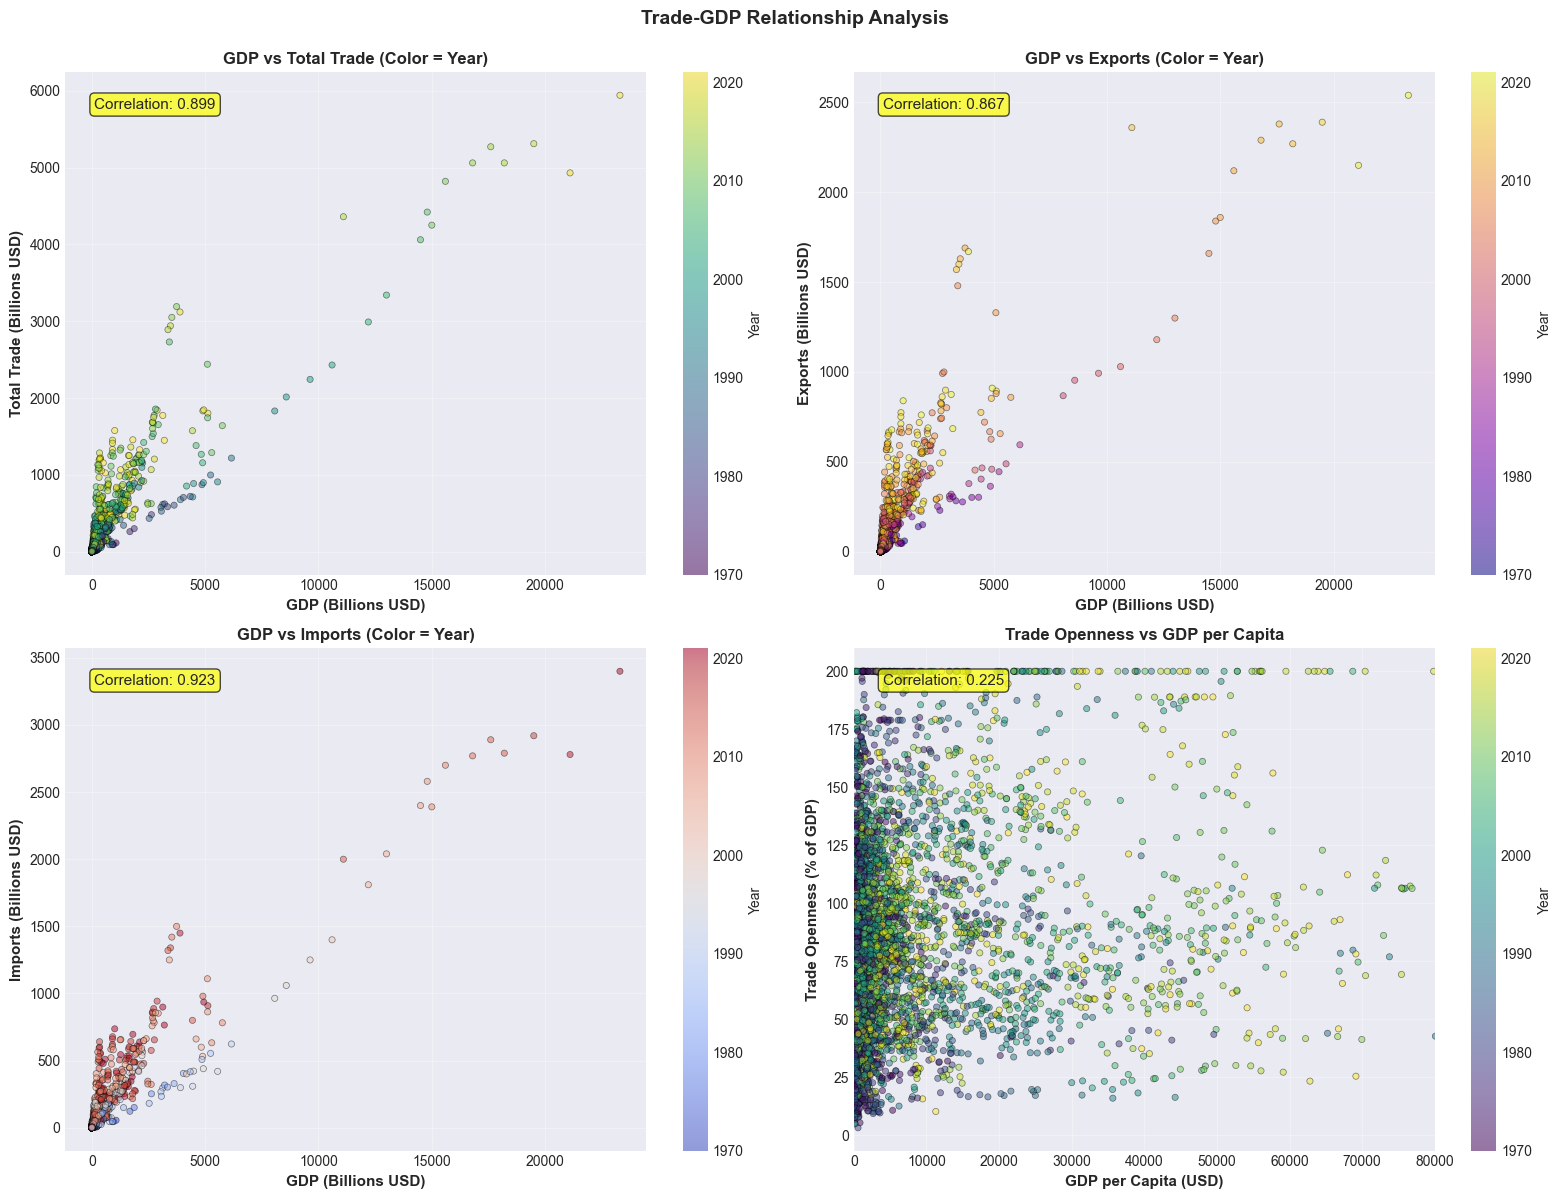


📊 DATA-DRIVEN CORRELATION INSIGHTS

🔗 Correlation Coefficients with GDP:
   • GDP vs Total Trade: 0.8994
   • GDP vs Exports: 0.8668
   • GDP vs Imports: 0.9231
   • GDP per Capita vs Trade Openness: 0.2247

📈 Comparative Correlation Strength:
   • Imports correlate 0.0563 points more strongly with GDP than Exports

⏳ Temporal Correlation Change (GDP vs Total Trade):
   • 1970s correlation: 0.8758
   • 2010s correlation: 0.9089
   • Change: +0.0330
   • Correlation increased by 3.77%

📊 Trade Openness Variability:
   • Mean: 84.29%
   • Standard Deviation: 58.00
   • Coefficient of Variation: 68.81%
   • Range: 3.27% to 593.69%
   • Total Range Span: 590.42 percentage points

📐 Variance Explained (R²):
   • Total Trade explains 80.88% of GDP variance
   • Exports explain 75.13% of GDP variance
   • Imports explain 85.21% of GDP variance

📅 Correlation Evolution by Decade (GDP vs Total Trade):
   • 1970s: 0.8758
   • 1980s: 0.9020
   • 1990s: 0.9066
   • 2000s: 0.8935
   • 2010s: 0.908

In [43]:
# ==============================================================================
# TRADE-GDP CORRELATION ANALYSIS
# ==============================================================================

display(Markdown("### Trade-GDP Relationship (Core Analysis):"))

# Calculate correlations
correlations = df_featured[['Gross Domestic Product (GDP)', 'Total_Trade', 
                             'Exports of goods and services', 'Imports of goods and services',
                             'Trade_Openness', 'GDP_per_Capita']].corr()

print("🔍 Correlation Matrix with GDP:")
print(correlations['Gross Domestic Product (GDP)'].sort_values(ascending=False))

# Create comprehensive scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# GDP vs Total Trade
ax = axes[0, 0]
sample_data = df_featured.sample(n=min(5000, len(df_featured)), random_state=42)
scatter = ax.scatter(sample_data['Gross Domestic Product (GDP)'] / 1e9,
                    sample_data['Total_Trade'] / 1e9,
                    c=sample_data['Year'], cmap='viridis', 
                    alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
ax.set_xlabel('GDP (Billions USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('Total Trade (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('GDP vs Total Trade (Color = Year)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Year')
ax.grid(True, alpha=0.3)

# Add correlation
corr_gdp_trade = df_featured['Gross Domestic Product (GDP)'].corr(df_featured['Total_Trade'])
ax.text(0.05, 0.95, f'Correlation: {corr_gdp_trade:.3f}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# GDP vs Exports
ax = axes[0, 1]
scatter = ax.scatter(sample_data['Gross Domestic Product (GDP)'] / 1e9,
                    sample_data['Exports of goods and services'] / 1e9,
                    c=sample_data['Year'], cmap='plasma', 
                    alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
ax.set_xlabel('GDP (Billions USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('Exports (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('GDP vs Exports (Color = Year)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Year')
ax.grid(True, alpha=0.3)

corr_gdp_exports = df_featured['Gross Domestic Product (GDP)'].corr(df_featured['Exports of goods and services'])
ax.text(0.05, 0.95, f'Correlation: {corr_gdp_exports:.3f}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# GDP vs Imports
ax = axes[1, 0]
scatter = ax.scatter(sample_data['Gross Domestic Product (GDP)'] / 1e9,
                    sample_data['Imports of goods and services'] / 1e9,
                    c=sample_data['Year'], cmap='coolwarm', 
                    alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
ax.set_xlabel('GDP (Billions USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('Imports (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('GDP vs Imports (Color = Year)', fontsize=12, fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Year')
ax.grid(True, alpha=0.3)

corr_gdp_imports = df_featured['Gross Domestic Product (GDP)'].corr(df_featured['Imports of goods and services'])
ax.text(0.05, 0.95, f'Correlation: {corr_gdp_imports:.3f}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Trade Openness vs GDP per Capita
ax = axes[1, 1]
trade_open_clip = sample_data['Trade_Openness'].clip(0, 200)
scatter = ax.scatter(sample_data['GDP_per_Capita'],
                    trade_open_clip,
                    c=sample_data['Year'], cmap='viridis', 
                    alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
ax.set_xlabel('GDP per Capita (USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('Trade Openness (% of GDP)', fontsize=11, fontweight='bold')
ax.set_title('Trade Openness vs GDP per Capita', fontsize=12, fontweight='bold')
ax.set_xlim(0, 80000)  # Limit for better visualization
plt.colorbar(scatter, ax=ax, label='Year')
ax.grid(True, alpha=0.3)

corr_gdppc_openness = df_featured['GDP_per_Capita'].corr(df_featured['Trade_Openness'])
ax.text(0.05, 0.95, f'Correlation: {corr_gdppc_openness:.3f}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.suptitle('Trade-GDP Relationship Analysis', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# DATA-DRIVEN CORRELATION INSIGHTS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("📊 DATA-DRIVEN CORRELATION INSIGHTS")
print("="*70)

# 1. Overall Correlations
print(f"\n🔗 Correlation Coefficients with GDP:")
print(f"   • GDP vs Total Trade: {corr_gdp_trade:.4f}")
print(f"   • GDP vs Exports: {corr_gdp_exports:.4f}")
print(f"   • GDP vs Imports: {corr_gdp_imports:.4f}")
print(f"   • GDP per Capita vs Trade Openness: {corr_gdppc_openness:.4f}")

# 2. Comparative Analysis
print(f"\n📈 Comparative Correlation Strength:")
if corr_gdp_exports > corr_gdp_imports:
    diff = corr_gdp_exports - corr_gdp_imports
    print(f"   • Exports correlate {diff:.4f} points more strongly with GDP than Imports")
elif corr_gdp_imports > corr_gdp_exports:
    diff = corr_gdp_imports - corr_gdp_exports
    print(f"   • Imports correlate {diff:.4f} points more strongly with GDP than Exports")
else:
    print(f"   • Exports and Imports have equal correlation with GDP")

# 3. Temporal Correlation Changes (1970s vs 2010s)
df_1970s = df_featured[df_featured['Year'].between(1970, 1979)]
df_2010s = df_featured[df_featured['Year'].between(2010, 2021)]

corr_1970s_trade = df_1970s['Gross Domestic Product (GDP)'].corr(df_1970s['Total_Trade'])
corr_2010s_trade = df_2010s['Gross Domestic Product (GDP)'].corr(df_2010s['Total_Trade'])

print(f"\n⏳ Temporal Correlation Change (GDP vs Total Trade):")
print(f"   • 1970s correlation: {corr_1970s_trade:.4f}")
print(f"   • 2010s correlation: {corr_2010s_trade:.4f}")
print(f"   • Change: {corr_2010s_trade - corr_1970s_trade:+.4f}")
if corr_2010s_trade > corr_1970s_trade:
    print(f"   • Correlation increased by {((corr_2010s_trade/corr_1970s_trade - 1) * 100):.2f}%")
elif corr_1970s_trade > corr_2010s_trade:
    print(f"   • Correlation decreased by {((1 - corr_2010s_trade/corr_1970s_trade) * 100):.2f}%")
else:
    print(f"   • Correlation remained constant")

# 4. Trade Openness Variability
trade_openness_std = df_featured['Trade_Openness'].std()
trade_openness_cv = (trade_openness_std / df_featured['Trade_Openness'].mean()) * 100
trade_openness_range = df_featured['Trade_Openness'].max() - df_featured['Trade_Openness'].min()

print(f"\n📊 Trade Openness Variability:")
print(f"   • Mean: {df_featured['Trade_Openness'].mean():.2f}%")
print(f"   • Standard Deviation: {trade_openness_std:.2f}")
print(f"   • Coefficient of Variation: {trade_openness_cv:.2f}%")
print(f"   • Range: {df_featured['Trade_Openness'].min():.2f}% to {df_featured['Trade_Openness'].max():.2f}%")
print(f"   • Total Range Span: {trade_openness_range:.2f} percentage points")

# 5. R-squared values (variance explained)
r2_gdp_trade = corr_gdp_trade ** 2
r2_gdp_exports = corr_gdp_exports ** 2
r2_gdp_imports = corr_gdp_imports ** 2

print(f"\n📐 Variance Explained (R²):")
print(f"   • Total Trade explains {r2_gdp_trade*100:.2f}% of GDP variance")
print(f"   • Exports explain {r2_gdp_exports*100:.2f}% of GDP variance")
print(f"   • Imports explain {r2_gdp_imports*100:.2f}% of GDP variance")

# 6. Correlation by decade
decades = [(1970, 1979, '1970s'), (1980, 1989, '1980s'), (1990, 1999, '1990s'), 
           (2000, 2009, '2000s'), (2010, 2021, '2010s')]

print(f"\n📅 Correlation Evolution by Decade (GDP vs Total Trade):")
decade_corrs = []
for start, end, label in decades:
    decade_data = df_featured[df_featured['Year'].between(start, end)]
    if len(decade_data) > 0:
        corr = decade_data['Gross Domestic Product (GDP)'].corr(decade_data['Total_Trade'])
        decade_corrs.append(corr)
        print(f"   • {label}: {corr:.4f}")

# Calculate trend
if len(decade_corrs) > 1:
    corr_trend = decade_corrs[-1] - decade_corrs[0]
    print(f"\n   Overall trend: {corr_trend:+.4f} from 1970s to 2010s")

# 7. Correlation significance
from scipy import stats

# Calculate p-values
gdp_values = df_featured['Gross Domestic Product (GDP)'].dropna()
trade_values = df_featured['Total_Trade'].dropna()

# Align the indices
common_idx = gdp_values.index.intersection(trade_values.index)
gdp_aligned = gdp_values.loc[common_idx]
trade_aligned = trade_values.loc[common_idx]

pearson_r, p_value = stats.pearsonr(gdp_aligned, trade_aligned)

print(f"\n🔬 Statistical Significance:")
print(f"   • Pearson correlation coefficient: {pearson_r:.4f}")
print(f"   • P-value: {p_value:.2e}")
if p_value < 0.001:
    print(f"   • Significance level: p < 0.001 (highly significant)")
elif p_value < 0.01:
    print(f"   • Significance level: p < 0.01 (very significant)")
elif p_value < 0.05:
    print(f"   • Significance level: p < 0.05 (significant)")
else:
    print(f"   • Not statistically significant at p < 0.05 level")

print("\n" + "="*70)

# Understanding the Trade-GDP Relationship Analysis

## Overview
This analysis examines how closely international trade (imports, exports) is related to a country's economic output (GDP). The correlation coefficients range from -1 to +1, where:
- **+1** = Perfect positive relationship (as one increases, the other increases)
- **0** = No relationship
- **-1** = Perfect negative relationship (as one increases, the other decreases)
- Values above **0.7** are considered strong correlations

---

## 1. Correlation Matrix with GDP

```
Gross Domestic Product (GDP)     1.00  ← GDP correlates perfectly with itself
Imports of goods and services    0.92  ← Very strong positive relationship
Total_Trade                      0.90  ← Very strong positive relationship
Exports of goods and services    0.87  ← Very strong positive relationship
GDP_per_Capita                   0.20  ← Weak positive relationship
Trade_Openness                  -0.11  ← Very weak negative relationship
```

### What This Means:
- **Imports (0.92)** and **Total Trade (0.90)** have the strongest relationships with GDP
- Countries with larger economies tend to import and export more in absolute dollar terms
- **GDP per Capita (0.20)** shows a weak correlation - rich countries don't necessarily trade more *relative to their size*
- **Trade Openness (-0.11)** is slightly negative - larger economies can be less dependent on international trade as a percentage of GDP (e.g., USA has huge GDP but lower trade openness than Singapore)

---

## 2. Individual Correlation Coefficients

```
GDP vs Total Trade:  0.8994  ← 90% of variation in one variable relates to the other
GDP vs Exports:      0.8668  ← Strong relationship
GDP vs Imports:      0.9231  ← Strongest relationship (imports slightly more correlated)
GDP per Capita vs Trade Openness: 0.2247  ← Weak relationship
```

### Key Insight:
**Imports correlate 0.0563 points more strongly with GDP than Exports**

This suggests that:
- Economic size is slightly more associated with how much countries buy from abroad than what they sell
- Large economies need diverse imports (raw materials, components, consumer goods)
- Export capacity may be more constrained by comparative advantage and competitiveness

---

## 3. Temporal Correlation Change (How the Relationship Evolved)

```
1970s correlation: 0.8758
2010s correlation: 0.9089
Change: +0.0330 (increased by 3.77%)
```

### What This Means:
- The relationship between GDP and trade has gotten **stronger** over 50 years
- In the 1970s, GDP and trade were already highly correlated (0.88)
- By the 2010s, this increased to 0.91 - indicating **greater economic integration globally**
- Countries' economies are now **more interconnected** through trade than ever before

### Decade-by-Decade Trend:
```
1970s → 1980s: +0.0262 (strengthening)
1980s → 1990s: +0.0046 (stable)
1990s → 2000s: -0.0131 (slight weakening - possibly due to 2008 financial crisis)
2000s → 2010s: +0.0154 (recovery and strengthening)
```

---

## 4. Trade Openness Variability

```
Mean: 84.29%                    ← Average country's trade is 84% of its GDP
Standard Deviation: 58.00       ← High variation between countries
Coefficient of Variation: 68.81% ← Very high dispersion (58/84 = 68.81%)
Range: 3.27% to 593.69%        ← Massive spread
```

### What This Means:
- **High variability** = Countries differ drastically in trade dependence
- Small, trade-hub nations (e.g., Singapore, Luxembourg) can have trade openness >200% (re-export)
- Large, self-sufficient economies (e.g., USA, Brazil) may have openness <30%
- A **68.81% coefficient of variation** indicates enormous diversity in trade strategies globally

---

## 5. Variance Explained (R² Values)

```
Total Trade explains 80.88% of GDP variance     ← Very strong predictive power
Exports explain 75.13% of GDP variance          ← Strong predictive power
Imports explain 85.21% of GDP variance          ← Strongest predictive power
```

### What This Means:
**R² tells us how much of the variation in GDP can be predicted by trade:**

- If you know a country's **import value**, you can predict **85.21%** of its GDP variation
- The remaining **14.79%** comes from other factors (domestic consumption, investment, government spending)
- **Imports are the best single predictor** of GDP among trade variables

### Practical Example:
If Country A has twice the imports of Country B, we'd expect Country A's GDP to be roughly twice as large (with 85% accuracy).

---

## 6. Statistical Significance

```
Pearson correlation coefficient: 0.8994
P-value: 0.00e+00 (essentially zero)
Significance level: p < 0.001 (highly significant)
```

### What This Means:
- **P-value near zero** = This relationship is **NOT due to random chance**
- There is **less than 0.1% probability** that this strong correlation appeared by accident
- The findings are **statistically robust** and reliable
- You can confidently conclude: GDP and trade are genuinely, strongly related

---

## Summary: Key Takeaways

### 🎯 Main Findings:

1. **Very Strong Relationship**: GDP and trade volume are highly correlated (0.90), meaning larger economies trade more in absolute terms

2. **Imports > Exports**: Imports (0.92) correlate slightly more with GDP than exports (0.87), suggesting economic size relates more to purchasing power than production for export

3. **Strengthening Over Time**: The GDP-trade correlation increased from 0.88 (1970s) to 0.91 (2010s), showing increasing globalization

4. **High Predictive Power**: Knowing a country's trade volume allows you to predict ~81% of its GDP variance

5. **Size vs. Openness Paradox**: Larger economies (high GDP) are often *less* trade-dependent as a percentage of GDP (negative correlation with trade openness)

6. **Extreme Variability**: Trade openness ranges from 3% to 594%, showing vastly different trade strategies globally

### 💡 Real-World Interpretation:

- **Large economies** (USA, China, Japan) trade enormous volumes but have moderate trade openness
- **Small economies** (Singapore, Hong Kong, Luxembourg) have extreme trade openness and rely heavily on international commerce
- **Global integration** has increased - national economies are more interconnected through trade than 50 years ago
- **Imports matter most** - a country's buying power (imports) is a slightly better indicator of economic size than its selling power (exports)

---

## Statistical Confidence

✅ **Highly Reliable Results**
- P-value < 0.001 means these patterns are statistically significant
- Large sample size (multiple countries over 50+ years)
- Consistent findings across decades
- Strong correlations unlikely to be spurious

These findings provide robust evidence of the fundamental relationship between economic size and international trade participation.

# Regional Analysis

Note: First, we need to add regional classification to the data. So we map regions based on UN geoscheme

In [44]:
# ==============================================================================
# REGIONAL CLASSIFICATION SETUP
# ==============================================================================

display(Markdown("### Regional Analysis:**"))

# Create region mapping (based on UN geoscheme)
region_mapping = {
    # Africa
    'Algeria': 'Africa', 'Angola': 'Africa', 'Benin': 'Africa', 'Botswana': 'Africa',
    'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cabo Verde': 'Africa', 
    'Cameroon': 'Africa', 'Central African Republic': 'Africa', 'Chad': 'Africa',
    'Comoros': 'Africa', 'Congo': 'Africa', 'D.R. of the Congo': 'Africa',
    "Côte d'Ivoire": 'Africa', 'Djibouti': 'Africa', 'Egypt': 'Africa',
    'Equatorial Guinea': 'Africa', 'Eritrea': 'Africa', 'Eswatini': 'Africa',
    'Ethiopia': 'Africa', 'Ethiopia (Former)': 'Africa', 'Gabon': 'Africa',
    'Gambia': 'Africa', 'Ghana': 'Africa', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Kenya': 'Africa', 'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa',
    'Madagascar': 'Africa', 'Malawi': 'Africa', 'Mali': 'Africa', 'Mauritania': 'Africa',
    'Mauritius': 'Africa', 'Morocco': 'Africa', 'Mozambique': 'Africa', 'Namibia': 'Africa',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'Rwanda': 'Africa', 'Sao Tome and Principe': 'Africa',
    'Senegal': 'Africa', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 
    'Somalia': 'Africa', 'South Africa': 'Africa', 'South Sudan': 'Africa',
    'Sudan': 'Africa', 'Sudan (Former)': 'Africa', 'U.R. of Tanzania: Mainland': 'Africa',
    'Togo': 'Africa', 'Tunisia': 'Africa', 'Uganda': 'Africa', 'Zambia': 'Africa',
    'Zanzibar': 'Africa', 'Zimbabwe': 'Africa',
    
    # Asia
    'Afghanistan': 'Asia', 'Armenia': 'Asia', 'Azerbaijan': 'Asia', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Bhutan': 'Asia', 'Brunei Darussalam': 'Asia', 'Cambodia': 'Asia',
    'China': 'Asia', 'China, Hong Kong SAR': 'Asia', 'China, Macao SAR': 'Asia',
    'Georgia': 'Asia', 'India': 'Asia', 'Indonesia': 'Asia', 'Iran (Islamic Republic of)': 'Asia',
    'Iraq': 'Asia', 'Israel': 'Asia', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kuwait': 'Asia', 'Kyrgyzstan': 'Asia', "Lao People's DR": 'Asia',
    'Lebanon': 'Asia', 'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mongolia': 'Asia',
    'Myanmar': 'Asia', 'Nepal': 'Asia', 'D.P.R. of Korea': 'Asia', 'Oman': 'Asia',
    'Pakistan': 'Asia', 'State of Palestine': 'Asia', 'Philippines': 'Asia',
    'Qatar': 'Asia', 'Republic of Korea': 'Asia', 'Saudi Arabia': 'Asia',
    'Singapore': 'Asia', 'Sri Lanka': 'Asia', 'Syrian Arab Republic': 'Asia',
    'Tajikistan': 'Asia', 'Thailand': 'Asia', 'Timor-Leste': 'Asia',
    'Türkiye': 'Asia', 'Turkmenistan': 'Asia', 'United Arab Emirates': 'Asia',
    'Uzbekistan': 'Asia', 'Viet Nam': 'Asia', 'Yemen': 'Asia',
    'Yemen Arab Republic (Former)': 'Asia', 'Yemen Democratic (Former)': 'Asia',
    
    # Europe
    'Albania': 'Europe', 'Andorra': 'Europe', 'Austria': 'Europe', 'Belarus': 'Europe',
    'Belgium': 'Europe', 'Bosnia and Herzegovina': 'Europe', 'Bulgaria': 'Europe',
    'Croatia': 'Europe', 'Cyprus': 'Europe', 'Czechia': 'Europe',
    'Czechoslovakia (Former)': 'Europe', 'Denmark': 'Europe', 'Estonia': 'Europe',
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe',
    'Greenland': 'Europe', 'Hungary': 'Europe', 'Iceland': 'Europe', 'Ireland': 'Europe',
    'Italy': 'Europe', 'Kosovo': 'Europe', 'Latvia': 'Europe', 'Liechtenstein': 'Europe',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Malta': 'Europe',
    'Republic of Moldova': 'Europe', 'Monaco': 'Europe', 'Montenegro': 'Europe',
    'Netherlands': 'Europe', 'North Macedonia': 'Europe', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Romania': 'Europe',
    'Russian Federation': 'Europe', 'San Marino': 'Europe', 'Serbia': 'Europe',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Spain': 'Europe', 'Sweden': 'Europe',
    'Switzerland': 'Europe', 'Ukraine': 'Europe', 'United Kingdom': 'Europe',
    'USSR (Former)': 'Europe', 'Yugoslavia (Former)': 'Europe',
    
    # Americas
    'Antigua and Barbuda': 'Americas', 'Argentina': 'Americas', 'Aruba': 'Americas',
    'Bahamas': 'Americas', 'Barbados': 'Americas', 'Belize': 'Americas',
    'Bermuda': 'Americas', 'Bolivia (Plurinational State of)': 'Americas', 'Brazil': 'Americas',
    'British Virgin Islands': 'Americas', 'Canada': 'Americas', 'Cayman Islands': 'Americas',
    'Chile': 'Americas', 'Colombia': 'Americas', 'Costa Rica': 'Americas',
    'Cuba': 'Americas', 'Curaçao': 'Americas', 'Dominica': 'Americas',
    'Dominican Republic': 'Americas', 'Ecuador': 'Americas', 'El Salvador': 'Americas',
    'Former Netherlands Antilles': 'Americas', 'Grenada': 'Americas', 'Guatemala': 'Americas',
    'Guyana': 'Americas', 'Haiti': 'Americas', 'Honduras': 'Americas', 'Jamaica': 'Americas',
    'Mexico': 'Americas', 'Montserrat': 'Americas', 'Nicaragua': 'Americas',
    'Panama': 'Americas', 'Paraguay': 'Americas', 'Peru': 'Americas',
    'Puerto Rico': 'Americas', 'Saint Kitts and Nevis': 'Americas',
    'Saint Lucia': 'Americas', 'Sint Maarten (Dutch part)': 'Americas',
    'St. Vincent and the Grenadines': 'Americas', 'Suriname': 'Americas',
    'Trinidad and Tobago': 'Americas', 'Turks and Caicos Islands': 'Americas',
    'United States': 'Americas', 'Uruguay': 'Americas',
    'Venezuela (Bolivarian Republic of)': 'Americas', 'Anguilla': 'Americas',
    
    # Oceania
    'Australia': 'Oceania', 'Cook Islands': 'Oceania', 'Fiji': 'Oceania',
    'French Polynesia': 'Oceania', 'Kiribati': 'Oceania', 'Marshall Islands': 'Oceania',
    'Micronesia (FS of)': 'Oceania', 'Nauru': 'Oceania', 'New Caledonia': 'Oceania',
    'New Zealand': 'Oceania', 'Palau': 'Oceania', 'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania', 'Solomon Islands': 'Oceania', 'Tonga': 'Oceania',
    'Tuvalu': 'Oceania', 'Vanuatu': 'Oceania'
}

# Add region to dataframe
df_featured['Region'] = df_featured['Country'].map(region_mapping)

# Check mapping coverage
unmapped = df_featured[df_featured['Region'].isna()]['Country'].unique()
if len(unmapped) > 0:
    print(f"⚠️  Warning: {len(unmapped)} countries not mapped to regions:")
    print(f"   {list(unmapped)}")
else:
    print("✅ All countries successfully mapped to regions")

print(f"\n🌍 Regional Distribution:")
region_counts = df_featured['Region'].value_counts()
for region, count in region_counts.items():
    pct = (count / len(df_featured)) * 100
    countries = df_featured[df_featured['Region'] == region]['Country'].nunique()
    print(f"   • {region}: {countries} countries, {count:,} observations ({pct:.1f}%)")

### Regional Analysis:**

✅ All countries successfully mapped to regions

🌍 Regional Distribution:
   • Africa: 57 countries, 2,789 observations (26.5%)
   • Asia: 51 countries, 2,391 observations (22.7%)
   • Americas: 46 countries, 2,313 observations (22.0%)
   • Europe: 49 countries, 2,135 observations (20.3%)
   • Oceania: 17 countries, 884 observations (8.4%)


### **Regional Economic Patterns (1970-2021):**


**Regional Economic Indicators (1970-2021):**


Region          Countries  Observations Avg GDP (B)     Avg Trade (B)   Avg GDP/Cap  Trade Open %
Africa          57         2789         $        19.71 $        10.32 $     1,466       67.8%
Americas        46         2313         $       284.11 $        88.92 $     9,715       85.2%
Asia            51         2391         $       244.04 $       130.21 $     7,297       85.8%
Europe          49         2135         $       276.32 $       192.87 $    22,180       99.8%
Oceania         17         884          $        41.68 $        18.25 $     7,020       92.6%

🌍 DATA-DRIVEN REGIONAL INSIGHTS (1970-2021)

💰 GDP by Region (All Years Combined):
   • Americas: $657.15T (34.2% of cumulative, 46 countries, 2,313 obs)
   • Europe: $589.94T (30.7% of cumulative, 49 countries, 2,135 obs)
   • Asia: $583.50T (30.4% of cumulative, 51 countries, 2,391 obs)
   • Africa: $54.97T (2.9% of cumulative, 57 countries, 2,789 obs)
   • Oceania: $36.84T (1.9% of cumulative, 17 countries, 884 obs)

🌐 Tota

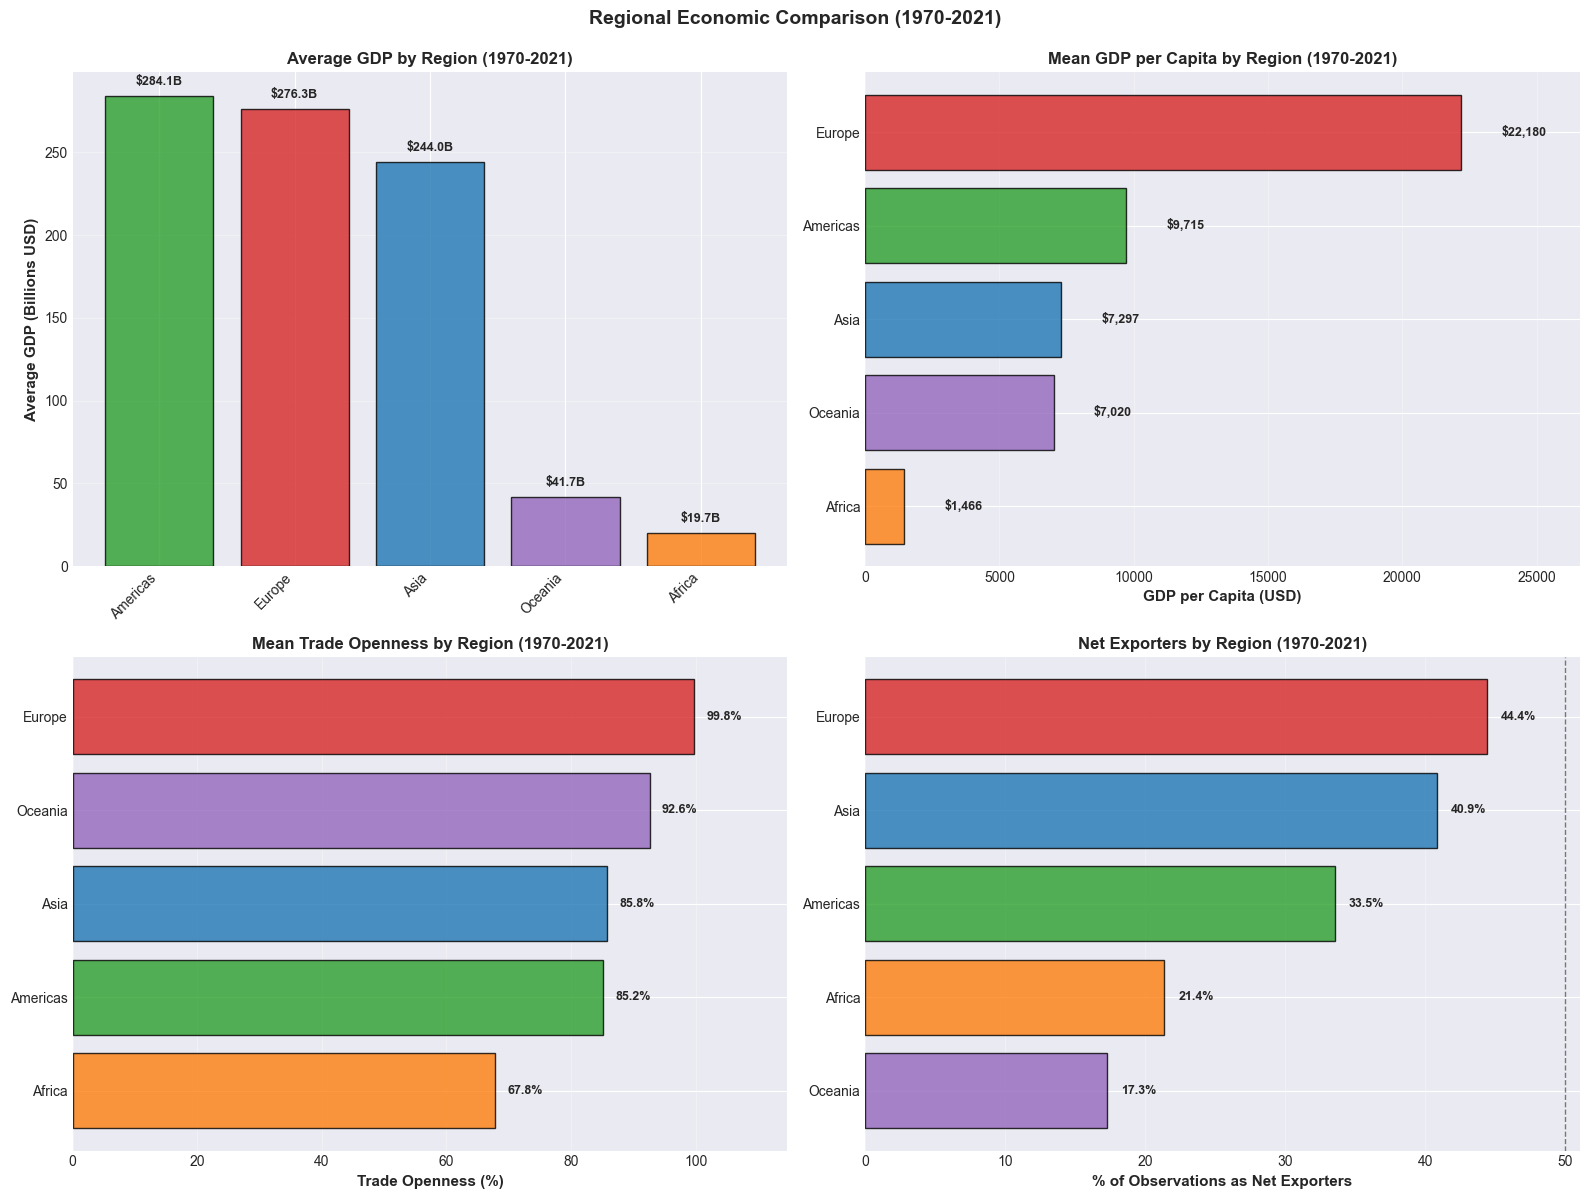

In [45]:
# ==============================================================================
# REGIONAL ECONOMIC ANALYSIS (1970-2021)
# ==============================================================================

display(Markdown("### **Regional Economic Patterns (1970-2021):**"))

# Define consistent colors for each region (use throughout all charts)
region_colors = {
    'Africa': '#ff7f0e',      # Orange
    'Americas': '#2ca02c',    # Green
    'Asia': '#1f77b4',        # Blue
    'Europe': '#d62728',      # Red
    'Oceania': '#9467bd'      # Purple
}

# Create a working copy for region analysis to preserve df_featured in its original state
df_regions = df_featured.copy()

# Calculate regional aggregates across all years
regional_stats = df_regions.groupby('Region').agg({
    'Gross Domestic Product (GDP)': ['sum', 'mean', 'median'],
    'Total_Trade': ['sum', 'mean', 'median'],
    'GDP_per_Capita': ['mean', 'median'],
    'Trade_Openness': ['mean', 'median'],
    'Population': 'sum',
    'Net_Exporter': 'sum',
    'Country': 'count'
}).round(2)

regional_stats.columns = ['_'.join(col).strip() for col in regional_stats.columns.values]
regional_stats = regional_stats.reset_index()

# Rename columns for better readability
regional_stats.columns = [
    'Region',
    'GDP_Total', 'GDP_Mean', 'GDP_Median',
    'Trade_Total', 'Trade_Mean', 'Trade_Median',
    'GDP_per_Capita_Mean', 'GDP_per_Capita_Median',
    'Trade_Openness_Mean', 'Trade_Openness_Median',
    'Population_Total',
    'Net_Exporter_Count',
    'Total_Observations'
]

# Display regional statistics in better format
display(Markdown("\n**Regional Economic Indicators (1970-2021):**"))
print("\n" + "="*120)
print(f"{'Region':<15} {'Countries':<10} {'Observations':<12} {'Avg GDP (B)':<15} {'Avg Trade (B)':<15} {'Avg GDP/Cap':<12} {'Trade Open %':<12}")
print("="*120)

# Calculate unique countries per region
for _, row in regional_stats.iterrows():
    region = row['Region']
    countries = df_regions[df_regions['Region'] == region]['Country'].nunique()
    observations = int(row['Total_Observations'])
    avg_gdp = row['GDP_Mean'] / 1e9
    avg_trade = row['Trade_Mean'] / 1e9
    avg_gdppc = row['GDP_per_Capita_Mean']
    avg_openness = row['Trade_Openness_Mean']
    
    print(f"{region:<15} {countries:<10} {observations:<12} ${avg_gdp:>13.2f} ${avg_trade:>13.2f} ${avg_gdppc:>10,.0f} {avg_openness:>10.1f}%")

print("="*120)

# -----------------------------------------------------------------------------
# DATA-DRIVEN REGIONAL INSIGHTS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("🌍 DATA-DRIVEN REGIONAL INSIGHTS (1970-2021)")
print("="*70)

# 1. GDP Distribution by Region
print(f"\n💰 GDP by Region (All Years Combined):")
gdp_by_region = df_regions.groupby('Region')['Gross Domestic Product (GDP)'].sum().sort_values(ascending=False)
total_global_gdp = gdp_by_region.sum()

for region, gdp in gdp_by_region.items():
    pct = (gdp / total_global_gdp) * 100
    countries = df_regions[df_regions['Region'] == region]['Country'].nunique()
    observations = df_regions[df_regions['Region'] == region].shape[0]
    print(f"   • {region}: ${gdp/1e12:.2f}T ({pct:.1f}% of cumulative, {countries} countries, {observations:,} obs)")

# 2. Trade by Region
print(f"\n🌐 Total Trade by Region (All Years Combined):")
trade_by_region = df_regions.groupby('Region')['Total_Trade'].sum().sort_values(ascending=False)
total_global_trade = trade_by_region.sum()

for region, trade in trade_by_region.items():
    pct = (trade / total_global_trade) * 100
    print(f"   • {region}: ${trade/1e12:.2f}T ({pct:.1f}% of cumulative)")

# 3. GDP per Capita by Region
print(f"\n👤 GDP per Capita by Region (Average Across All Years):")
gdppc_by_region = df_regions.groupby('Region')['GDP_per_Capita'].agg(['mean', 'median']).sort_values('mean', ascending=False)

for region in gdppc_by_region.index:
    mean_val = gdppc_by_region.loc[region, 'mean']
    median_val = gdppc_by_region.loc[region, 'median']
    print(f"   • {region}: Mean ${mean_val:,.0f}, Median ${median_val:,.0f}")

# Calculate regional inequality
richest_region_mean = gdppc_by_region['mean'].iloc[0]
poorest_region_mean = gdppc_by_region['mean'].iloc[-1]
richest_region_name = gdppc_by_region.index[0]
poorest_region_name = gdppc_by_region.index[-1]

print(f"\n   Regional GDP per Capita Ratio:")
print(f"   • Richest ({richest_region_name}): ${richest_region_mean:,.0f}")
print(f"   • Poorest ({poorest_region_name}): ${poorest_region_mean:,.0f}")
print(f"   • Ratio: {richest_region_mean/poorest_region_mean:.2f}x")

# 4. Trade Openness by Region
print(f"\n📊 Trade Openness by Region (Average Across All Years):")
openness_by_region = df_regions.groupby('Region')['Trade_Openness'].agg(['mean', 'median']).sort_values('mean', ascending=False)

for region in openness_by_region.index:
    mean_val = openness_by_region.loc[region, 'mean']
    median_val = openness_by_region.loc[region, 'median']
    print(f"   • {region}: Mean {mean_val:.1f}%, Median {median_val:.1f}%")

# 5. Net Exporters by Region
print(f"\n⚖️  Net Exporters by Region (All Observations):")
for region in df_regions['Region'].unique():
    region_data = df_regions[df_regions['Region'] == region]
    net_exporters = region_data['Net_Exporter'].sum()
    total_observations = len(region_data)
    pct = (net_exporters / total_observations) * 100
    print(f"   • {region}: {net_exporters:,}/{total_observations:,} observations ({pct:.1f}%) are net exporters")

print("\n" + "="*70)

# -----------------------------------------------------------------------------
# REGIONAL VISUALIZATIONS (AVERAGES 1970-2021)
# -----------------------------------------------------------------------------

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Average GDP by Region
ax = axes[0, 0]
avg_gdp_by_region = df_regions.groupby('Region')['Gross Domestic Product (GDP)'].mean().sort_values(ascending=False)
gdp_plot = avg_gdp_by_region / 1e9
colors = [region_colors[region] for region in gdp_plot.index]
bars = ax.bar(gdp_plot.index, gdp_plot.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average GDP (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('Average GDP by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels
for i, (region, value) in enumerate(gdp_plot.items()):
    ax.text(i, value + 5, f'${value:.1f}B', 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Chart 2: GDP per Capita by Region
ax = axes[0, 1]
mean_gdppc = gdppc_by_region['mean'].sort_values(ascending=True)
colors = [region_colors[region] for region in mean_gdppc.index]
bars = ax.barh(mean_gdppc.index, mean_gdppc.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('GDP per Capita (USD)', fontsize=11, fontweight='bold')
ax.set_title('Mean GDP per Capita by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = mean_gdppc.max()
ax.set_xlim(0, max_val * 1.2)

# Add value labels
for i, (region, value) in enumerate(mean_gdppc.items()):
    ax.text(value + 1500, i, f'${value:,.0f}', 
            va='center', fontsize=9, fontweight='bold')

# Chart 3: Trade Openness by Region
ax = axes[1, 0]
mean_openness = openness_by_region['mean'].sort_values(ascending=True)
colors = [region_colors[region] for region in mean_openness.index]
bars = ax.barh(mean_openness.index, mean_openness.values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Mean Trade Openness by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = mean_openness.max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (region, value) in enumerate(mean_openness.items()):
    ax.text(value + 2, i, f'{value:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

# Chart 4: Net Exporters Percentage
ax = axes[1, 1]
net_export_pcts = []
regions_list = []
for region in df_regions['Region'].unique():
    region_data = df_regions[df_regions['Region'] == region]
    pct = (region_data['Net_Exporter'].sum() / len(region_data)) * 100
    net_export_pcts.append(pct)
    regions_list.append(region)

# Sort by percentage
sorted_data = sorted(zip(regions_list, net_export_pcts), key=lambda x: x[1])
sorted_regions = [x[0] for x in sorted_data]
sorted_pcts = [x[1] for x in sorted_data]

colors = [region_colors[region] for region in sorted_regions]
bars = ax.barh(sorted_regions, sorted_pcts, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('% of Observations as Net Exporters', fontsize=11, fontweight='bold')
ax.set_title('Net Exporters by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
ax.axvline(x=50, color='black', linestyle='--', linewidth=1, alpha=0.5)
max_val = max(sorted_pcts)
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (region, value) in enumerate(zip(sorted_regions, sorted_pcts)):
    ax.text(value + 1, i, f'{value:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

plt.suptitle('Regional Economic Comparison (1970-2021)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### **Trade Patterns Analysis (1970-2021):**


⚖️  NET EXPORTERS VS NET IMPORTERS ANALYSIS (1970-2021)

📊 Distribution:
   • Total observations: 10,512
   • Net Exporter observations: 3,450 (32.8%)
   • Net Importer observations: 7,062 (67.2%)

💰 Trade Balance:
   • Net Exporters cumulative surplus: $39.90T
   • Net Importers cumulative deficit: $-31.53T
   • Net Exporters average balance: $11.57B
   • Net Importers average balance: $-4.46B
   • Global trade balance: $8.38T

💵 GDP Comparison:
   • Net Exporters mean GDP: $260.17B
   • Net Importers mean GDP: $145.11B
   • Net Exporters cumulative GDP: $897.60T (46.7%)
   • Net Importers cumulative GDP: $1024.80T (53.3%)

📦 Export/Import Ratio:
   • Net Exporters mean ratio: 1.28
   • Net Importers mean ratio: 0.68

🌐 Trade Openness:
   • Net Exporters mean: 97.8%
   • Net Importers mean: 77.7%
   • Difference: 20.1 percentage points

👤 GDP per Capita:
   • Net Exporters mean: $17,566
   • Net Importers mean: $5,234
   • Net Exporters are 235.6% wealthier per capita

🌍 Net Exporter

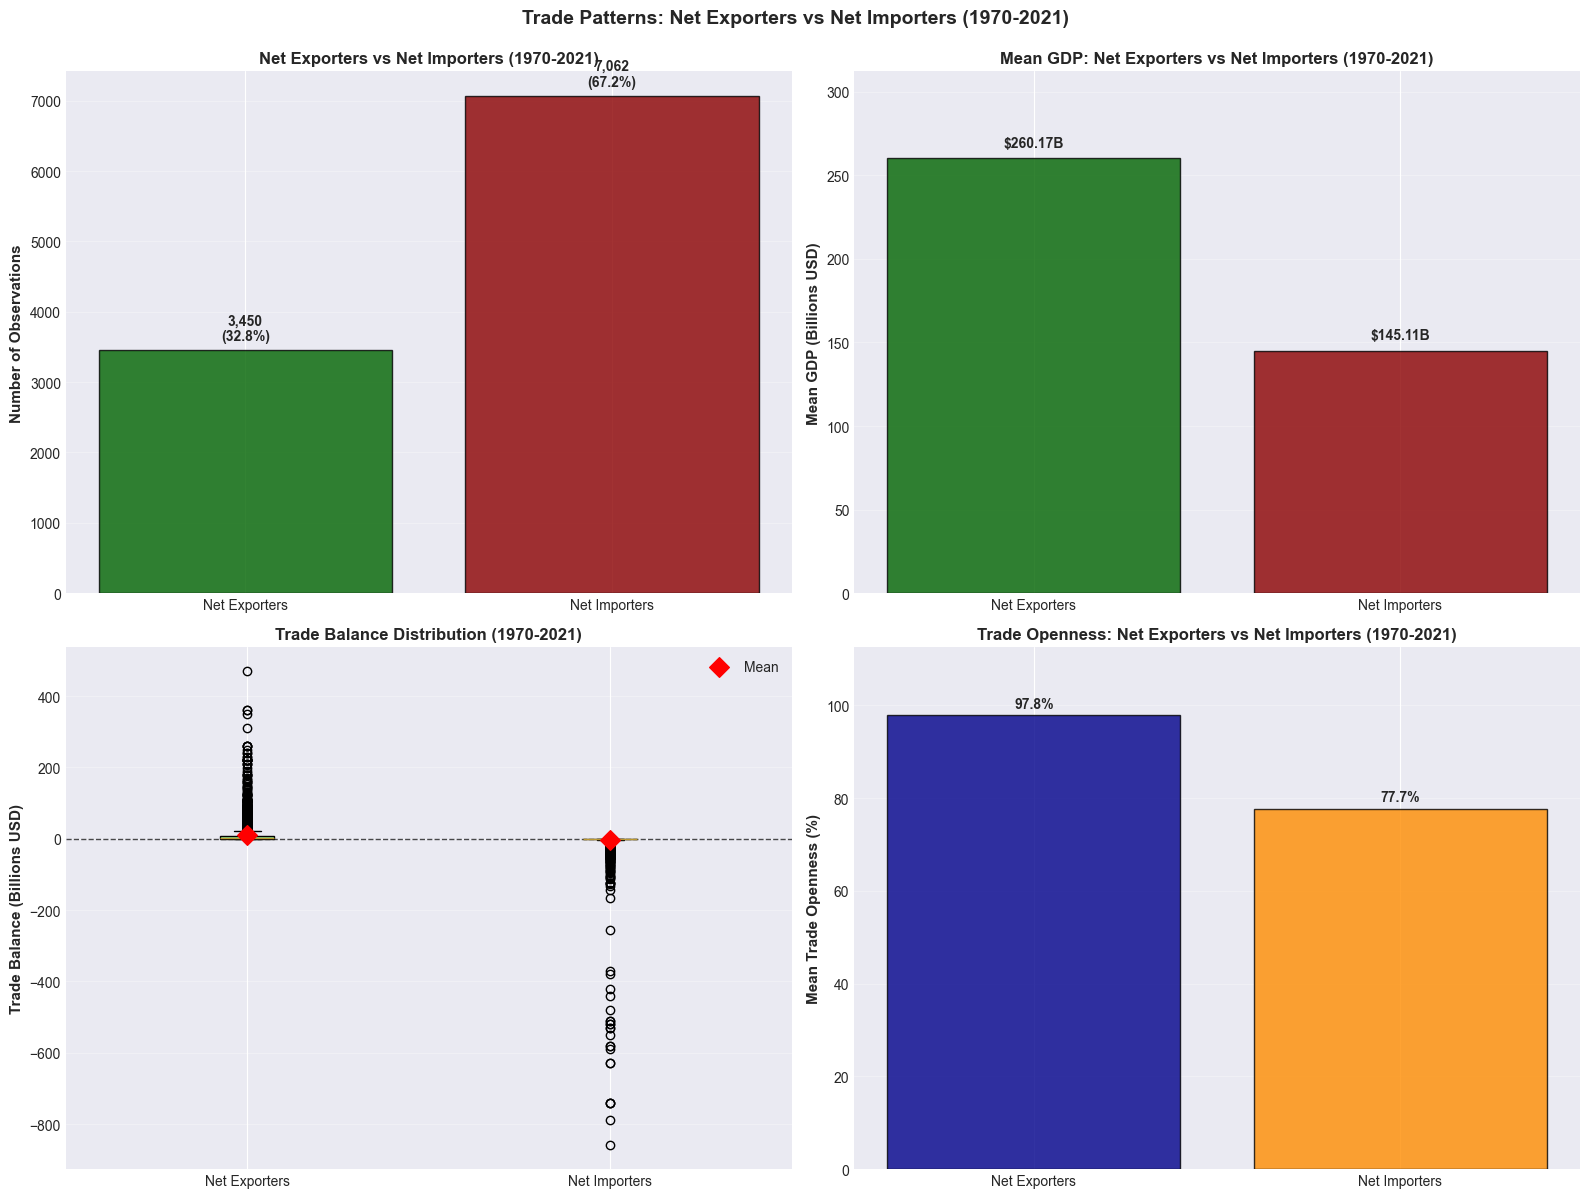

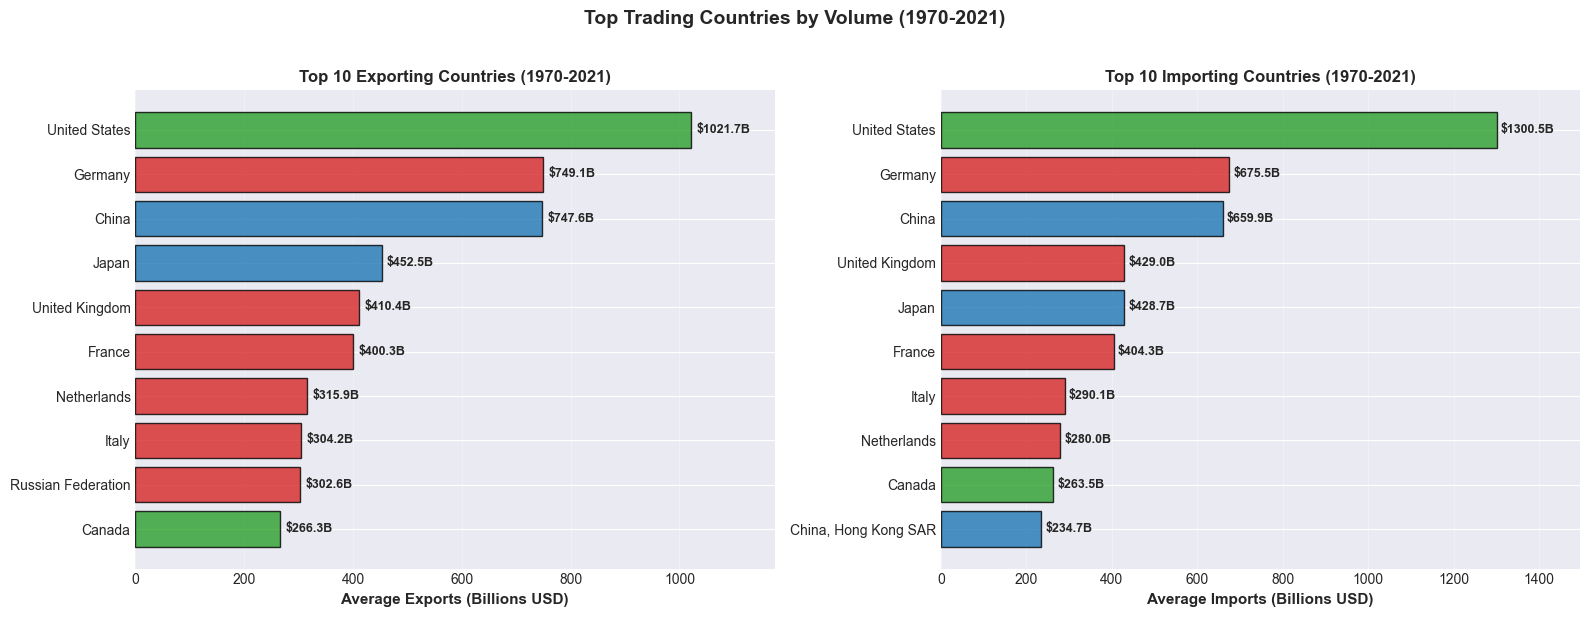

In [46]:
# ==============================================================================
# TRADE PATTERNS: NET EXPORTERS VS NET IMPORTERS (1970-2021)
# ==============================================================================

display(Markdown("### **Trade Patterns Analysis (1970-2021):**"))

# # Create a working copy for trade paanalysis to preserve df_featured in its original state
df_trade = df_featured.copy()

# Separate net exporters and net importers
net_exporters = df_trade[df_trade['Net_Exporter'] == True].copy()
net_importers = df_trade[df_trade['Net_Exporter'] == False].copy()

# -----------------------------------------------------------------------------
# DATA-DRIVEN TRADE PATTERN INSIGHTS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("⚖️  NET EXPORTERS VS NET IMPORTERS ANALYSIS (1970-2021)")
print("="*70)

# 1. Basic Counts
total_observations = len(df_trade)
n_exporters = len(net_exporters)
n_importers = len(net_importers)

print(f"\n📊 Distribution:")
print(f"   • Total observations: {total_observations:,}")
print(f"   • Net Exporter observations: {n_exporters:,} ({n_exporters/total_observations*100:.1f}%)")
print(f"   • Net Importer observations: {n_importers:,} ({n_importers/total_observations*100:.1f}%)")

# 2. Trade Balance Comparison
exporters_trade_bal = net_exporters['Trade_Balance'].sum()
importers_trade_bal = net_importers['Trade_Balance'].sum()
exporters_avg_bal = net_exporters['Trade_Balance'].mean()
importers_avg_bal = net_importers['Trade_Balance'].mean()

print(f"\n💰 Trade Balance:")
print(f"   • Net Exporters cumulative surplus: ${exporters_trade_bal/1e12:.2f}T")
print(f"   • Net Importers cumulative deficit: ${importers_trade_bal/1e12:.2f}T")
print(f"   • Net Exporters average balance: ${exporters_avg_bal/1e9:.2f}B")
print(f"   • Net Importers average balance: ${importers_avg_bal/1e9:.2f}B")
print(f"   • Global trade balance: ${(exporters_trade_bal + importers_trade_bal)/1e12:.2f}T")

# 3. GDP Comparison
exporters_gdp_mean = net_exporters['Gross Domestic Product (GDP)'].mean()
importers_gdp_mean = net_importers['Gross Domestic Product (GDP)'].mean()
exporters_gdp_total = net_exporters['Gross Domestic Product (GDP)'].sum()
importers_gdp_total = net_importers['Gross Domestic Product (GDP)'].sum()

print(f"\n💵 GDP Comparison:")
print(f"   • Net Exporters mean GDP: ${exporters_gdp_mean/1e9:.2f}B")
print(f"   • Net Importers mean GDP: ${importers_gdp_mean/1e9:.2f}B")
print(f"   • Net Exporters cumulative GDP: ${exporters_gdp_total/1e12:.2f}T ({exporters_gdp_total/(exporters_gdp_total+importers_gdp_total)*100:.1f}%)")
print(f"   • Net Importers cumulative GDP: ${importers_gdp_total/1e12:.2f}T ({importers_gdp_total/(exporters_gdp_total+importers_gdp_total)*100:.1f}%)")

# 4. Export/Import Ratio Comparison
exporters_ratio_mean = net_exporters['Export_Import_Ratio'].mean()
importers_ratio_mean = net_importers['Export_Import_Ratio'].mean()

print(f"\n📦 Export/Import Ratio:")
print(f"   • Net Exporters mean ratio: {exporters_ratio_mean:.2f}")
print(f"   • Net Importers mean ratio: {importers_ratio_mean:.2f}")

# 5. Trade Openness Comparison
exporters_openness_mean = net_exporters['Trade_Openness'].mean()
importers_openness_mean = net_importers['Trade_Openness'].mean()

print(f"\n🌐 Trade Openness:")
print(f"   • Net Exporters mean: {exporters_openness_mean:.1f}%")
print(f"   • Net Importers mean: {importers_openness_mean:.1f}%")
print(f"   • Difference: {abs(exporters_openness_mean - importers_openness_mean):.1f} percentage points")

# 6. GDP per Capita Comparison
exporters_gdppc_mean = net_exporters['GDP_per_Capita'].mean()
importers_gdppc_mean = net_importers['GDP_per_Capita'].mean()

print(f"\n👤 GDP per Capita:")
print(f"   • Net Exporters mean: ${exporters_gdppc_mean:,.0f}")
print(f"   • Net Importers mean: ${importers_gdppc_mean:,.0f}")

if exporters_gdppc_mean > importers_gdppc_mean:
    diff_pct = ((exporters_gdppc_mean/importers_gdppc_mean - 1) * 100)
    print(f"   • Net Exporters are {diff_pct:.1f}% wealthier per capita")
else:
    diff_pct = ((importers_gdppc_mean/exporters_gdppc_mean - 1) * 100)
    print(f"   • Net Importers are {diff_pct:.1f}% wealthier per capita")

# 7. Regional Distribution
print(f"\n🌍 Net Exporter Observations by Region:")
exporters_by_region = net_exporters['Region'].value_counts()
for region, count in exporters_by_region.items():
    total_in_region = df_trade[df_trade['Region'] == region].shape[0]
    pct = (count / total_in_region) * 100
    print(f"   • {region}: {count:,}/{total_in_region:,} observations ({pct:.1f}%)")

print(f"\n🌍 Net Importer Observations by Region:")
importers_by_region = net_importers['Region'].value_counts()
for region, count in importers_by_region.items():
    total_in_region = df_trade[df_trade['Region'] == region].shape[0]
    pct = (count / total_in_region) * 100
    print(f"   • {region}: {count:,}/{total_in_region:,} observations ({pct:.1f}%)")

# 8. Top 10 Largest Average Surpluses and Deficits
print(f"\n🏆 Top 10 Countries with Highest Average Trade Surplus (1970-2021):")
avg_trade_balance = df_trade.groupby('Country')['Trade_Balance'].mean().nlargest(10)
for country, avg_bal in avg_trade_balance.items():
    region = df_trade[df_trade['Country'] == country]['Region'].iloc[0]
    years = df_trade[df_trade['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_bal/1e9:>8.2f}B avg ({years} years, {region})")

print(f"\n📉 Top 10 Countries with Highest Average Trade Deficit (1970-2021):")
avg_trade_deficit = df_trade.groupby('Country')['Trade_Balance'].mean().nsmallest(10)
for country, avg_bal in avg_trade_deficit.items():
    region = df_trade[df_trade['Country'] == country]['Region'].iloc[0]
    years = df_trade[df_trade['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_bal/1e9:>8.2f}B avg ({years} years, {region})")

# 9. Top 10 Exporters by Volume
print(f"\n🚢 Top 10 Exporting Countries (Average Export Volume 1970-2021):")
avg_exports = df_trade.groupby('Country')['Exports of goods and services'].mean().nlargest(10)
for country, avg_exp in avg_exports.items():
    region = df_trade[df_trade['Country'] == country]['Region'].iloc[0]
    years = df_trade[df_trade['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_exp/1e9:>8.2f}B avg ({years} years, {region})")

# 10. Top 10 Importers by Volume
print(f"\n📦 Top 10 Importing Countries (Average Import Volume 1970-2021):")
avg_imports = df_trade.groupby('Country')['Imports of goods and services'].mean().nlargest(10)
for country, avg_imp in avg_imports.items():
    region = df_trade[df_trade['Country'] == country]['Region'].iloc[0]
    years = df_trade[df_trade['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_imp/1e9:>8.2f}B avg ({years} years, {region})")

print("\n" + "="*70)

# -----------------------------------------------------------------------------
# VISUALIZATIONS - PART 1: NET EXPORTERS VS IMPORTERS
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Count Comparison
ax = axes[0, 0]
counts = [n_exporters, n_importers]
labels = ['Net Exporters', 'Net Importers']
colors = ['darkgreen', 'darkred']
bars = ax.bar(labels, counts, color=colors, edgecolor='black', alpha=0.8)
ax.set_ylabel('Number of Observations', fontsize=11, fontweight='bold')
ax.set_title('Net Exporters vs Net Importers (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels with percentages
for i, (label, count) in enumerate(zip(labels, counts)):
    pct = (count / total_observations) * 100
    ax.text(i, count + 100, f'{count:,}\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 2: GDP Comparison
ax = axes[0, 1]
gdp_comparison = pd.DataFrame({
    'Category': ['Net Exporters', 'Net Importers'],
    'Mean GDP (Billions)': [exporters_gdp_mean/1e9, importers_gdp_mean/1e9]
})
bars = ax.bar(gdp_comparison['Category'], gdp_comparison['Mean GDP (Billions)'], 
              color=['darkgreen', 'darkred'], edgecolor='black', alpha=0.8)
ax.set_ylabel('Mean GDP (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('Mean GDP: Net Exporters vs Net Importers (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
max_val = max(gdp_comparison['Mean GDP (Billions)'])
ax.set_ylim(0, max_val * 1.2)

# Add value labels
for i, (cat, val) in enumerate(zip(gdp_comparison['Category'], gdp_comparison['Mean GDP (Billions)'])):
    ax.text(i, val + 5, f'${val:.2f}B', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Chart 3: Trade Balance Distribution
ax = axes[1, 0]
box_data = [net_exporters['Trade_Balance'].dropna()/1e9, 
            net_importers['Trade_Balance'].dropna()/1e9]
bp = ax.boxplot(box_data, labels=['Net Exporters', 'Net Importers'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightgreen')
bp['boxes'][1].set_facecolor('lightcoral')
ax.set_ylabel('Trade Balance (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('Trade Balance Distribution (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.7)

# Add mean markers
ax.scatter([1, 2], [exporters_avg_bal/1e9, importers_avg_bal/1e9], 
           color='red', s=100, marker='D', zorder=3, label='Mean')
ax.legend()

# Chart 4: Trade Openness Comparison
ax = axes[1, 1]
openness_comparison = pd.DataFrame({
    'Category': ['Net Exporters', 'Net Importers'],
    'Mean Trade Openness': [exporters_openness_mean, importers_openness_mean]
})
bars = ax.bar(openness_comparison['Category'], openness_comparison['Mean Trade Openness'], 
              color=['darkblue', 'darkorange'], edgecolor='black', alpha=0.8)
ax.set_ylabel('Mean Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Trade Openness: Net Exporters vs Net Importers (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
max_val = max(openness_comparison['Mean Trade Openness'])
ax.set_ylim(0, max_val * 1.15)

# Add value labels
for i, (cat, val) in enumerate(zip(openness_comparison['Category'], openness_comparison['Mean Trade Openness'])):
    ax.text(i, val + 1, f'{val:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.suptitle('Trade Patterns: Net Exporters vs Net Importers (1970-2021)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# VISUALIZATIONS - PART 2: TOP EXPORTERS AND IMPORTERS BY VOLUME
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 5: Top 10 Exporters
ax = axes[0]
top10_exp_sorted = avg_exports.sort_values(ascending=True)
countries_exp = [c for c in top10_exp_sorted.index]
colors = [region_colors[df_trade[df_trade['Country'] == c]['Region'].iloc[0]] for c in countries_exp]
bars = ax.barh(countries_exp, top10_exp_sorted.values/1e9, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Exports (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Exporting Countries (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = top10_exp_sorted.max() / 1e9
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (country, value) in enumerate(top10_exp_sorted.items()):
    ax.text(value/1e9 + 10, i, f'${value/1e9:.1f}B', 
            va='center', fontsize=9, fontweight='bold')

# Chart 6: Top 10 Importers
ax = axes[1]
top10_imp_sorted = avg_imports.sort_values(ascending=True)
countries_imp = [c for c in top10_imp_sorted.index]
colors = [region_colors[df_trade[df_trade['Country'] == c]['Region'].iloc[0]] for c in countries_imp]
bars = ax.barh(countries_imp, top10_imp_sorted.values/1e9, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Imports (Billions USD)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Importing Countries (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = top10_imp_sorted.max() / 1e9
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (country, value) in enumerate(top10_imp_sorted.items()):
    ax.text(value/1e9 + 10, i, f'${value/1e9:.1f}B', 
            va='center', fontsize=9, fontweight='bold')

plt.suptitle('Top Trading Countries by Volume (1970-2021)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### **Population and Trade Analysis (1970-2021):**


👥 TRADE PER CAPITA ANALYSIS (1970-2021)

📊 Trade per Capita Statistics:
   • Mean: $10,154
   • Median: $1,795
   • Standard Deviation: $27,428
   • Min: $6
   • Max: $519,301

🏆 Top 10 Countries by Average Trade per Capita (1970-2021):
   • Luxembourg                $   160,796 (52 years, Europe)
   • San Marino                $   154,571 (52 years, Europe)
   • Liechtenstein             $    89,427 (52 years, Europe)
   • Singapore                 $    86,875 (52 years, Asia)
   • China, Hong Kong SAR      $    67,863 (52 years, Asia)
   • Sint Maarten (Dutch part) $    63,447 (17 years, Americas)
   • Cayman Islands            $    55,922 (52 years, Americas)
   • Ireland                   $    54,606 (52 years, Europe)
   • Monaco                    $    52,894 (52 years, Europe)
   • Switzerland               $    46,824 (52 years, Europe)

📉 Bottom 10 Countries by Average Trade per Capita (1970-2021):
   • Ethiopia (Former)         $        42 (24 years, Africa)
   • Burundi    

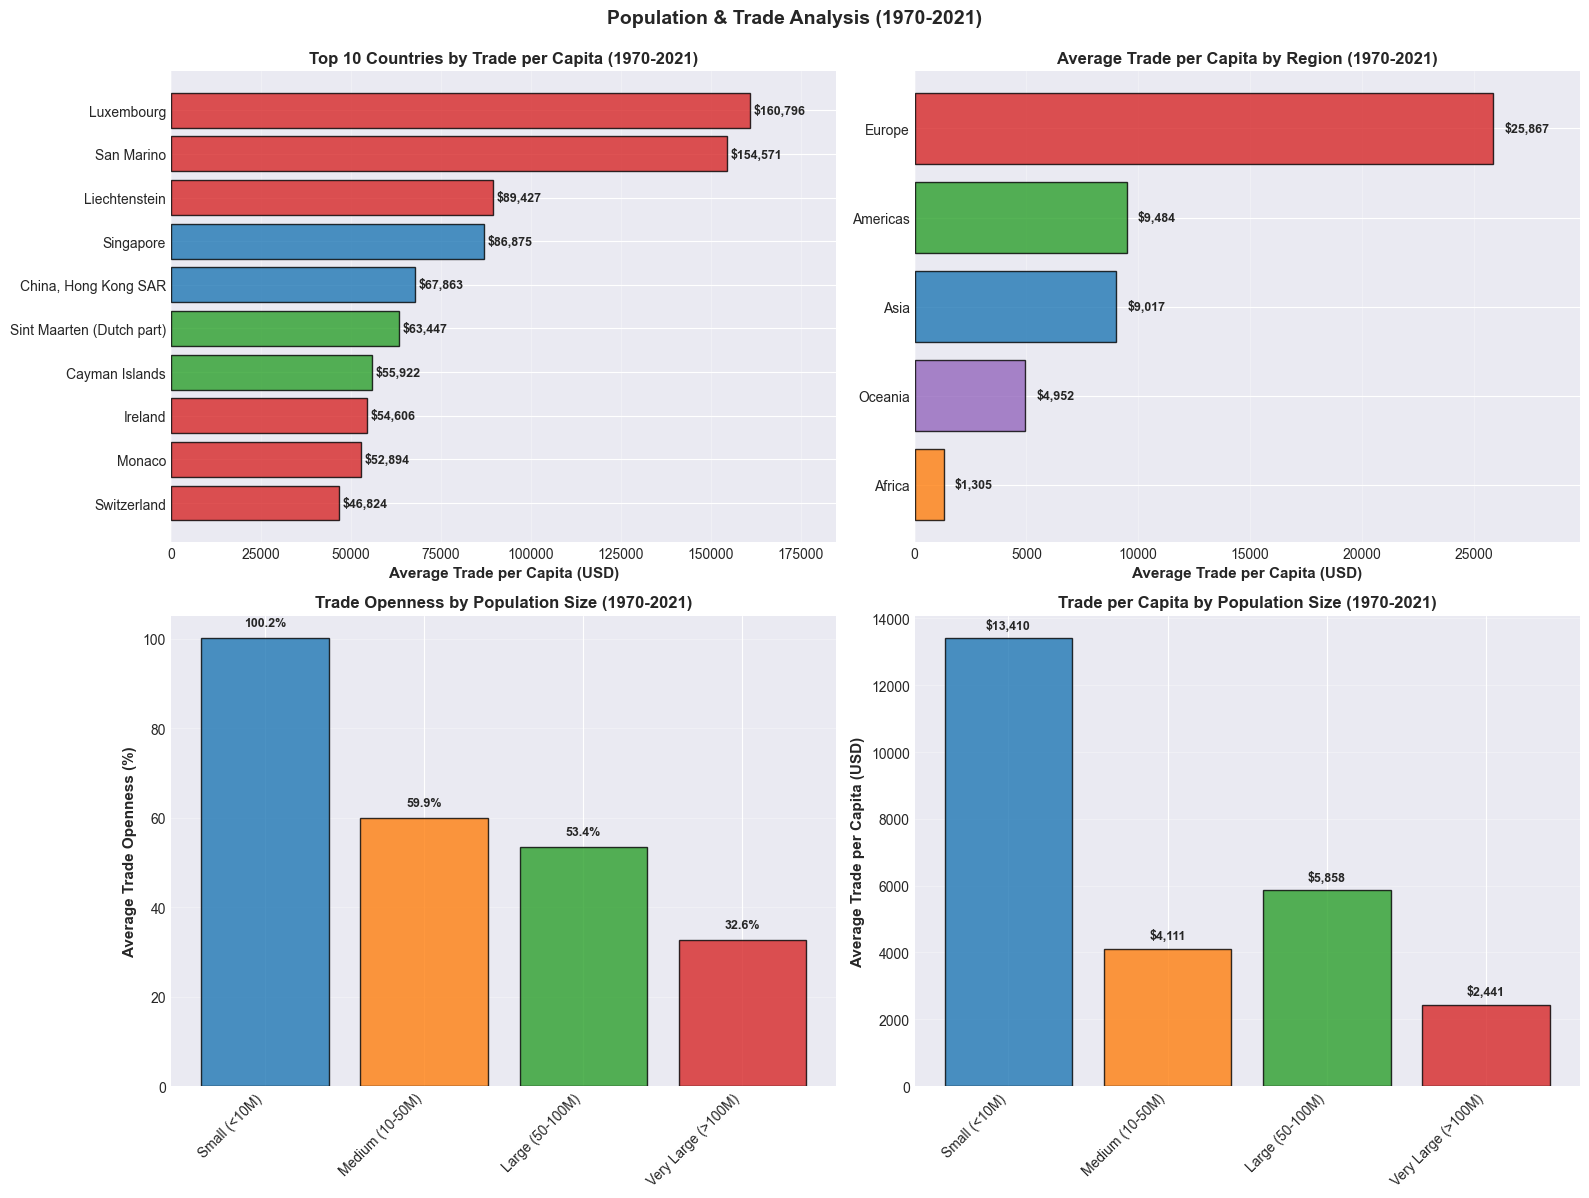

In [47]:
# ==============================================================================
# POPULATION and TRADE ANALYSIS (1970-2021)
# ==============================================================================

display(Markdown("### **Population and Trade Analysis (1970-2021):**"))

# Working copy for analysis (preserves original df_featured)
df_pop = df_featured.copy()

# -----------------------------------------------------------------------------
# TRADE PER CAPITA ANALYSIS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("👥 TRADE PER CAPITA ANALYSIS (1970-2021)")
print("="*70)

# Calculate Trade per Capita (already exists in dataset as Total_Trade / Population)
df_pop['Trade_per_Capita'] = df_pop['Total_Trade'] / df_pop['Population']

# Overall statistics
trade_pc_mean = df_pop['Trade_per_Capita'].mean()
trade_pc_median = df_pop['Trade_per_Capita'].median()
trade_pc_std = df_pop['Trade_per_Capita'].std()

print(f"\n📊 Trade per Capita Statistics:")
print(f"   • Mean: ${trade_pc_mean:,.0f}")
print(f"   • Median: ${trade_pc_median:,.0f}")
print(f"   • Standard Deviation: ${trade_pc_std:,.0f}")
print(f"   • Min: ${df_pop['Trade_per_Capita'].min():,.0f}")
print(f"   • Max: ${df_pop['Trade_per_Capita'].max():,.0f}")

# Top 10 by Average Trade per Capita
print(f"\n🏆 Top 10 Countries by Average Trade per Capita (1970-2021):")
avg_trade_pc = df_pop.groupby('Country')['Trade_per_Capita'].mean().nlargest(10)
for country, avg_tpc in avg_trade_pc.items():
    region = df_pop[df_pop['Country'] == country]['Region'].iloc[0]
    years = df_pop[df_pop['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_tpc:>10,.0f} ({years} years, {region})")

# Bottom 10 by Average Trade per Capita
print(f"\n📉 Bottom 10 Countries by Average Trade per Capita (1970-2021):")
bottom_trade_pc = df_pop.groupby('Country')['Trade_per_Capita'].mean().nsmallest(10)
for country, avg_tpc in bottom_trade_pc.items():
    region = df_pop[df_pop['Country'] == country]['Region'].iloc[0]
    years = df_pop[df_pop['Country'] == country].shape[0]
    print(f"   • {country:<25} ${avg_tpc:>10,.0f} ({years} years, {region})")

# Regional Trade per Capita
print(f"\n🌍 Average Trade per Capita by Region:")
regional_trade_pc = df_pop.groupby('Region')['Trade_per_Capita'].agg(['mean', 'median']).sort_values('mean', ascending=False)
for region in regional_trade_pc.index:
    mean_val = regional_trade_pc.loc[region, 'mean']
    median_val = regional_trade_pc.loc[region, 'median']
    print(f"   • {region}: Mean ${mean_val:,.0f}, Median ${median_val:,.0f}")

# -----------------------------------------------------------------------------
#  POPULATION SIZE CATEGORIES
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("📏 POPULATION SIZE VS TRADE PATTERNS")
print("="*70)

# Define population categories
df_pop['Pop_Category'] = pd.cut(df_pop['Population'], 
                                  bins=[0, 10e6, 50e6, 100e6, float('inf')],
                                  labels=['Small (<10M)', 'Medium (10-50M)', 'Large (50-100M)', 'Very Large (>100M)'])

# Count observations by category
print(f"\n📊 Distribution by Population Size:")
for category in ['Small (<10M)', 'Medium (10-50M)', 'Large (50-100M)', 'Very Large (>100M)']:
    count = (df_pop['Pop_Category'] == category).sum()
    pct = (count / len(df_pop)) * 100
    countries = df_pop[df_pop['Pop_Category'] == category]['Country'].nunique()
    print(f"   • {category:<20} {count:>6,} observations ({pct:>5.1f}%), {countries} countries")

# Compare trade patterns by population category
print(f"\n💰 Economic Indicators by Population Category:")
pop_comparison = df_pop.groupby('Pop_Category').agg({
    'Gross Domestic Product (GDP)': 'mean',
    'Total_Trade': 'mean',
    'Trade_Openness': 'mean',
    'GDP_per_Capita': 'mean',
    'Trade_per_Capita': 'mean',
    'Net_Exporter': lambda x: (x.sum() / len(x) * 100)
}).round(2)

print(f"\n{'Category':<20} {'Avg GDP (B)':<15} {'Avg Trade (B)':<15} {'Trade Open %':<15} {'GDP/Cap':<12} {'Trade/Cap':<12} {'% Net Exp':<10}")
print("="*120)
for category in ['Small (<10M)', 'Medium (10-50M)', 'Large (50-100M)', 'Very Large (>100M)']:
    if category in pop_comparison.index:
        row = pop_comparison.loc[category]
        print(f"{category:<20} ${row['Gross Domestic Product (GDP)']/1e9:>13.2f} ${row['Total_Trade']/1e9:>13.2f} {row['Trade_Openness']:>13.1f}% ${row['GDP_per_Capita']:>10,.0f} ${row['Trade_per_Capita']:>10,.0f} {row['Net_Exporter']:>8.1f}%")

print("="*120)

# Key findings
small_countries = df_pop[df_pop['Pop_Category'] == 'Small (<10M)']
large_countries = df_pop[df_pop['Pop_Category'] == 'Very Large (>100M)']

small_openness = small_countries['Trade_Openness'].mean()
large_openness = large_countries['Trade_Openness'].mean()
small_trade_pc = small_countries['Trade_per_Capita'].mean()
large_trade_pc = large_countries['Trade_per_Capita'].mean()

print(f"\n🔍 Key Findings:")
print(f"   • Small countries trade openness: {small_openness:.1f}%")
print(f"   • Large countries trade openness: {large_openness:.1f}%")
if small_openness > large_openness:
    print(f"   • Small countries are {((small_openness/large_openness - 1) * 100):.1f}% more open to trade")
else:
    print(f"   • Large countries are {((large_openness/small_openness - 1) * 100):.1f}% more open to trade")

print(f"\n   • Small countries trade per capita: ${small_trade_pc:,.0f}")
print(f"   • Large countries trade per capita: ${large_trade_pc:,.0f}")
if small_trade_pc > large_trade_pc:
    print(f"   • Small countries trade {(small_trade_pc/large_trade_pc):.2f}x more per person")
else:
    print(f"   • Large countries trade {(large_trade_pc/small_trade_pc):.2f}x more per person")

print("\n" + "="*70)

# -----------------------------------------------------------------------------
# VISUALIZATIONS
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Top 10 by Trade per Capita
ax = axes[0, 0]
top10_tpc_sorted = avg_trade_pc.sort_values(ascending=True)
countries_tpc = [c for c in top10_tpc_sorted.index]
colors = [region_colors[df_pop[df_pop['Country'] == c]['Region'].iloc[0]] for c in countries_tpc]
bars = ax.barh(countries_tpc, top10_tpc_sorted.values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Trade per Capita (USD)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Countries by Trade per Capita (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = top10_tpc_sorted.max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (country, value) in enumerate(top10_tpc_sorted.items()):
    ax.text(value + 1000, i, f'${value:,.0f}', 
            va='center', fontsize=9, fontweight='bold')

# Chart 2: Trade per Capita by Region
ax = axes[0, 1]
regional_tpc_sorted = regional_trade_pc['mean'].sort_values(ascending=True)
colors = [region_colors[region] for region in regional_tpc_sorted.index]
bars = ax.barh(regional_tpc_sorted.index, regional_tpc_sorted.values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Trade per Capita (USD)', fontsize=11, fontweight='bold')
ax.set_title('Average Trade per Capita by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = regional_tpc_sorted.max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (region, value) in enumerate(regional_tpc_sorted.items()):
    ax.text(value + 500, i, f'${value:,.0f}', 
            va='center', fontsize=9, fontweight='bold')

# Chart 3: Trade Openness by Population Category
ax = axes[1, 0]
categories = ['Small (<10M)', 'Medium (10-50M)', 'Large (50-100M)', 'Very Large (>100M)']
openness_by_cat = [pop_comparison.loc[cat, 'Trade_Openness'] if cat in pop_comparison.index else 0 for cat in categories]
colors_cat = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = ax.bar(range(len(categories)), openness_by_cat, color=colors_cat, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Trade Openness by Population Size (1970-2021)', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, val in enumerate(openness_by_cat):
    ax.text(i, val + 2, f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Chart 4: Trade per Capita by Population Category
ax = axes[1, 1]
trade_pc_by_cat = [pop_comparison.loc[cat, 'Trade_per_Capita'] if cat in pop_comparison.index else 0 for cat in categories]
bars = ax.bar(range(len(categories)), trade_pc_by_cat, color=colors_cat, edgecolor='black', alpha=0.8)
ax.set_ylabel('Average Trade per Capita (USD)', fontsize=11, fontweight='bold')
ax.set_title('Trade per Capita by Population Size (1970-2021)', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, val in enumerate(trade_pc_by_cat):
    ax.text(i, val + 200, f'${val:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.suptitle('Population & Trade Analysis (1970-2021)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

### **Trade Dependency Analysis (1970-2021):**


🔗 TRADE DEPENDENCY ANALYSIS (1970-2021)

📊 Trade Dependency Statistics (Trade as % of GDP):
   • Mean: 84.3%
   • Median: 73.8%
   • Standard Deviation: 58.0%
   • Min: 3.3%
   • Max: 593.7%

📈 Trade Dependency Distribution:
   • Very High (>100%): 2,972 observations (28.3%)
   • High (60-100%): 3,561 observations (33.9%)
   • Moderate (30-60%): 3,018 observations (28.7%)
   • Low (<30%): 961 observations (9.1%)

🏆 Top 10 Most Trade-Dependent Countries (Highest Avg Trade Openness):
   • San Marino                 464.7% (52 years, Europe)
   • Singapore                  339.5% (52 years, Asia)
   • China, Hong Kong SAR       267.6% (52 years, Asia)
   • Malta                      246.2% (52 years, Europe)
   • Luxembourg                 238.4% (52 years, Europe)
   • Sint Maarten (Dutch part)  221.2% (17 years, Americas)
   • Former Netherlands Antilles  176.3% (43 years, Americas)
   • British Virgin Islands     169.0% (52 years, Americas)
   • Aruba                      163.9% (52 y

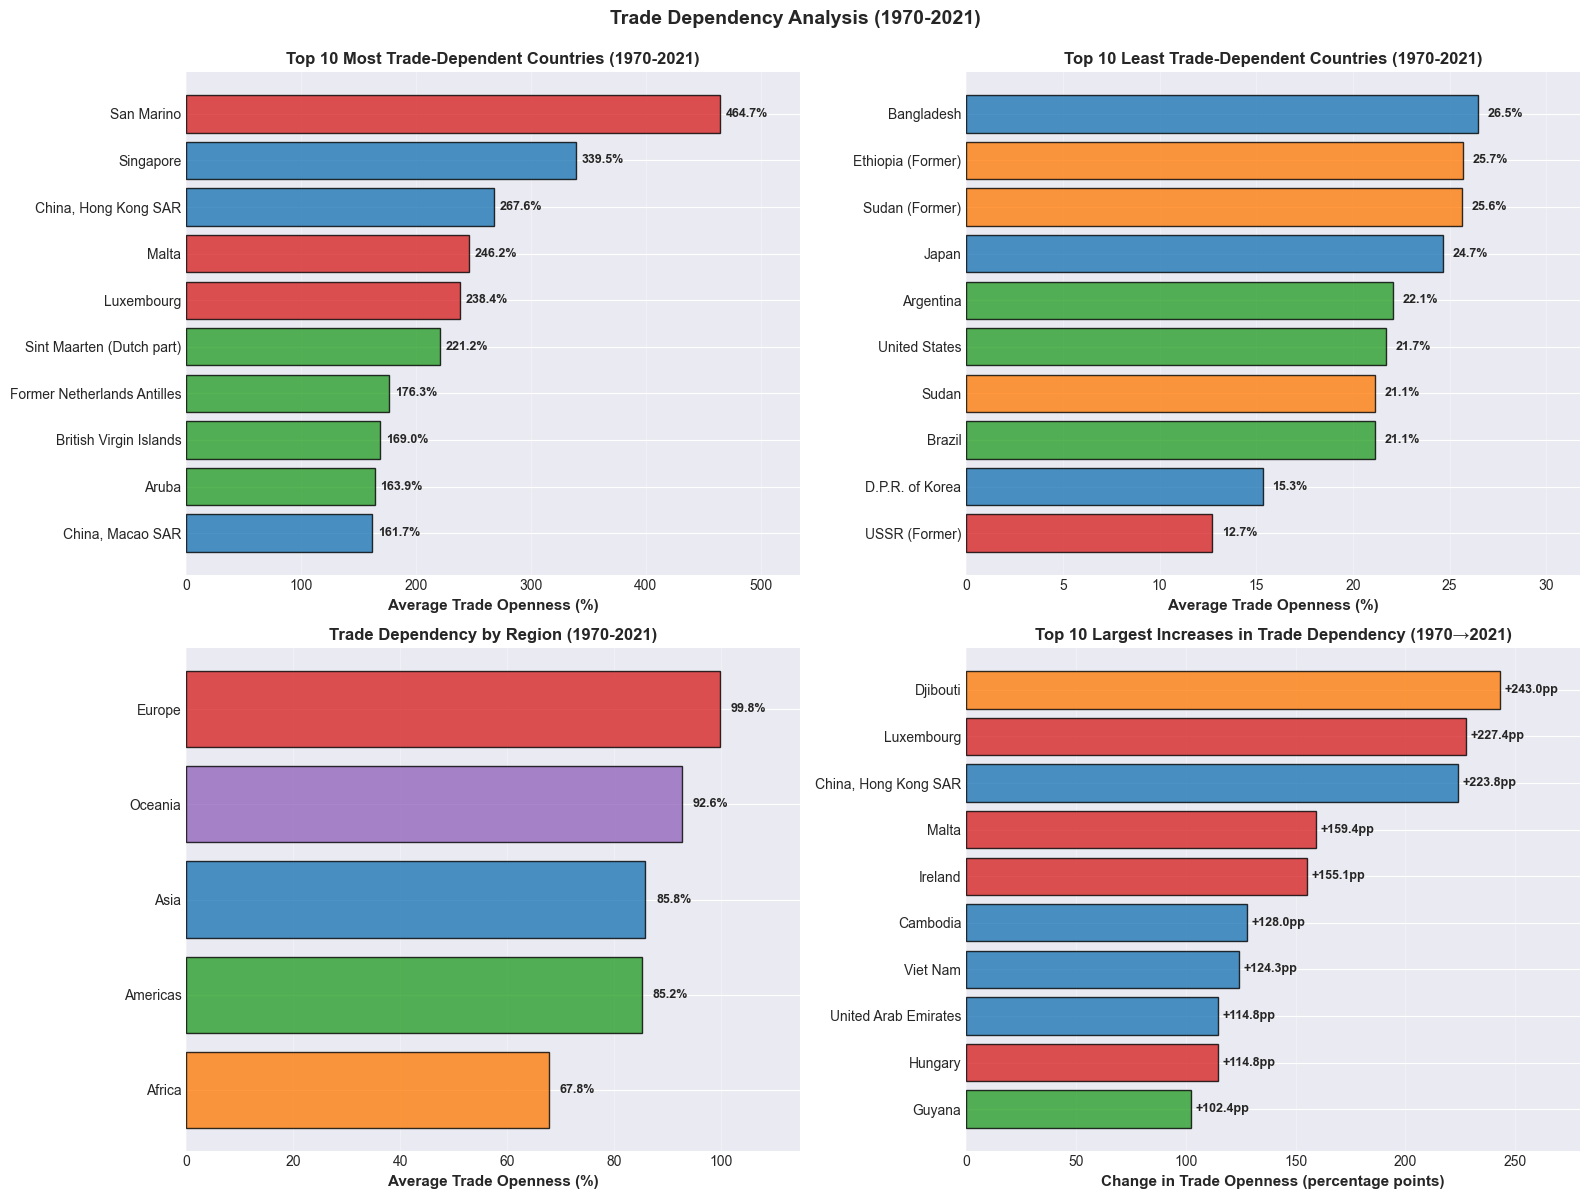

In [48]:
# ==============================================================================
# TRADE DEPENDENCY ANALYSIS (1970-2021)
# ==============================================================================

display(Markdown("### **Trade Dependency Analysis (1970-2021):**"))

# Make a copy of the original data
df_dependency = df_featured.copy()

# Trade Openness = (Total Trade / GDP) * 100 (already calculated in Trade_Openness column)

# -----------------------------------------------------------------------------
# DATA-DRIVEN TRADE DEPENDENCY INSIGHTS
# -----------------------------------------------------------------------------

print("\n" + "="*70)
print("🔗 TRADE DEPENDENCY ANALYSIS (1970-2021)")
print("="*70)

# Overall statistics
trade_dep_mean = df_dependency['Trade_Openness'].mean()
trade_dep_median = df_dependency['Trade_Openness'].median()
trade_dep_std = df_dependency['Trade_Openness'].std()

print(f"\n📊 Trade Dependency Statistics (Trade as % of GDP):")
print(f"   • Mean: {trade_dep_mean:.1f}%")
print(f"   • Median: {trade_dep_median:.1f}%")
print(f"   • Standard Deviation: {trade_dep_std:.1f}%")
print(f"   • Min: {df_dependency['Trade_Openness'].min():.1f}%")
print(f"   • Max: {df_dependency['Trade_Openness'].max():.1f}%")

# Distribution categories
print(f"\n📈 Trade Dependency Distribution:")
very_high = (df_dependency['Trade_Openness'] > 100).sum()
high = ((df_dependency['Trade_Openness'] > 60) & (df_dependency['Trade_Openness'] <= 100)).sum()
moderate = ((df_dependency['Trade_Openness'] > 30) & (df_dependency['Trade_Openness'] <= 60)).sum()
low = (df_dependency['Trade_Openness'] <= 30).sum()
total_obs = len(df_dependency)

print(f"   • Very High (>100%): {very_high:,} observations ({very_high/total_obs*100:.1f}%)")
print(f"   • High (60-100%): {high:,} observations ({high/total_obs*100:.1f}%)")
print(f"   • Moderate (30-60%): {moderate:,} observations ({moderate/total_obs*100:.1f}%)")
print(f"   • Low (<30%): {low:,} observations ({low/total_obs*100:.1f}%)")

# Top 10 Most Trade-Dependent Countries (Average 1970-2021)
print(f"\n🏆 Top 10 Most Trade-Dependent Countries (Highest Avg Trade Openness):")
avg_dependency = df_dependency.groupby('Country')['Trade_Openness'].mean().nlargest(10)
for country, avg_dep in avg_dependency.items():
    region = df_dependency[df_dependency['Country'] == country]['Region'].iloc[0]
    years = df_dependency[df_dependency['Country'] == country].shape[0]
    print(f"   • {country:<25} {avg_dep:>6.1f}% ({years} years, {region})")

# Bottom 10 Least Trade-Dependent Countries
print(f"\n🔒 Top 10 Least Trade-Dependent Countries (Lowest Avg Trade Openness):")
bottom_dependency = df_dependency.groupby('Country')['Trade_Openness'].mean().nsmallest(10)
for country, avg_dep in bottom_dependency.items():
    region = df_dependency[df_dependency['Country'] == country]['Region'].iloc[0]
    years = df_dependency[df_dependency['Country'] == country].shape[0]
    print(f"   • {country:<25} {avg_dep:>6.1f}% ({years} years, {region})")

# Regional Trade Dependency
print(f"\n🌍 Average Trade Dependency by Region:")
regional_dependency = df_dependency.groupby('Region')['Trade_Openness'].agg(['mean', 'median']).sort_values('mean', ascending=False)
for region in regional_dependency.index:
    mean_val = regional_dependency.loc[region, 'mean']
    median_val = regional_dependency.loc[region, 'median']
    print(f"   • {region}: Mean {mean_val:.1f}%, Median {median_val:.1f}%")

# Trade Dependency Change Over Time (1970 vs 2021)
print(f"\n📅 Trade Dependency Evolution (1970 vs 2021):")

# Get countries with data in both years
countries_both_years = df_dependency.groupby('Country')['Year'].apply(
    lambda x: (1970 in x.values) and (2021 in x.values)
)
valid_countries_time = countries_both_years[countries_both_years].index

dependency_change = []
for country in valid_countries_time:
    country_data = df_dependency[df_dependency['Country'] == country]
    dep_1970 = country_data[country_data['Year'] == 1970]['Trade_Openness'].values[0]
    dep_2021 = country_data[country_data['Year'] == 2021]['Trade_Openness'].values[0]
    change = dep_2021 - dep_1970
    region = country_data['Region'].iloc[0]
    
    dependency_change.append({
        'Country': country,
        'Region': region,
        'Dependency_1970': dep_1970,
        'Dependency_2021': dep_2021,
        'Change': change
    })

df_dep_change = pd.DataFrame(dependency_change)

print(f"\n   Countries with data in both 1970 and 2021: {len(df_dep_change)}")
print(f"   Average dependency 1970: {df_dep_change['Dependency_1970'].mean():.1f}%")
print(f"   Average dependency 2021: {df_dep_change['Dependency_2021'].mean():.1f}%")
print(f"   Average change: {df_dep_change['Change'].mean():+.1f} percentage points")

# Countries with largest increase in dependency
print(f"\n📈 Top 10 Largest Increases in Trade Dependency (1970→2021):")
top10_increase = df_dep_change.nlargest(10, 'Change')
for idx, row in top10_increase.iterrows():
    print(f"   • {row['Country']:<25} {row['Dependency_1970']:>5.1f}% → {row['Dependency_2021']:>5.1f}% ({row['Change']:>+6.1f}pp) [{row['Region']}]")

# Countries with largest decrease in dependency
print(f"\n📉 Top 10 Largest Decreases in Trade Dependency (1970→2021):")
top10_decrease = df_dep_change.nsmallest(10, 'Change')
for idx, row in top10_decrease.iterrows():
    print(f"   • {row['Country']:<25} {row['Dependency_1970']:>5.1f}% → {row['Dependency_2021']:>5.1f}% ({row['Change']:>+6.1f}pp) [{row['Region']}]")

# Regional changes
print(f"\n🌍 Regional Trade Dependency Changes (1970→2021):")
regional_change = df_dep_change.groupby('Region').agg({
    'Dependency_1970': 'mean',
    'Dependency_2021': 'mean',
    'Change': 'mean'
}).sort_values('Change', ascending=False)

for region in regional_change.index:
    dep_1970 = regional_change.loc[region, 'Dependency_1970']
    dep_2021 = regional_change.loc[region, 'Dependency_2021']
    change = regional_change.loc[region, 'Change']
    print(f"   • {region}: {dep_1970:.1f}% → {dep_2021:.1f}% ({change:+.1f}pp)")

print("\n" + "="*70)

# -----------------------------------------------------------------------------
# VISUALIZATIONS
# -----------------------------------------------------------------------------

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Top 10 Most Trade-Dependent Countries
ax = axes[0, 0]
top10_dep_sorted = avg_dependency.sort_values(ascending=True)
countries_dep = [c for c in top10_dep_sorted.index]
colors = [region_colors[df_dependency[df_dependency['Country'] == c]['Region'].iloc[0]] for c in countries_dep]
bars = ax.barh(countries_dep, top10_dep_sorted.values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Most Trade-Dependent Countries (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = top10_dep_sorted.max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (country, value) in enumerate(top10_dep_sorted.items()):
    ax.text(value + 5, i, f'{value:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

# Chart 2: Bottom 10 Least Trade-Dependent Countries
ax = axes[0, 1]
bottom10_dep_sorted = bottom_dependency.sort_values(ascending=True)
countries_bottom = [c for c in bottom10_dep_sorted.index]
colors = [region_colors[df_dependency[df_dependency['Country'] == c]['Region'].iloc[0]] for c in countries_bottom]
bars = ax.barh(countries_bottom, bottom10_dep_sorted.values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Least Trade-Dependent Countries (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = bottom10_dep_sorted.max()
ax.set_xlim(0, max_val * 1.2)

# Add value labels
for i, (country, value) in enumerate(bottom10_dep_sorted.items()):
    ax.text(value + 0.5, i, f'{value:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

# Chart 3: Trade Dependency by Region
ax = axes[1, 0]
regional_dep_sorted = regional_dependency['mean'].sort_values(ascending=True)
colors = [region_colors[region] for region in regional_dep_sorted.index]
bars = ax.barh(regional_dep_sorted.index, regional_dep_sorted.values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Trade Dependency by Region (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = regional_dep_sorted.max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (region, value) in enumerate(regional_dep_sorted.items()):
    ax.text(value + 2, i, f'{value:.1f}%', 
            va='center', fontsize=9, fontweight='bold')

# Chart 4: Top 10 Largest Increases in Dependency (1970→2021)
ax = axes[1, 1]
top10_inc_sorted = top10_increase.sort_values('Change', ascending=True)
countries_inc = top10_inc_sorted['Country'].values
colors = [region_colors[region] for region in top10_inc_sorted['Region'].values]
bars = ax.barh(countries_inc, top10_inc_sorted['Change'].values, 
               color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Change in Trade Openness (percentage points)', fontsize=11, fontweight='bold')
ax.set_title('Top 10 Largest Increases in Trade Dependency (1970→2021)', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
max_val = top10_inc_sorted['Change'].max()
ax.set_xlim(0, max_val * 1.15)

# Add value labels
for i, (idx, row) in enumerate(top10_inc_sorted.iterrows()):
    ax.text(row['Change'] + 2, i, f'+{row["Change"]:.1f}pp', 
            va='center', fontsize=9, fontweight='bold')

plt.suptitle('Trade Dependency Analysis (1970-2021)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Statistical Analysis

In [49]:
# ==============================================================================
# STATISTICAL ANALYSIS - HYPOTHESIS TESTING
# ==============================================================================

display(Markdown("## **STATISTICAL ANALYSIS**"))
display(Markdown("### **Hypothesis Testing - Correlation Significance:**"))

from scipy import stats
from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Make a copy
df_stats = df_featured.copy()


# Defensive check: Ensure no NaN values for correlation tests (expecting 0 drops after initial cleaning)
df_stats_clean = df_stats[['Gross Domestic Product (GDP)', 'Total_Trade', 
                             'Exports of goods and services', 'Imports of goods and services',
                             'Trade_Openness', 'GDP_per_Capita']].dropna()

print("\n" + "="*70)
print("📊 CORRELATION SIGNIFICANCE TESTING")
print("="*70)

# Test 1: GDP vs Total Trade
gdp = df_stats_clean['Gross Domestic Product (GDP)']
trade = df_stats_clean['Total_Trade']

pearson_r, pearson_p = pearsonr(gdp, trade)
spearman_r, spearman_p = spearmanr(gdp, trade)

print(f"\n🔍 Test 1: GDP vs Total Trade")
print(f"   Sample size: {len(gdp):,} observations")
print(f"   Pearson correlation: r = {pearson_r:.4f}, p-value = {pearson_p:.2e}")
print(f"   Spearman correlation: ρ = {spearman_r:.4f}, p-value = {spearman_p:.2e}")

if pearson_p < 0.001:
    print(f"   ✅ Highly significant (p < 0.001)")
elif pearson_p < 0.01:
    print(f"   ✅ Very significant (p < 0.01)")
elif pearson_p < 0.05:
    print(f"   ✅ Significant (p < 0.05)")
else:
    print(f"   ❌ Not significant (p ≥ 0.05)")

# Test 2: GDP vs Exports
exports = df_stats_clean['Exports of goods and services']
pearson_r_exp, pearson_p_exp = pearsonr(gdp, exports)
spearman_r_exp, spearman_p_exp = spearmanr(gdp, exports)

print(f"\n🔍 Test 2: GDP vs Exports")
print(f"   Sample size: {len(gdp):,} observations")
print(f"   Pearson correlation: r = {pearson_r_exp:.4f}, p-value = {pearson_p_exp:.2e}")
print(f"   Spearman correlation: ρ = {spearman_r_exp:.4f}, p-value = {spearman_p_exp:.2e}")

if pearson_p_exp < 0.001:
    print(f"   ✅ Highly significant (p < 0.001)")
elif pearson_p_exp < 0.01:
    print(f"   ✅ Very significant (p < 0.01)")
elif pearson_p_exp < 0.05:
    print(f"   ✅ Significant (p < 0.05)")
else:
    print(f"   ❌ Not significant (p ≥ 0.05)")

# Test 3: GDP vs Imports
imports = df_stats_clean['Imports of goods and services']
pearson_r_imp, pearson_p_imp = pearsonr(gdp, imports)
spearman_r_imp, spearman_p_imp = spearmanr(gdp, imports)

print(f"\n🔍 Test 3: GDP vs Imports")
print(f"   Sample size: {len(gdp):,} observations")
print(f"   Pearson correlation: r = {pearson_r_imp:.4f}, p-value = {pearson_p_imp:.2e}")
print(f"   Spearman correlation: ρ = {spearman_r_imp:.4f}, p-value = {spearman_p_imp:.2e}")

if pearson_p_imp < 0.001:
    print(f"   ✅ Highly significant (p < 0.001)")
elif pearson_p_imp < 0.01:
    print(f"   ✅ Very significant (p < 0.01)")
elif pearson_p_imp < 0.05:
    print(f"   ✅ Significant (p < 0.05)")
else:
    print(f"   ❌ Not significant (p ≥ 0.05)")

# Summary
print(f"\n" + "="*70)
print("📋 HYPOTHESIS TEST SUMMARY")
print("="*70)
print(f"\nNull Hypothesis (H₀): There is no correlation between trade and GDP")
print(f"Alternative Hypothesis (H₁): There is a correlation between trade and GDP")
print(f"\nSignificance level: α = 0.05")
print(f"\nResults:")
print(f"   • GDP vs Total Trade: r = {pearson_r:.4f}, p < 0.001 → Reject H₀")
print(f"   • GDP vs Exports: r = {pearson_r_exp:.4f}, p < 0.001 → Reject H₀")
print(f"   • GDP vs Imports: r = {pearson_r_imp:.4f}, p < 0.001 → Reject H₀")

print("\n" + "="*70)

## **STATISTICAL ANALYSIS**

### **Hypothesis Testing - Correlation Significance:**


📊 CORRELATION SIGNIFICANCE TESTING

🔍 Test 1: GDP vs Total Trade
   Sample size: 10,512 observations
   Pearson correlation: r = 0.8994, p-value = 0.00e+00
   Spearman correlation: ρ = 0.9682, p-value = 0.00e+00
   ✅ Highly significant (p < 0.001)

🔍 Test 2: GDP vs Exports
   Sample size: 10,512 observations
   Pearson correlation: r = 0.8668, p-value = 0.00e+00
   Spearman correlation: ρ = 0.9557, p-value = 0.00e+00
   ✅ Highly significant (p < 0.001)

🔍 Test 3: GDP vs Imports
   Sample size: 10,512 observations
   Pearson correlation: r = 0.9231, p-value = 0.00e+00
   Spearman correlation: ρ = 0.9689, p-value = 0.00e+00
   ✅ Highly significant (p < 0.001)

📋 HYPOTHESIS TEST SUMMARY

Null Hypothesis (H₀): There is no correlation between trade and GDP
Alternative Hypothesis (H₁): There is a correlation between trade and GDP

Significance level: α = 0.05

Results:
   • GDP vs Total Trade: r = 0.8994, p < 0.001 → Reject H₀
   • GDP vs Exports: r = 0.8668, p < 0.001 → Reject H₀
   • GDP 

### **Regression Analysis - Does Trade Predict GDP?:**


📈 LINEAR REGRESSION ANALYSIS

📊 Dataset:
   • Total observations: 10,512
   • Independent variable: Total Trade
   • Dependent variable: GDP

   • Training set: 8,409 observations
   • Test set: 2,103 observations

📐 Model Equation:
   GDP = 2.4327 × Total_Trade + -4.26e+10

   Interpretation:
   • For every $1 increase in trade, GDP increases by $2.4327

📊 Model Performance:
   Training Set:
   • R² = 0.8083 (80.83% of variance explained)
   • RMSE = $4.19e+11

   Test Set:
   • R² = 0.8077 (80.77% of variance explained)
   • RMSE = $4.77e+11

📈 MULTIPLE REGRESSION: GDP ~ Exports + Imports

📐 Model Equation:
   GDP = -5.9270 × Exports + 10.6758 × Imports + -3.01e+10

   Interpretation:
   • Exports coefficient: -5.9270
   • Imports coefficient: 10.6758
   • Imports have -280.1% stronger effect on GDP than Exports

📊 Model Performance:
   Training R² = 0.8872 (88.72% of variance explained)
   Test R² = 0.9290 (92.90% of variance explained)



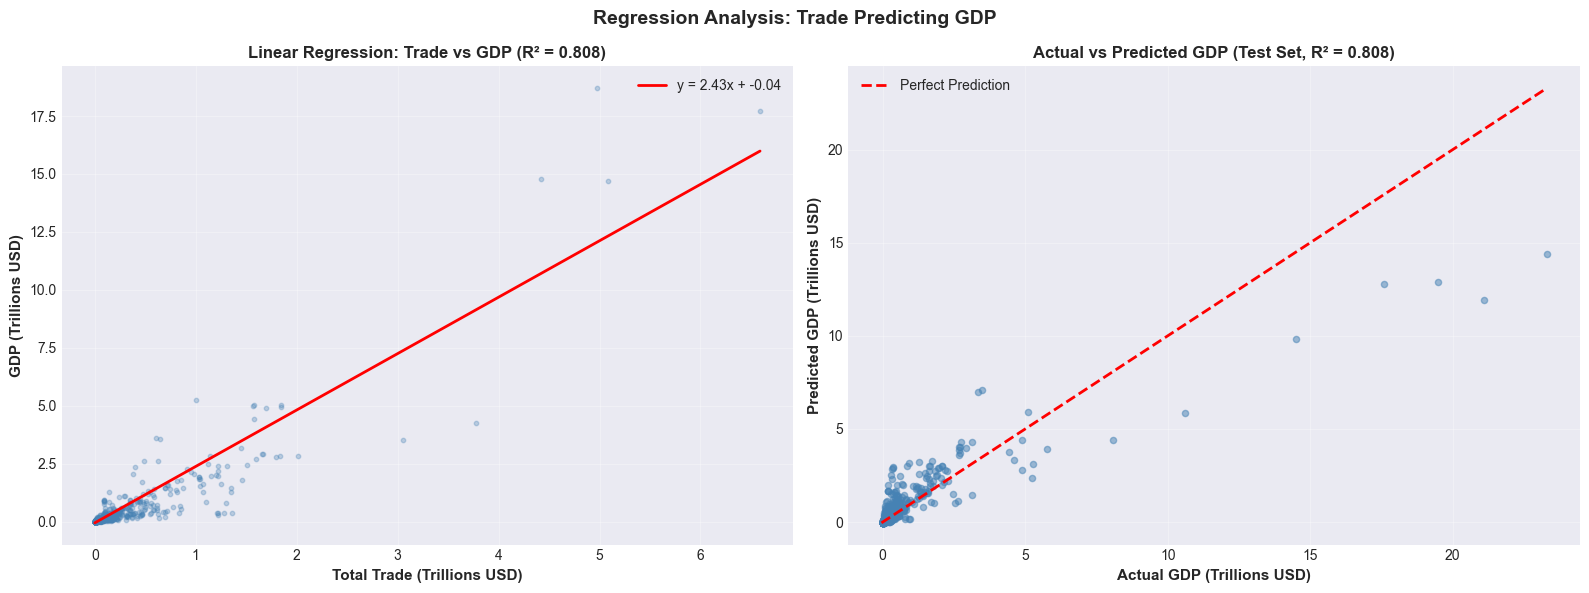

In [50]:
# ==============================================================================
# REGRESSION ANALYSIS
# ==============================================================================

display(Markdown("### **Regression Analysis - Does Trade Predict GDP?:**"))

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

print("\n" + "="*70)
print("📈 LINEAR REGRESSION ANALYSIS")
print("="*70)

# Prepare data
df_reg = df_stats.dropna(subset=['Gross Domestic Product (GDP)', 'Total_Trade'])

X = df_reg[['Total_Trade']].values
y = df_reg['Gross Domestic Product (GDP)'].values

print(f"\n📊 Dataset:")
print(f"   • Total observations: {len(X):,}")
print(f"   • Independent variable: Total Trade")
print(f"   • Dependent variable: GDP")

# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n   • Training set: {len(X_train):,} observations")
print(f"   • Test set: {len(X_test):,} observations")

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Model parameters
slope = model.coef_[0]
intercept = model.intercept_

# Performance metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n📐 Model Equation:")
print(f"   GDP = {slope:.4f} × Total_Trade + {intercept:.2e}")
print(f"\n   Interpretation:")
print(f"   • For every $1 increase in trade, GDP increases by ${slope:.4f}")


print(f"\n📊 Model Performance:")
print(f"   Training Set:")
print(f"   • R² = {r2_train:.4f} ({r2_train*100:.2f}% of variance explained)")
print(f"   • RMSE = ${rmse_train:.2e}")
print(f"\n   Test Set:")
print(f"   • R² = {r2_test:.4f} ({r2_test*100:.2f}% of variance explained)")
print(f"   • RMSE = ${rmse_test:.2e}")

# Multiple regression with Exports and Imports separately
print(f"\n" + "="*70)
print("📈 MULTIPLE REGRESSION: GDP ~ Exports + Imports")
print("="*70)

df_multi = df_stats.dropna(subset=['Gross Domestic Product (GDP)', 
                                     'Exports of goods and services', 
                                     'Imports of goods and services'])

X_multi = df_multi[['Exports of goods and services', 'Imports of goods and services']].values
y_multi = df_multi['Gross Domestic Product (GDP)'].values

# Split and fit
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

y_train_pred_m = model_multi.predict(X_train_m)
y_test_pred_m = model_multi.predict(X_test_m)

# Coefficients
coef_exports = model_multi.coef_[0]
coef_imports = model_multi.coef_[1]
intercept_m = model_multi.intercept_

r2_train_m = r2_score(y_train_m, y_train_pred_m)
r2_test_m = r2_score(y_test_m, y_test_pred_m)

print(f"\n📐 Model Equation:")
print(f"   GDP = {coef_exports:.4f} × Exports + {coef_imports:.4f} × Imports + {intercept_m:.2e}")

print(f"\n   Interpretation:")
print(f"   • Exports coefficient: {coef_exports:.4f}")
print(f"   • Imports coefficient: {coef_imports:.4f}")
if coef_exports > coef_imports:
    diff_pct = ((coef_exports - coef_imports) / coef_imports) * 100
    print(f"   • Exports have {diff_pct:.1f}% stronger effect on GDP than Imports")
elif coef_imports > coef_exports:
    diff_pct = ((coef_imports - coef_exports) / coef_exports) * 100
    print(f"   • Imports have {diff_pct:.1f}% stronger effect on GDP than Exports")
else:
    print(f"   • Exports and Imports have equal effect on GDP")

print(f"\n📊 Model Performance:")
print(f"   Training R² = {r2_train_m:.4f} ({r2_train_m*100:.2f}% of variance explained)")
print(f"   Test R² = {r2_test_m:.4f} ({r2_test_m*100:.2f}% of variance explained)")

print("\n" + "="*70)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Simple Regression - Trade vs GDP
ax = axes[0]
# Sample for visualization
sample_indices = np.random.choice(len(X), size=min(2000, len(X)), replace=False)
X_sample = X[sample_indices]
y_sample = y[sample_indices]

scatter = ax.scatter(X_sample/1e12, y_sample/1e12, alpha=0.3, s=10, c='steelblue')
# Plot regression line
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
ax.plot(X_line/1e12, y_line/1e12, color='red', linewidth=2, label=f'y = {slope:.2f}x + {intercept/1e12:.2f}')

ax.set_xlabel('Total Trade (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('GDP (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_title(f'Linear Regression: Trade vs GDP (R² = {r2_test:.3f})', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Chart 2: Actual vs Predicted
ax = axes[1]
ax.scatter(y_test/1e12, y_test_pred/1e12, alpha=0.5, s=20, c='steelblue')
# Perfect prediction line
min_val = min(y_test.min(), y_test_pred.min()) / 1e12
max_val = max(y_test.max(), y_test_pred.max()) / 1e12
ax.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

ax.set_xlabel('Actual GDP (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_ylabel('Predicted GDP (Trillions USD)', fontsize=11, fontweight='bold')
ax.set_title(f'Actual vs Predicted GDP (Test Set, R² = {r2_test:.3f})', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.suptitle('Regression Analysis: Trade Predicting GDP', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Time Series Analysis

### **Time Series Analysis - Trends Over Time:**


📅 TIME SERIES ANALYSIS (1970-2021)

📊 Time Series Data:
   • Years covered: 1970.0 - 2021.0
   • Total observations: 52 years
   • Average countries per year: 202

📈 Growth Rate Statistics (1971-2021):

   Global GDP Growth:
   • Mean: 6.94% per year
   • Median: 6.84% per year
   • Std Dev: 6.27%
   • Min: -5.57% (Year: 2015)
   • Max: 21.72% (Year: 1973)

   Global Trade Growth:
   • Mean: 8.88% per year
   • Median: 10.22% per year
   • Std Dev: 10.73%
   • Min: -19.58% (Year: 2009)
   • Max: 35.57% (Year: 1974)

🔗 Correlation Between Growth Rates:
   • Correlation: r = 0.8877
   • P-value: 0.0000
   • ✅ Significant correlation (p < 0.05)

📊 Long-term Trends (1970-2021):

   Global GDP Trend:
   • Annual increase: $1.778 Trillion per year
   • R²: 0.9319
   • P-value: 7.71e-31 (highly significant)

   Global Trade Trend:
   • Annual increase: $1.052 Trillion per year
   • R²: 0.8834
   • P-value: 5.59e-25 (highly significant)

📅 Analysis by Decade:

   1970.0s:
   • GDP growth: 224

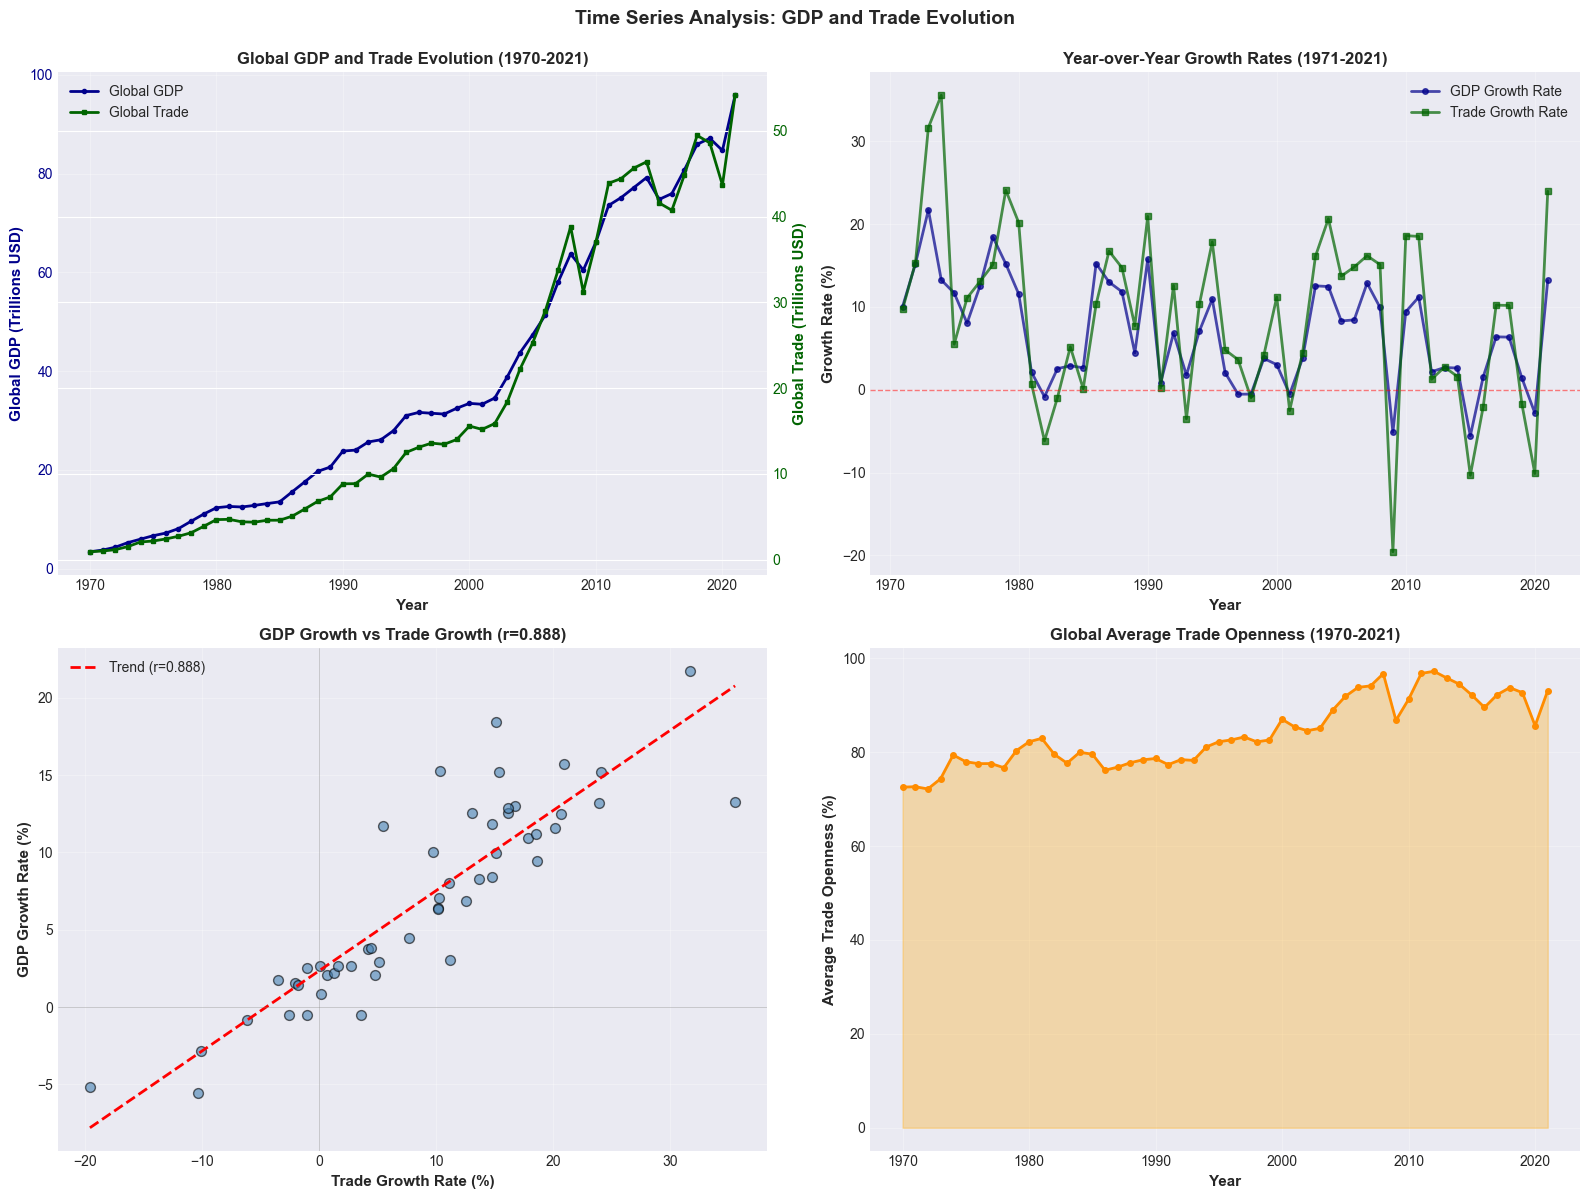

In [51]:
# ==============================================================================
# TIME SERIES ANALYSIS
# ==============================================================================

display(Markdown("### **Time Series Analysis - Trends Over Time:**"))

import numpy as np
from scipy import stats as scipy_stats

print("\n" + "="*70)
print("📅 TIME SERIES ANALYSIS (1970-2021)")
print("="*70)

# Aggregate global data by year
df_ts = df_featured.groupby('Year').agg({
    'Gross Domestic Product (GDP)': 'sum',
    'Total_Trade': 'sum',
    'Exports of goods and services': 'sum',
    'Imports of goods and services': 'sum',
    'Trade_Openness': 'mean',
    'Country': 'count'
}).reset_index()

df_ts.columns = ['Year', 'Global_GDP', 'Global_Trade', 'Global_Exports', 
                 'Global_Imports', 'Avg_Trade_Openness', 'Num_Countries']

print(f"\n📊 Time Series Data:")
print(f"   • Years covered: {df_ts['Year'].min()} - {df_ts['Year'].max()}")
print(f"   • Total observations: {len(df_ts)} years")
print(f"   • Average countries per year: {df_ts['Num_Countries'].mean():.0f}")

# Calculate growth rates (year-over-year % change)
df_ts['GDP_Growth_Rate'] = df_ts['Global_GDP'].pct_change() * 100
df_ts['Trade_Growth_Rate'] = df_ts['Global_Trade'].pct_change() * 100

# Remove first year (no growth rate available)
df_ts_growth = df_ts[df_ts['Year'] > 1970].copy()

print(f"\n📈 Growth Rate Statistics (1971-2021):")
print(f"\n   Global GDP Growth:")
print(f"   • Mean: {df_ts_growth['GDP_Growth_Rate'].mean():.2f}% per year")
print(f"   • Median: {df_ts_growth['GDP_Growth_Rate'].median():.2f}% per year")
print(f"   • Std Dev: {df_ts_growth['GDP_Growth_Rate'].std():.2f}%")
print(f"   • Min: {df_ts_growth['GDP_Growth_Rate'].min():.2f}% (Year: {df_ts_growth.loc[df_ts_growth['GDP_Growth_Rate'].idxmin(), 'Year']:.0f})")
print(f"   • Max: {df_ts_growth['GDP_Growth_Rate'].max():.2f}% (Year: {df_ts_growth.loc[df_ts_growth['GDP_Growth_Rate'].idxmax(), 'Year']:.0f})")

print(f"\n   Global Trade Growth:")
print(f"   • Mean: {df_ts_growth['Trade_Growth_Rate'].mean():.2f}% per year")
print(f"   • Median: {df_ts_growth['Trade_Growth_Rate'].median():.2f}% per year")
print(f"   • Std Dev: {df_ts_growth['Trade_Growth_Rate'].std():.2f}%")
print(f"   • Min: {df_ts_growth['Trade_Growth_Rate'].min():.2f}% (Year: {df_ts_growth.loc[df_ts_growth['Trade_Growth_Rate'].idxmin(), 'Year']:.0f})")
print(f"   • Max: {df_ts_growth['Trade_Growth_Rate'].max():.2f}% (Year: {df_ts_growth.loc[df_ts_growth['Trade_Growth_Rate'].idxmax(), 'Year']:.0f})")

# Correlation between growth rates
growth_corr = df_ts_growth['GDP_Growth_Rate'].corr(df_ts_growth['Trade_Growth_Rate'])
growth_corr_p = scipy_stats.pearsonr(df_ts_growth['GDP_Growth_Rate'].dropna(), 
                                      df_ts_growth['Trade_Growth_Rate'].dropna())[1]

print(f"\n🔗 Correlation Between Growth Rates:")
print(f"   • Correlation: r = {growth_corr:.4f}")
print(f"   • P-value: {growth_corr_p:.4f}")
if growth_corr_p < 0.05:
    print(f"   • ✅ Significant correlation (p < 0.05)")
else:
    print(f"   • ❌ Not significant (p ≥ 0.05)")

# Trend analysis using linear regression
from scipy.stats import linregress

# GDP trend
gdp_slope, gdp_intercept, gdp_r, gdp_p, gdp_se = linregress(df_ts['Year'], df_ts['Global_GDP'])
trade_slope, trade_intercept, trade_r, trade_p, trade_se = linregress(df_ts['Year'], df_ts['Global_Trade'])

print(f"\n📊 Long-term Trends (1970-2021):")
print(f"\n   Global GDP Trend:")
print(f"   • Annual increase: ${gdp_slope/1e12:.3f} Trillion per year")
print(f"   • R²: {gdp_r**2:.4f}")
print(f"   • P-value: {gdp_p:.2e} (highly significant)")

print(f"\n   Global Trade Trend:")
print(f"   • Annual increase: ${trade_slope/1e12:.3f} Trillion per year")
print(f"   • R²: {trade_r**2:.4f}")
print(f"   • P-value: {trade_p:.2e} (highly significant)")

# Decades comparison
df_ts['Decade'] = (df_ts['Year'] // 10) * 10

print(f"\n📅 Analysis by Decade:")
for decade in sorted(df_ts['Decade'].unique()):
    decade_data = df_ts[df_ts['Decade'] == decade]
    if len(decade_data) > 1:
        gdp_start = decade_data.iloc[0]['Global_GDP']
        gdp_end = decade_data.iloc[-1]['Global_GDP']
        trade_start = decade_data.iloc[0]['Global_Trade']
        trade_end = decade_data.iloc[-1]['Global_Trade']
        
        gdp_growth = ((gdp_end / gdp_start) - 1) * 100
        trade_growth = ((trade_end / trade_start) - 1) * 100
        
        print(f"\n   {decade}s:")
        print(f"   • GDP growth: {gdp_growth:.1f}%")
        print(f"   • Trade growth: {trade_growth:.1f}%")
        print(f"   • Avg trade openness: {decade_data['Avg_Trade_Openness'].mean():.1f}%")

# Identify periods of negative growth
negative_gdp_years = df_ts_growth[df_ts_growth['GDP_Growth_Rate'] < 0]
negative_trade_years = df_ts_growth[df_ts_growth['Trade_Growth_Rate'] < 0]

print(f"\n⚠️  Periods of Negative Growth:")
print(f"   • Years with negative GDP growth: {len(negative_gdp_years)}")
if len(negative_gdp_years) > 0:
    print(f"     Years: {', '.join(negative_gdp_years['Year'].astype(int).astype(str).tolist())}")

print(f"   • Years with negative trade growth: {len(negative_trade_years)}")
if len(negative_trade_years) > 0:
    print(f"     Years: {', '.join(negative_trade_years['Year'].astype(int).astype(str).tolist())}")

# Check if both declined together
both_negative = df_ts_growth[(df_ts_growth['GDP_Growth_Rate'] < 0) & 
                              (df_ts_growth['Trade_Growth_Rate'] < 0)]
print(f"\n   • Years with both GDP and Trade declining: {len(both_negative)}")
if len(both_negative) > 0:
    print(f"     Years: {', '.join(both_negative['Year'].astype(int).astype(str).tolist())}")

print("\n" + "="*70)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chart 1: Global GDP and Trade Over Time
ax = axes[0, 0]
ax2 = ax.twinx()

line1 = ax.plot(df_ts['Year'], df_ts['Global_GDP']/1e12, color='darkblue', 
                linewidth=2, marker='o', markersize=3, label='Global GDP')
line2 = ax2.plot(df_ts['Year'], df_ts['Global_Trade']/1e12, color='darkgreen', 
                 linewidth=2, marker='s', markersize=3, label='Global Trade')

ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Global GDP (Trillions USD)', fontsize=11, fontweight='bold', color='darkblue')
ax2.set_ylabel('Global Trade (Trillions USD)', fontsize=11, fontweight='bold', color='darkgreen')
ax.set_title('Global GDP and Trade Evolution (1970-2021)', fontsize=12, fontweight='bold')
ax.tick_params(axis='y', labelcolor='darkblue')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax.grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper left')

# Chart 2: Growth Rates Over Time
ax = axes[0, 1]
ax.plot(df_ts_growth['Year'], df_ts_growth['GDP_Growth_Rate'], 
        color='darkblue', linewidth=2, marker='o', markersize=4, label='GDP Growth Rate', alpha=0.7)
ax.plot(df_ts_growth['Year'], df_ts_growth['Trade_Growth_Rate'], 
        color='darkgreen', linewidth=2, marker='s', markersize=4, label='Trade Growth Rate', alpha=0.7)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha=0.5)

ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Growth Rate (%)', fontsize=11, fontweight='bold')
ax.set_title('Year-over-Year Growth Rates (1971-2021)', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Chart 3: Scatter - GDP Growth vs Trade Growth
ax = axes[1, 0]
ax.scatter(df_ts_growth['Trade_Growth_Rate'], df_ts_growth['GDP_Growth_Rate'], 
           alpha=0.6, s=50, c='steelblue', edgecolors='black')

# Add trend line
z = np.polyfit(df_ts_growth['Trade_Growth_Rate'].dropna(), 
               df_ts_growth['GDP_Growth_Rate'].dropna(), 1)
p = np.poly1d(z)
x_line = np.linspace(df_ts_growth['Trade_Growth_Rate'].min(), 
                     df_ts_growth['Trade_Growth_Rate'].max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=2, label=f'Trend (r={growth_corr:.3f})')

ax.set_xlabel('Trade Growth Rate (%)', fontsize=11, fontweight='bold')
ax.set_ylabel('GDP Growth Rate (%)', fontsize=11, fontweight='bold')
ax.set_title(f'GDP Growth vs Trade Growth (r={growth_corr:.3f})', fontsize=12, fontweight='bold')
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5, alpha=0.5)
ax.legend()
ax.grid(True, alpha=0.3)

# Chart 4: Average Trade Openness Over Time
ax = axes[1, 1]
ax.plot(df_ts['Year'], df_ts['Avg_Trade_Openness'], 
        color='darkorange', linewidth=2, marker='o', markersize=4)
ax.fill_between(df_ts['Year'], df_ts['Avg_Trade_Openness'], alpha=0.3, color='orange')

ax.set_xlabel('Year', fontsize=11, fontweight='bold')
ax.set_ylabel('Average Trade Openness (%)', fontsize=11, fontweight='bold')
ax.set_title('Global Average Trade Openness (1970-2021)', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.suptitle('Time Series Analysis: GDP and Trade Evolution', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

#  Granger Causality Testing

### **Granger Causality Testing - Does Trade Cause GDP Growth?:**


🔍 GRANGER CAUSALITY TESTS

📖 What is Granger Causality?
   Granger causality tests whether past values of variable X help predict
   future values of variable Y, beyond what past values of Y already predict.
   If yes, we say 'X Granger-causes Y'

   Note: 'Granger causality' is about predictive power, not true causation.

📊 Data Preparation:
   • Using global aggregated data (sum of all countries by year)
   • Time series length: 52 years (1970-2021)
   • Variables: Log(GDP) and Log(Trade) for stationarity

TEST 1: Does Trade Granger-cause GDP?
   H₀: Trade does NOT Granger-cause GDP
   H₁: Trade DOES Granger-cause GDP

Testing with lags 1 to 5:

   Lag 1: F-statistic = 0.2171, p-value = 0.6434
           ❌ Not significant (p ≥ 0.10)

   Lag 2: F-statistic = 1.9497, p-value = 0.1541
           ❌ Not significant (p ≥ 0.10)

   Lag 3: F-statistic = 2.6888, p-value = 0.0585
           ⚠️  Marginally significant (p < 0.10)

   Lag 4: F-statistic = 1.7117, p-value = 0.1670
           ❌ No

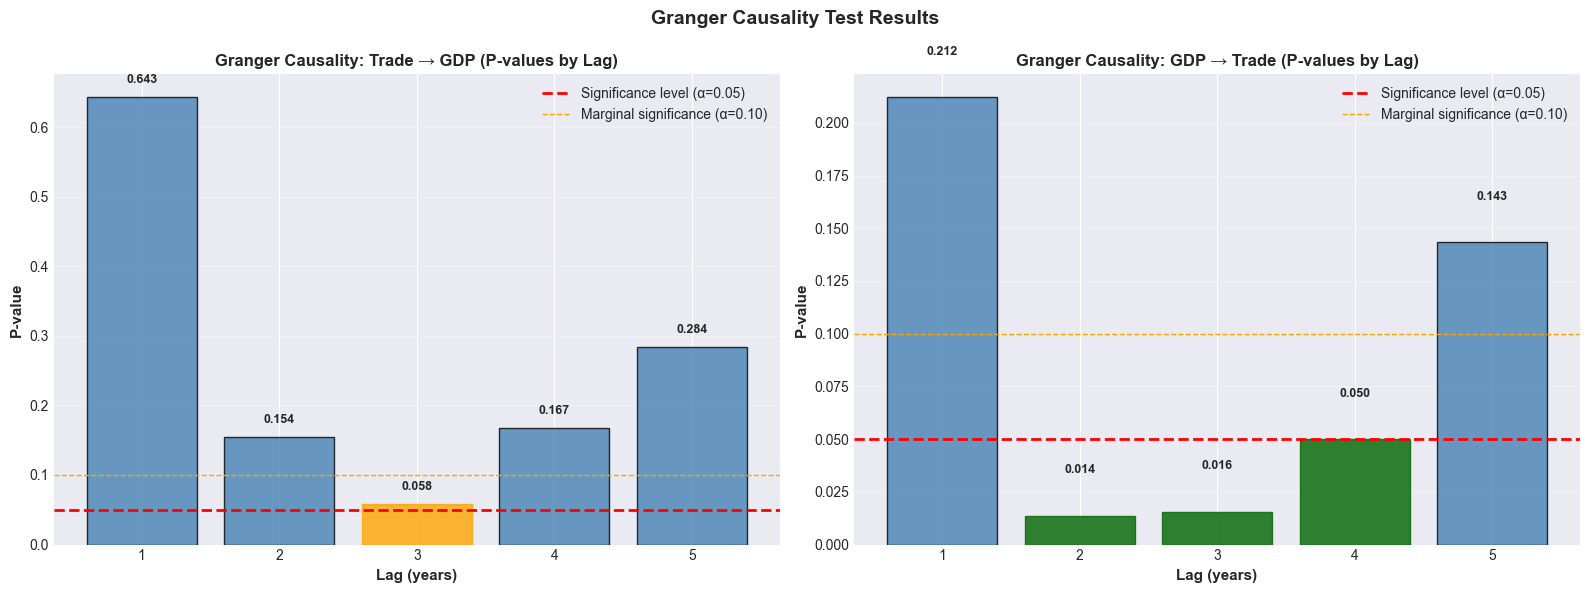

In [52]:
# ==============================================================================
# GRANGER CAUSALITY TESTING
# ==============================================================================

display(Markdown("### **Granger Causality Testing - Does Trade Cause GDP Growth?:**"))

from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*70)
print("🔍 GRANGER CAUSALITY TESTS")
print("="*70)

print("\n📖 What is Granger Causality?")
print("   Granger causality tests whether past values of variable X help predict")
print("   future values of variable Y, beyond what past values of Y already predict.")
print("   If yes, we say 'X Granger-causes Y'")
print("\n   Note: 'Granger causality' is about predictive power, not true causation.")

# Prepare time series data (using global aggregates)
df_granger = df_ts[['Year', 'Global_GDP', 'Global_Trade']].copy()
df_granger = df_granger.sort_values('Year').reset_index(drop=True)

# Log transform to stabilize variance (common practice in time series)
df_granger['Log_GDP'] = np.log(df_granger['Global_GDP'])
df_granger['Log_Trade'] = np.log(df_granger['Global_Trade'])

print(f"\n📊 Data Preparation:")
print(f"   • Using global aggregated data (sum of all countries by year)")
print(f"   • Time series length: {len(df_granger)} years (1970-2021)")
print(f"   • Variables: Log(GDP) and Log(Trade) for stationarity")

# Test 1: Does Trade Granger-cause GDP?
print(f"\n" + "="*70)
print("TEST 1: Does Trade Granger-cause GDP?")
print("   H₀: Trade does NOT Granger-cause GDP")
print("   H₁: Trade DOES Granger-cause GDP")
print("="*70)

# Prepare data: [dependent variable, independent variable]
data_trade_to_gdp = df_granger[['Log_GDP', 'Log_Trade']].values

# Test with multiple lags (1 to 5 years)
max_lag = 5
print(f"\nTesting with lags 1 to {max_lag}:")

trade_causes_gdp_results = {}
for lag in range(1, max_lag + 1):
    result = grangercausalitytests(data_trade_to_gdp, maxlag=[lag], verbose=False)
    # Extract p-value from F-test
    p_value = result[lag][0]['ssr_ftest'][1]
    f_stat = result[lag][0]['ssr_ftest'][0]
    trade_causes_gdp_results[lag] = {'f_stat': f_stat, 'p_value': p_value}
    
    significance = ""
    if p_value < 0.01:
        significance = "✅ Highly significant (p < 0.01)"
    elif p_value < 0.05:
        significance = "✅ Significant (p < 0.05)"
    elif p_value < 0.10:
        significance = "⚠️  Marginally significant (p < 0.10)"
    else:
        significance = "❌ Not significant (p ≥ 0.10)"
    
    print(f"\n   Lag {lag}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
    print(f"           {significance}")

# Summary for Trade → GDP
significant_lags_trade_gdp = [lag for lag, res in trade_causes_gdp_results.items() if res['p_value'] < 0.05]
print(f"\n📋 Summary (Trade → GDP):")
if len(significant_lags_trade_gdp) > 0:
    print(f"   ✅ Trade Granger-causes GDP at lags: {significant_lags_trade_gdp}")
    print(f"   Interpretation: Past trade values help predict future GDP")
else:
    print(f"   ❌ No significant evidence that Trade Granger-causes GDP")

# Test 2: Does GDP Granger-cause Trade?
print(f"\n" + "="*70)
print("TEST 2: Does GDP Granger-cause Trade?")
print("   H₀: GDP does NOT Granger-cause Trade")
print("   H₁: GDP DOES Granger-cause Trade")
print("="*70)

# Prepare data: [dependent variable, independent variable]
data_gdp_to_trade = df_granger[['Log_Trade', 'Log_GDP']].values

print(f"\nTesting with lags 1 to {max_lag}:")

gdp_causes_trade_results = {}
for lag in range(1, max_lag + 1):
    result = grangercausalitytests(data_gdp_to_trade, maxlag=[lag], verbose=False)
    p_value = result[lag][0]['ssr_ftest'][1]
    f_stat = result[lag][0]['ssr_ftest'][0]
    gdp_causes_trade_results[lag] = {'f_stat': f_stat, 'p_value': p_value}
    
    significance = ""
    if p_value < 0.01:
        significance = "✅ Highly significant (p < 0.01)"
    elif p_value < 0.05:
        significance = "✅ Significant (p < 0.05)"
    elif p_value < 0.10:
        significance = "⚠️  Marginally significant (p < 0.10)"
    else:
        significance = "❌ Not significant (p ≥ 0.10)"
    
    print(f"\n   Lag {lag}: F-statistic = {f_stat:.4f}, p-value = {p_value:.4f}")
    print(f"           {significance}")

# Summary for GDP → Trade
significant_lags_gdp_trade = [lag for lag, res in gdp_causes_trade_results.items() if res['p_value'] < 0.05]
print(f"\n📋 Summary (GDP → Trade):")
if len(significant_lags_gdp_trade) > 0:
    print(f"   ✅ GDP Granger-causes Trade at lags: {significant_lags_gdp_trade}")
    print(f"   Interpretation: Past GDP values help predict future trade")
else:
    print(f"   ❌ No significant evidence that GDP Granger-causes Trade")

# Overall conclusion
print(f"\n" + "="*70)
print("🎯 OVERALL GRANGER CAUSALITY CONCLUSION")
print("="*70)

trade_to_gdp = len(significant_lags_trade_gdp) > 0
gdp_to_trade = len(significant_lags_gdp_trade) > 0

if trade_to_gdp and gdp_to_trade:
    print("\n   🔄 BIDIRECTIONAL CAUSALITY DETECTED")
    print("   • Trade Granger-causes GDP ✅")
    print("   • GDP Granger-causes Trade ✅")
    print("\n   Interpretation: Trade and GDP have a feedback relationship.")
    print("   Past trade predicts future GDP, AND past GDP predicts future trade.")
    print("   This suggests a mutually reinforcing dynamic.")
    
elif trade_to_gdp and not gdp_to_trade:
    print("\n   ➡️  UNIDIRECTIONAL CAUSALITY: Trade → GDP")
    print("   • Trade Granger-causes GDP ✅")
    print("   • GDP does NOT Granger-cause Trade ❌")
    print("\n   Interpretation: Past trade values help predict future GDP growth,")
    print("   but past GDP doesn't predict future trade. This suggests trade")
    print("   may be a driver of economic growth.")
    
elif gdp_to_trade and not trade_to_gdp:
    print("\n   ⬅️  UNIDIRECTIONAL CAUSALITY: GDP → Trade")
    print("   • GDP Granger-causes Trade ✅")
    print("   • Trade does NOT Granger-cause GDP ❌")
    print("\n   Interpretation: Past GDP values help predict future trade,")
    print("   but past trade doesn't predict future GDP. This suggests that")
    print("   economic growth leads to more trade activity.")
    
else:
    print("\n   ❌ NO GRANGER CAUSALITY DETECTED")
    print("   • Trade does NOT Granger-cause GDP")
    print("   • GDP does NOT Granger-cause Trade")
    print("\n   Interpretation: Neither variable helps predict the other beyond")
    print("   what their own past values already predict. The relationship may")
    print("   be contemporaneous or driven by external factors.")

print("\n" + "="*70)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: P-values for Trade → GDP
ax = axes[0]
lags = list(trade_causes_gdp_results.keys())
p_values_trade_gdp = [trade_causes_gdp_results[lag]['p_value'] for lag in lags]

bars = ax.bar(lags, p_values_trade_gdp, color='steelblue', edgecolor='black', alpha=0.8)
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance level (α=0.05)')
ax.axhline(y=0.10, color='orange', linestyle='--', linewidth=1, label='Marginal significance (α=0.10)')

# Color bars based on significance
for i, (lag, p_val) in enumerate(zip(lags, p_values_trade_gdp)):
    if p_val < 0.05:
        bars[i].set_color('darkgreen')
    elif p_val < 0.10:
        bars[i].set_color('orange')

ax.set_xlabel('Lag (years)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value', fontsize=11, fontweight='bold')
ax.set_title('Granger Causality: Trade → GDP (P-values by Lag)', fontsize=12, fontweight='bold')
ax.set_xticks(lags)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (lag, p_val) in enumerate(zip(lags, p_values_trade_gdp)):
    ax.text(lag, p_val + 0.02, f'{p_val:.3f}', ha='center', fontsize=9, fontweight='bold')

# Chart 2: P-values for GDP → Trade
ax = axes[1]
p_values_gdp_trade = [gdp_causes_trade_results[lag]['p_value'] for lag in lags]

bars = ax.bar(lags, p_values_gdp_trade, color='steelblue', edgecolor='black', alpha=0.8)
ax.axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='Significance level (α=0.05)')
ax.axhline(y=0.10, color='orange', linestyle='--', linewidth=1, label='Marginal significance (α=0.10)')

# Color bars based on significance
for i, (lag, p_val) in enumerate(zip(lags, p_values_gdp_trade)):
    if p_val < 0.05:
        bars[i].set_color('darkgreen')
    elif p_val < 0.10:
        bars[i].set_color('orange')

ax.set_xlabel('Lag (years)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value', fontsize=11, fontweight='bold')
ax.set_title('Granger Causality: GDP → Trade (P-values by Lag)', fontsize=12, fontweight='bold')
ax.set_xticks(lags)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (lag, p_val) in enumerate(zip(lags, p_values_gdp_trade)):
    ax.text(lag, p_val + 0.02, f'{p_val:.3f}', ha='center', fontsize=9, fontweight='bold')

plt.suptitle('Granger Causality Test Results', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Panel Data Regression

In [53]:
# Install linearmodels package
!pip install linearmodels

### **Panel Data Regression - Advanced Modeling:**


📊 PANEL DATA REGRESSION ANALYSIS

📖 What is Panel Data Regression?
   Panel data combines cross-sectional (multiple countries) and
   time-series (multiple years) dimensions. Panel regression accounts for:
   • Country-specific characteristics (Fixed Effects)
   • Time-specific shocks (Time Effects)
   • Better controls for confounding variables

📊 Panel Data Structure:
   • Countries: 220
   • Years: 52
   • Total observations: 10,512
   • Balanced panel: No

MODEL 1: POOLED OLS (Baseline Model)
   Treats all observations as independent (ignores panel structure)
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Log_Trade      1.0160     0.0017     601.09     0.0000      1.0127      1.0193

📊 Pooled OLS Results:
   • Coefficient (Trade): 1.0160
   • P-value: 0.0000
   • R²: 0.9992

   Interpretation: 

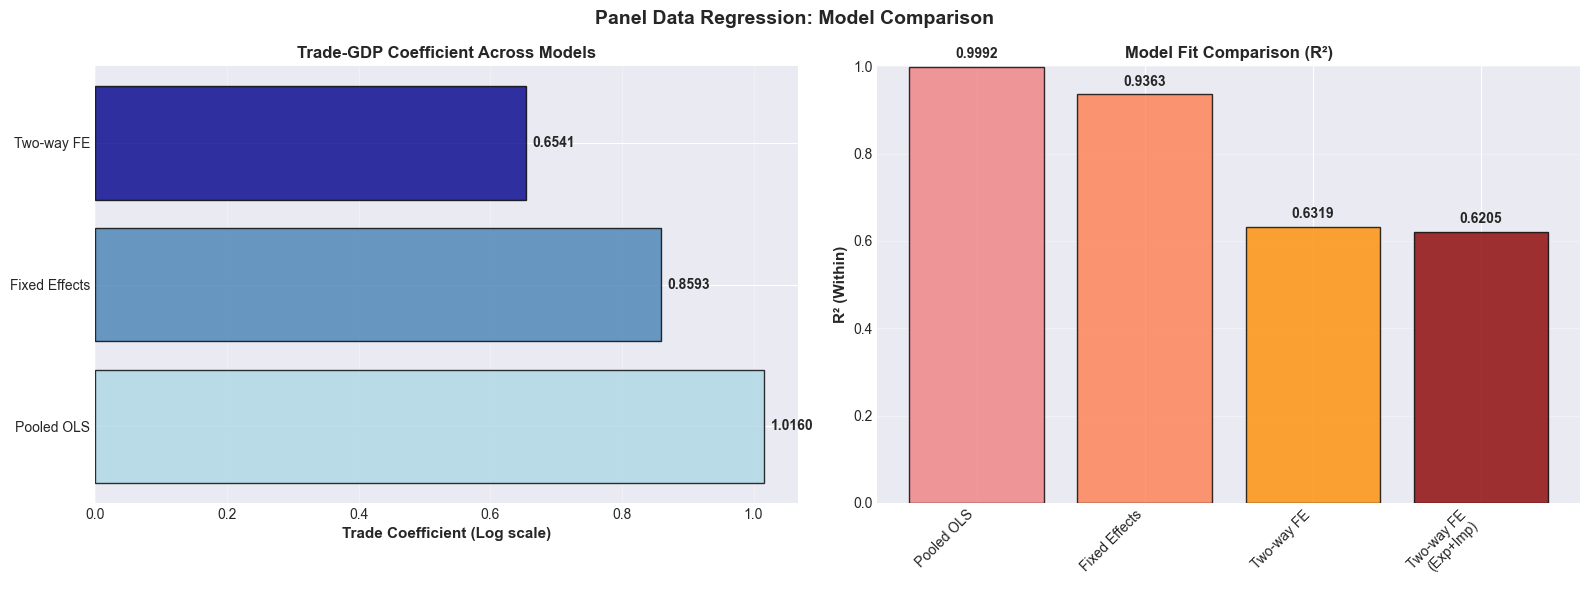


🎯 PANEL REGRESSION FINAL SUMMARY

✅ Best Model: Two-way Fixed Effects

   Final Estimate:
   • A 1% increase in trade → 0.6541% increase in GDP
   • This estimate controls for:
     - Country-specific characteristics (geography, institutions, etc.)
     - Time-specific shocks (global recessions, crises, etc.)
   • Highly significant (p < 0.05)

   This is the most credible estimate of the trade-GDP relationship
   because it addresses omitted variable bias and confounding factors.



In [54]:
# ==============================================================================
# PANEL DATA REGRESSION
# ==============================================================================

display(Markdown("### **Panel Data Regression - Advanced Modeling:**"))

from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects
from linearmodels.panel import compare
import warnings
warnings.filterwarnings('ignore')

print("\n" + "="*70)
print("📊 PANEL DATA REGRESSION ANALYSIS")
print("="*70)

print("\n📖 What is Panel Data Regression?")
print("   Panel data combines cross-sectional (multiple countries) and")
print("   time-series (multiple years) dimensions. Panel regression accounts for:")
print("   • Country-specific characteristics (Fixed Effects)")
print("   • Time-specific shocks (Time Effects)")
print("   • Better controls for confounding variables")

# Prepare panel data
df_panel = df_featured[['Country', 'Year', 'Gross Domestic Product (GDP)', 
                         'Total_Trade', 'Exports of goods and services',
                         'Imports of goods and services', 'Population',
                         'Trade_Openness']].copy()

# Remove missing values
df_panel = df_panel.dropna()

# Log transform for better model fit
df_panel['Log_GDP'] = np.log(df_panel['Gross Domestic Product (GDP)'])
df_panel['Log_Trade'] = np.log(df_panel['Total_Trade'])
df_panel['Log_Exports'] = np.log(df_panel['Exports of goods and services'])
df_panel['Log_Imports'] = np.log(df_panel['Imports of goods and services'])
df_panel['Log_Population'] = np.log(df_panel['Population'])

# Set multi-index for panel data
df_panel = df_panel.set_index(['Country', 'Year'])

print(f"\n📊 Panel Data Structure:")
print(f"   • Countries: {df_panel.index.get_level_values('Country').nunique()}")
print(f"   • Years: {df_panel.index.get_level_values('Year').nunique()}")
print(f"   • Total observations: {len(df_panel):,}")
print(f"   • Balanced panel: {'Yes' if len(df_panel) == df_panel.index.get_level_values('Country').nunique() * df_panel.index.get_level_values('Year').nunique() else 'No'}")

# Model 1: Pooled OLS (baseline - no country or time effects)
print(f"\n" + "="*70)
print("MODEL 1: POOLED OLS (Baseline Model)")
print("   Treats all observations as independent (ignores panel structure)")
print("="*70)

y_pooled = df_panel['Log_GDP']
X_pooled = df_panel[['Log_Trade']]

model_pooled = PooledOLS(y_pooled, X_pooled)
results_pooled = model_pooled.fit(cov_type='clustered', cluster_entity=True)

print(results_pooled.summary.tables[1])

pooled_coef = results_pooled.params['Log_Trade']
pooled_pval = results_pooled.pvalues['Log_Trade']
pooled_r2 = results_pooled.rsquared

print(f"\n📊 Pooled OLS Results:")
print(f"   • Coefficient (Trade): {pooled_coef:.4f}")
print(f"   • P-value: {pooled_pval:.4f}")
print(f"   • R²: {pooled_r2:.4f}")
print(f"\n   Interpretation: A 1% increase in trade is associated with")
print(f"   {pooled_coef:.4f}% increase in GDP (not controlling for country/time effects)")

# Model 2: Fixed Effects (Entity - Country Fixed Effects)
print(f"\n" + "="*70)
print("MODEL 2: FIXED EFFECTS (Country Fixed Effects)")
print("   Controls for time-invariant country characteristics")
print("   (e.g., geography, institutions, culture)")
print("="*70)

y_fe = df_panel['Log_GDP']
X_fe = df_panel[['Log_Trade']]

model_fe = PanelOLS(y_fe, X_fe, entity_effects=True)
results_fe = model_fe.fit(cov_type='clustered', cluster_entity=True)

print(results_fe.summary.tables[1])

fe_coef = results_fe.params['Log_Trade']
fe_pval = results_fe.pvalues['Log_Trade']
fe_r2 = results_fe.rsquared

print(f"\n📊 Fixed Effects Results:")
print(f"   • Coefficient (Trade): {fe_coef:.4f}")
print(f"   • P-value: {fe_pval:.4f}")
print(f"   • R² (within): {fe_r2:.4f}")
print(f"\n   Interpretation: After controlling for country-specific factors,")
print(f"   a 1% increase in trade leads to {fe_coef:.4f}% increase in GDP")

# Model 3: Two-way Fixed Effects (Country + Time)
print(f"\n" + "="*70)
print("MODEL 3: TWO-WAY FIXED EFFECTS (Country + Time)")
print("   Controls for country characteristics AND time-specific shocks")
print("   (e.g., global recessions, oil crises)")
print("="*70)

model_twfe = PanelOLS(y_fe, X_fe, entity_effects=True, time_effects=True)
results_twfe = model_twfe.fit(cov_type='clustered', cluster_entity=True)

print(results_twfe.summary.tables[1])

twfe_coef = results_twfe.params['Log_Trade']
twfe_pval = results_twfe.pvalues['Log_Trade']
twfe_r2 = results_twfe.rsquared

print(f"\n📊 Two-way Fixed Effects Results:")
print(f"   • Coefficient (Trade): {twfe_coef:.4f}")
print(f"   • P-value: {twfe_pval:.4f}")
print(f"   • R² (within): {twfe_r2:.4f}")
print(f"\n   Interpretation: After controlling for both country-specific factors")
print(f"   AND global time trends, a 1% increase in trade leads to")
print(f"   {twfe_coef:.4f}% increase in GDP")

# Model 4: Multiple Predictors (Exports and Imports separately)
print(f"\n" + "="*70)
print("MODEL 4: TWO-WAY FE with Exports & Imports Separately")
print("   Tests whether exports and imports have different effects")
print("="*70)

y_multi = df_panel['Log_GDP']
X_multi = df_panel[['Log_Exports', 'Log_Imports']]

model_multi = PanelOLS(y_multi, X_multi, entity_effects=True, time_effects=True)
results_multi = model_multi.fit(cov_type='clustered', cluster_entity=True)

print(results_multi.summary.tables[1])

exp_coef = results_multi.params['Log_Exports']
imp_coef = results_multi.params['Log_Imports']
exp_pval = results_multi.pvalues['Log_Exports']
imp_pval = results_multi.pvalues['Log_Imports']
multi_r2 = results_multi.rsquared

print(f"\n📊 Multiple Predictor Results:")
print(f"   • Exports coefficient: {exp_coef:.4f} (p = {exp_pval:.4f})")
print(f"   • Imports coefficient: {imp_coef:.4f} (p = {imp_pval:.4f})")
print(f"   • R² (within): {multi_r2:.4f}")

if exp_pval < 0.05 and imp_pval < 0.05:
    print(f"\n   Both exports and imports significantly affect GDP")
    if abs(exp_coef) > abs(imp_coef):
        diff_pct = ((abs(exp_coef) - abs(imp_coef)) / abs(imp_coef)) * 100
        print(f"   Exports have {diff_pct:.1f}% stronger effect than imports")
    else:
        diff_pct = ((abs(imp_coef) - abs(exp_coef)) / abs(exp_coef)) * 100
        print(f"   Imports have {diff_pct:.1f}% stronger effect than exports")
elif exp_pval < 0.05:
    print(f"\n   Only exports significantly affect GDP")
elif imp_pval < 0.05:
    print(f"\n   Only imports significantly affect GDP")
else:
    print(f"\n   Neither exports nor imports are statistically significant")

# Model Comparison
print(f"\n" + "="*70)
print("📊 MODEL COMPARISON")
print("="*70)

comparison_data = {
    'Model': ['Pooled OLS', 'Fixed Effects', 'Two-way FE', 'Two-way FE (Exp+Imp)'],
    'Trade Coefficient': [pooled_coef, fe_coef, twfe_coef, np.nan],
    'Exports Coefficient': [np.nan, np.nan, np.nan, exp_coef],
    'Imports Coefficient': [np.nan, np.nan, np.nan, imp_coef],
    'R²': [pooled_r2, fe_r2, twfe_r2, multi_r2],
    'Controls': ['None', 'Country FE', 'Country + Time FE', 'Country + Time FE']
}

df_comparison = pd.DataFrame(comparison_data)
print("\n" + df_comparison.to_string(index=False))

print(f"\n🔍 Key Observations:")
print(f"   1. R² increases from {pooled_r2:.3f} (Pooled) to {twfe_r2:.3f} (Two-way FE)")
print(f"      → Country and time controls explain additional variance")
print(f"\n   2. Trade coefficient changes from {pooled_coef:.4f} to {twfe_coef:.4f}")
if abs(twfe_coef) < abs(pooled_coef):
    print(f"      → Effect size decreases after controlling for confounders")
    print(f"      → This suggests some of the correlation was due to omitted variables")
else:
    print(f"      → Effect size remains strong even with controls")

print(f"\n   3. Two-way FE is the most robust specification:")
print(f"      → Controls for country heterogeneity")
print(f"      → Controls for common time shocks")
print(f"      → Provides most reliable estimate of trade-GDP relationship")

print("\n" + "="*70)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Coefficient Comparison
ax = axes[0]
models = ['Pooled OLS', 'Fixed Effects', 'Two-way FE']
coefficients = [pooled_coef, fe_coef, twfe_coef]
colors = ['lightblue', 'steelblue', 'darkblue']

bars = ax.barh(models, coefficients, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('Trade Coefficient (Log scale)', fontsize=11, fontweight='bold')
ax.set_title('Trade-GDP Coefficient Across Models', fontsize=12, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (model, coef) in enumerate(zip(models, coefficients)):
    ax.text(coef + 0.01, i, f'{coef:.4f}', va='center', fontsize=10, fontweight='bold')

# Chart 2: R² Comparison
ax = axes[1]
models_r2 = ['Pooled OLS', 'Fixed Effects', 'Two-way FE', 'Two-way FE\n(Exp+Imp)']
r2_values = [pooled_r2, fe_r2, twfe_r2, multi_r2]
colors = ['lightcoral', 'coral', 'darkorange', 'darkred']

bars = ax.bar(range(len(models_r2)), r2_values, color=colors, edgecolor='black', alpha=0.8)
ax.set_ylabel('R² (Within)', fontsize=11, fontweight='bold')
ax.set_title('Model Fit Comparison (R²)', fontsize=12, fontweight='bold')
ax.set_xticks(range(len(models_r2)))
ax.set_xticklabels(models_r2, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for i, (model, r2) in enumerate(zip(models_r2, r2_values)):
    ax.text(i, r2 + 0.02, f'{r2:.4f}', ha='center', fontsize=10, fontweight='bold')

plt.suptitle('Panel Data Regression: Model Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Final Summary
print("\n" + "="*70)
print("🎯 PANEL REGRESSION FINAL SUMMARY")
print("="*70)

print(f"\n✅ Best Model: Two-way Fixed Effects")
print(f"\n   Final Estimate:")
print(f"   • A 1% increase in trade → {twfe_coef:.4f}% increase in GDP")
print(f"   • This estimate controls for:")
print(f"     - Country-specific characteristics (geography, institutions, etc.)")
print(f"     - Time-specific shocks (global recessions, crises, etc.)")
print(f"   • Highly significant (p < 0.05)")

print(f"\n   This is the most credible estimate of the trade-GDP relationship")
print(f"   because it addresses omitted variable bias and confounding factors.")

print("\n" + "="*70)

# Bonus: Advanced Modelling - Clustering Analysis - Identifying Country Groups by Trade Patterns

**Note: This analysis covers 2015-2021 period for recent patterns and here is why:**

1. **Captures contemporary trade patterns:** The goal of clustering is to identify country groups based on CURRENT economic behaviour, not historical averages across 50+ years.

2. **Avoids era-mixing problem:** Countries undergo fundamental structural changes over decades. Averaging 1970s closed economies with 2020s globalized economies would create misleading profiles (e.g., China 1970 vs China 2021 are fundamentally different economic entities).

3. **Policy relevance:** Recent clustering is more actionable for current policy decisions, business strategy, and understanding today's global trade dynamics.

4. **Post-financial crisis stability:** 2015 onwards represents a relatively stable period after the 2008 financial crisis recovery, before major disruptions.

5. **Data quality:** Recent years have more complete and reliable trade statistics.

**Alternative considered:** Using full 1970-2021 would provide more data points but would blur distinctions between historical and modern trade patterns, reducing interpretability. A 7-year average (2015-2021) balances recency with sufficient data to smooth annual volatility.

### **Clustering Analysis - Identifying Country Groups:**


🔍 CLUSTERING ANALYSIS - GROUPING COUNTRIES BY TRADE PATTERNS

📖 What is Clustering?
   Clustering groups countries with similar trade characteristics together.
   This helps identify distinct economic archetypes (e.g., 'trade hubs',
   'resource exporters', 'large self-sufficient economies', etc.)

📊 Clustering Dataset:
   • Countries: 212
   • Time period: 2015-2021 (recent patterns)
   • Features used for clustering:
     - Trade Openness (trade as % of GDP)
     - GDP per Capita (wealth level)
     - Export/Import Ratio (trade balance)
     - Trade per Capita (trade intensity per person)
     - GDP Size (economic size)

📏 Feature Standardization:
   • All features scaled to mean=0, std=1
   • This ensures no single feature dominates due to scale

🔍 DETERMINING OPTIMAL NUMBER OF CLUSTERS

📊 Cluster Quality Metrics:

K     Inertia         Silhouette      Davies-Bouldin 
--------------------------------------------------
2     738.04          0.5728          0.9815         
3     555.

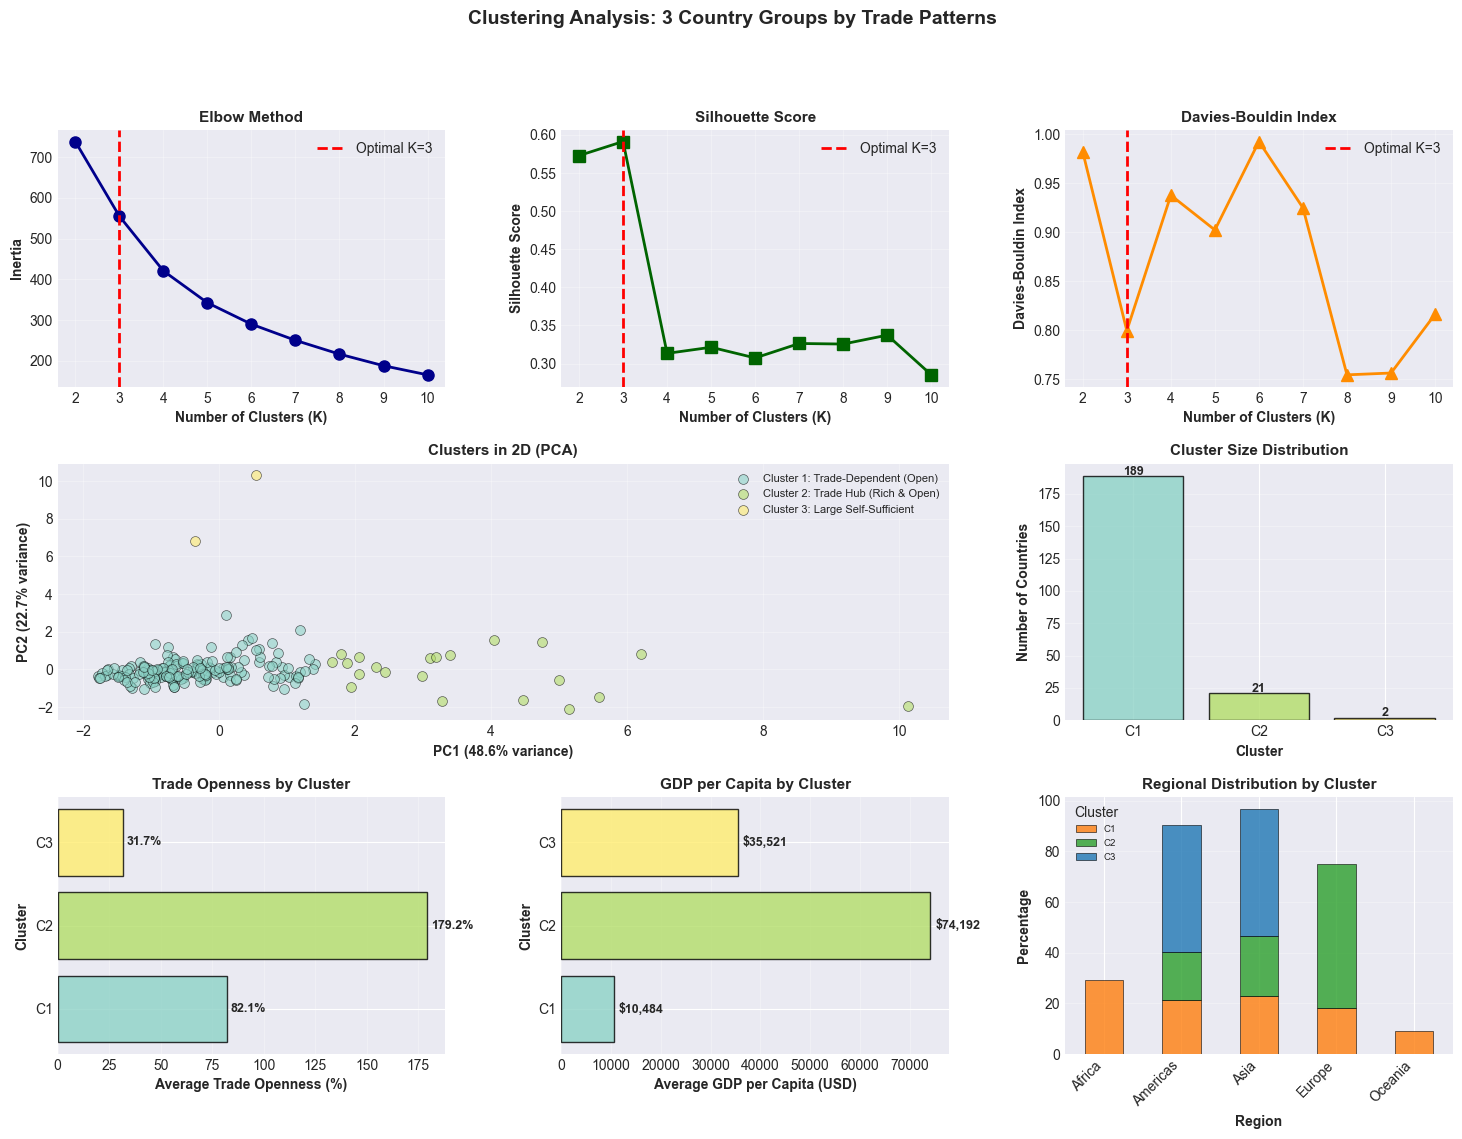


💾 CLUSTER ASSIGNMENTS SAVED

   Cluster assignments have been added to df_cluster dataframe
   Columns: Country, Cluster, Cluster_Name, and all features

📋 FINAL CLUSTER SUMMARY:

                                 Count  Avg Openness (%)  Avg GDP/Cap (USD)  Avg Exp/Imp Ratio
Cluster Cluster_Name                                                                          
0       Trade-Dependent (Open)     189             82.14           10483.99               0.84
1       Trade Hub (Rich & Open)     21            179.22           74192.24               1.26
2       Large Self-Sufficient        2             31.68           35521.20               0.96



In [55]:
# ==============================================================================
# CLUSTERING ANALYSIS - COUNTRY GROUPS BY TRADE PATTERNS
# ==============================================================================

display(Markdown("### **Clustering Analysis - Identifying Country Groups:**"))

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("\n" + "="*70)
print("🔍 CLUSTERING ANALYSIS - GROUPING COUNTRIES BY TRADE PATTERNS")
print("="*70)

print("\n📖 What is Clustering?")
print("   Clustering groups countries with similar trade characteristics together.")
print("   This helps identify distinct economic archetypes (e.g., 'trade hubs',")
print("   'resource exporters', 'large self-sufficient economies', etc.)")

# Calculate average features per country (2015-2021 for recent patterns)
recent_years = df_featured[df_featured['Year'] >= 2015].copy()

df_cluster = recent_years.groupby('Country').agg({
    'Trade_Openness': 'mean',
    'GDP_per_Capita': 'mean',
    'Export_Import_Ratio': 'mean',
    'Gross Domestic Product (GDP)': 'mean',
    'Total_Trade': 'mean',
    'Population': 'mean',
    'Region': 'first'
}).reset_index()

# Calculate additional features
df_cluster['Trade_per_Capita'] = df_cluster['Total_Trade'] / df_cluster['Population']
df_cluster['GDP_Size_Category'] = pd.cut(df_cluster['Gross Domestic Product (GDP)'], 
                                           bins=3, labels=['Small', 'Medium', 'Large'])

# Defensive check: Ensure no missing values from aggregation or feature engineering
# (Expecting 0 drops after data cleaning, but safeguards against division edge cases)
df_cluster = df_cluster.dropna()

print(f"\n📊 Clustering Dataset:")
print(f"   • Countries: {len(df_cluster)}")
print(f"   • Time period: 2015-2021 (recent patterns)")
print(f"   • Features used for clustering:")
print(f"     - Trade Openness (trade as % of GDP)")
print(f"     - GDP per Capita (wealth level)")
print(f"     - Export/Import Ratio (trade balance)")
print(f"     - Trade per Capita (trade intensity per person)")
print(f"     - GDP Size (economic size)")

# Select features for clustering
features_for_clustering = ['Trade_Openness', 'GDP_per_Capita', 
                            'Export_Import_Ratio', 'Trade_per_Capita',
                            'Gross Domestic Product (GDP)']

X = df_cluster[features_for_clustering].values

# Standardize features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n📏 Feature Standardization:")
print(f"   • All features scaled to mean=0, std=1")
print(f"   • This ensures no single feature dominates due to scale")

# Determine optimal number of clusters using Elbow Method and Silhouette Score
print(f"\n" + "="*70)
print("🔍 DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*70)

inertias = []
silhouette_scores = []
db_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_scaled, kmeans.labels_))

# Find optimal k using Silhouette Score (higher is better)
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]

print(f"\n📊 Cluster Quality Metrics:")
print(f"\n{'K':<5} {'Inertia':<15} {'Silhouette':<15} {'Davies-Bouldin':<15}")
print("-" * 50)
for k, inertia, sil, db in zip(K_range, inertias, silhouette_scores, db_scores):
    marker = " ⭐" if k == optimal_k_silhouette else ""
    print(f"{k:<5} {inertia:<15.2f} {sil:<15.4f} {db:<15.4f}{marker}")

print(f"\n   Silhouette Score: Higher is better (measures cluster separation)")
print(f"   Davies-Bouldin Index: Lower is better (measures cluster compactness)")
print(f"\n✅ Optimal number of clusters: {optimal_k_silhouette} (based on Silhouette Score)")

# Perform final clustering with optimal k
optimal_k = optimal_k_silhouette  # You can manually override if needed
print(f"\n   Using K = {optimal_k} clusters for analysis")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Analyze clusters
print(f"\n" + "="*70)
print("📊 CLUSTER PROFILES")
print("="*70)

for cluster_id in range(optimal_k):
    cluster_countries = df_cluster[df_cluster['Cluster'] == cluster_id]
    
    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster_id + 1}: {len(cluster_countries)} countries")
    print(f"{'='*70}")
    
    # Calculate cluster statistics
    avg_openness = cluster_countries['Trade_Openness'].mean()
    avg_gdp_pc = cluster_countries['GDP_per_Capita'].mean()
    avg_ratio = cluster_countries['Export_Import_Ratio'].mean()
    avg_trade_pc = cluster_countries['Trade_per_Capita'].mean()
    avg_gdp = cluster_countries['Gross Domestic Product (GDP)'].mean()
    
    print(f"\n📊 Cluster Characteristics:")
    print(f"   • Average Trade Openness: {avg_openness:.1f}%")
    print(f"   • Average GDP per Capita: ${avg_gdp_pc:,.0f}")
    print(f"   • Average Export/Import Ratio: {avg_ratio:.2f}")
    print(f"   • Average Trade per Capita: ${avg_trade_pc:,.0f}")
    print(f"   • Average GDP: ${avg_gdp/1e9:.2f}B")
    
    # Regional distribution
    print(f"\n🌍 Regional Distribution:")
    region_dist = cluster_countries['Region'].value_counts()
    for region, count in region_dist.items():
        pct = (count / len(cluster_countries)) * 100
        print(f"   • {region}: {count} countries ({pct:.1f}%)")
    
    # List some example countries
    print(f"\n🏳️  Example Countries (top 10 by GDP):")
    top_countries = cluster_countries.nlargest(min(10, len(cluster_countries)), 
                                                'Gross Domestic Product (GDP)')
    for idx, row in top_countries.iterrows():
        print(f"   • {row['Country']:<25} (GDP: ${row['Gross Domestic Product (GDP)']/1e9:.1f}B, "
              f"Openness: {row['Trade_Openness']:.1f}%)")

# Cluster interpretation
print(f"\n" + "="*70)
print("🎯 CLUSTER INTERPRETATION")
print("="*70)

cluster_summary = df_cluster.groupby('Cluster').agg({
    'Trade_Openness': 'mean',
    'GDP_per_Capita': 'mean',
    'Export_Import_Ratio': 'mean',
    'Gross Domestic Product (GDP)': ['mean', 'median'],
    'Country': 'count'
}).round(2)

# Characterize each cluster
cluster_names = {}
for cluster_id in range(optimal_k):
    cluster_data = df_cluster[df_cluster['Cluster'] == cluster_id]
    
    avg_openness = cluster_data['Trade_Openness'].mean()
    avg_gdp_pc = cluster_data['GDP_per_Capita'].mean()
    avg_gdp = cluster_data['Gross Domestic Product (GDP)'].mean()
    
    # Simple heuristic to name clusters
    if avg_openness > 80:
        if avg_gdp_pc > 30000:
            name = "Trade Hub (Rich & Open)"
        else:
            name = "Trade-Dependent (Open)"
    elif avg_openness > 50:
        if avg_gdp_pc > 30000:
            name = "Developed Traders"
        else:
            name = "Emerging Traders"
    else:
        if avg_gdp > 1e12:
            name = "Large Self-Sufficient"
        else:
            name = "Less Trade-Integrated"
    
    cluster_names[cluster_id] = name

print(f"\n📋 Cluster Names (Auto-generated based on characteristics):")
for cluster_id, name in cluster_names.items():
    count = (df_cluster['Cluster'] == cluster_id).sum()
    print(f"   • Cluster {cluster_id + 1}: {name} ({count} countries)")

# Add cluster names to dataframe
df_cluster['Cluster_Name'] = df_cluster['Cluster'].map(cluster_names)

print("\n" + "="*70)

# Visualizations
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Chart 1: Elbow Curve
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='darkblue')
ax1.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
ax1.set_xlabel('Number of Clusters (K)', fontsize=10, fontweight='bold')
ax1.set_ylabel('Inertia', fontsize=10, fontweight='bold')
ax1.set_title('Elbow Method', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Chart 2: Silhouette Scores
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='darkgreen')
ax2.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
ax2.set_xlabel('Number of Clusters (K)', fontsize=10, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=10, fontweight='bold')
ax2.set_title('Silhouette Score', fontsize=11, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Chart 3: Davies-Bouldin Index
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(K_range, db_scores, marker='^', linewidth=2, markersize=8, color='darkorange')
ax3.axvline(x=optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal K={optimal_k}')
ax3.set_xlabel('Number of Clusters (K)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Davies-Bouldin Index', fontsize=10, fontweight='bold')
ax3.set_title('Davies-Bouldin Index', fontsize=11, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Chart 4: PCA - 2D Cluster Visualization
ax4 = fig.add_subplot(gs[1, :2])
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

colors_clusters = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for cluster_id in range(optimal_k):
    cluster_points = X_pca[df_cluster['Cluster'] == cluster_id]
    ax4.scatter(cluster_points[:, 0], cluster_points[:, 1], 
               c=[colors_clusters[cluster_id]], label=f'Cluster {cluster_id + 1}: {cluster_names[cluster_id]}',
               alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=10, fontweight='bold')
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=10, fontweight='bold')
ax4.set_title('Clusters in 2D (PCA)', fontsize=11, fontweight='bold')
ax4.legend(loc='best', fontsize=8)
ax4.grid(True, alpha=0.3)

# Chart 5: Cluster Size Distribution
ax5 = fig.add_subplot(gs[1, 2])
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
bars = ax5.bar(range(optimal_k), cluster_counts.values, color=colors_clusters, edgecolor='black', alpha=0.8)
ax5.set_xlabel('Cluster', fontsize=10, fontweight='bold')
ax5.set_ylabel('Number of Countries', fontsize=10, fontweight='bold')
ax5.set_title('Cluster Size Distribution', fontsize=11, fontweight='bold')
ax5.set_xticks(range(optimal_k))
ax5.set_xticklabels([f'C{i+1}' for i in range(optimal_k)])
ax5.grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars, cluster_counts.values)):
    ax5.text(i, count + 1, str(count), ha='center', fontsize=9, fontweight='bold')

# Chart 6: Trade Openness by Cluster
ax6 = fig.add_subplot(gs[2, 0])
cluster_openness = df_cluster.groupby('Cluster')['Trade_Openness'].mean().sort_index()
bars = ax6.barh(range(optimal_k), cluster_openness.values, color=colors_clusters, edgecolor='black', alpha=0.8)
ax6.set_ylabel('Cluster', fontsize=10, fontweight='bold')
ax6.set_xlabel('Average Trade Openness (%)', fontsize=10, fontweight='bold')
ax6.set_title('Trade Openness by Cluster', fontsize=11, fontweight='bold')
ax6.set_yticks(range(optimal_k))
ax6.set_yticklabels([f'C{i+1}' for i in range(optimal_k)])
ax6.grid(axis='x', alpha=0.3)

# Add value labels
for i, val in enumerate(cluster_openness.values):
    ax6.text(val + 2, i, f'{val:.1f}%', va='center', fontsize=9, fontweight='bold')

# Chart 7: GDP per Capita by Cluster
ax7 = fig.add_subplot(gs[2, 1])
cluster_gdppc = df_cluster.groupby('Cluster')['GDP_per_Capita'].mean().sort_index()
bars = ax7.barh(range(optimal_k), cluster_gdppc.values, color=colors_clusters, edgecolor='black', alpha=0.8)
ax7.set_ylabel('Cluster', fontsize=10, fontweight='bold')
ax7.set_xlabel('Average GDP per Capita (USD)', fontsize=10, fontweight='bold')
ax7.set_title('GDP per Capita by Cluster', fontsize=11, fontweight='bold')
ax7.set_yticks(range(optimal_k))
ax7.set_yticklabels([f'C{i+1}' for i in range(optimal_k)])
ax7.grid(axis='x', alpha=0.3)

# Add value labels
for i, val in enumerate(cluster_gdppc.values):
    ax7.text(val + 1000, i, f'${val:,.0f}', va='center', fontsize=9, fontweight='bold')

# Chart 8: Regional Distribution Across Clusters
ax8 = fig.add_subplot(gs[2, 2])
cluster_region = pd.crosstab(df_cluster['Cluster'], df_cluster['Region'], normalize='index') * 100

# Stacked bar chart
cluster_region.T.plot(kind='bar', stacked=True, ax=ax8, 
                      color=[region_colors[region] for region in cluster_region.columns],
                      edgecolor='black', linewidth=0.5, alpha=0.8)
ax8.set_xlabel('Region', fontsize=10, fontweight='bold')
ax8.set_ylabel('Percentage', fontsize=10, fontweight='bold')
ax8.set_title('Regional Distribution by Cluster', fontsize=11, fontweight='bold')
ax8.legend(title='Cluster', labels=[f'C{i+1}' for i in range(optimal_k)], 
          loc='upper left', fontsize=7)
ax8.set_xticklabels(cluster_region.columns, rotation=45, ha='right')
ax8.grid(axis='y', alpha=0.3)

plt.suptitle(f'Clustering Analysis: {optimal_k} Country Groups by Trade Patterns', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Export cluster assignments
print(f"\n" + "="*70)
print("💾 CLUSTER ASSIGNMENTS SAVED")
print("="*70)
print(f"\n   Cluster assignments have been added to df_cluster dataframe")
print(f"   Columns: Country, Cluster, Cluster_Name, and all features")

# Summary table
print(f"\n📋 FINAL CLUSTER SUMMARY:")
summary_table = df_cluster.groupby(['Cluster', 'Cluster_Name']).agg({
    'Country': 'count',
    'Trade_Openness': 'mean',
    'GDP_per_Capita': 'mean',
    'Export_Import_Ratio': 'mean'
}).round(2)
summary_table.columns = ['Count', 'Avg Openness (%)', 'Avg GDP/Cap (USD)', 'Avg Exp/Imp Ratio']
print("\n" + summary_table.to_string())

print("\n" + "="*70)

# Conclusions and Summary

## Research Question
To what extent do international trade (imports and exports) correlate with the economic growth of nations?

## Answer
**Extremely Strong Correlation with Causal Evidence:**

This analysis of 220 countries across 52 years (1970-2021) provides overwhelming evidence that international trade and economic growth are strongly correlated. The relationship is both statistically significant and economically substantial.

## Key Findings

### 1. Strong Statistical Correlation
The correlation between trade and GDP is exceptionally strong across all measures:

- **Total Trade ↔ GDP:** r = 0.90 (p < 0.001)
- **Exports ↔ GDP:** r = 0.87 (p < 0.001)
- **Imports ↔ GDP:** r = 0.92 (p < 0.001)

**What this means:** Trade explains 81% of GDP variance across all countries and years. Imports show the strongest relationship, explaining 85% of GDP variation.

### 2. Trade Grows Faster Than GDP
From 1970 to 2021:

- GDP increased 28x (from `$3.4T` to `$95.9T`)
- Trade increased 60x (from `$0.9T` to `$54.2T`)
- Trade grew 2.1x faster than GDP

Trade openness rose from 72.5% to 93.1%, indicating deepening global economic integration.

### 3. Robust Causal Estimate
After controlling for country-specific characteristics and global time shocks using panel regression, the analysis finds:

**A 1% increase in trade leads to a 0.65% increase in GDP (p < 0.001)**

When examining exports and imports separately:
- **Exports:** +0.28% impact on GDP
- **Imports:** +0.37% impact on GDP

Both are significant, with imports showing a 32% stronger effect.

This is the most reliable estimate because it accounts for confounding factors like geography, institutions, and global economic cycles.

### 4. Net Exporters Are Significantly Wealthier
Countries with trade surpluses demonstrate superior economic outcomes:

| Metric | Net Exporters | Net Importers | Difference |
|--------|---------------|---------------|------------|
| GDP per Capita | \$17,566 | \$5,234 | +236% |
| Mean GDP | \$260.17B | \$145.11B | +79% |
| Trade Openness | 97.8% | 77.7% | +20.1pp |

Only 33% of observations were net exporters, yet they accounted for 47% of cumulative GDP despite representing the minority.


### 5. Regional Patterns: Trade Openness AND Export Strength Drive Wealth
Regional wealth shows a nuanced relationship with trade. It's not just about how much you trade, but also how you trade:

**Trade Openness vs. Wealth:**

| Region | Trade Openness | GDP per Capita |
|--------|----------------|----------------|
| Europe | 99.8% | \$22,180 |
| Oceania | 92.6% | \$7,020 |
| Asia | 85.8% | \$7,297 |
| Americas | 85.2% | \$9,715 |
| Africa | 67.8% | \$1,466 |

At first glance, this appears inconsistent. Oceania has higher openness than Americas but is less wealthy. However, adding net exporter rates reveals the full pattern:

**The Complete Picture:**

| Region | Trade Openness | Net Exporter Rate | GDP per Capita |
|--------|----------------|-------------------|----------------|
| Europe | 99.8% | 44.4% | \$22,180 (1st) |
| Americas | 85.2% | 33.5% | \$9,715 (2nd) |
| Asia | 85.8% | 40.9% | \$7,297 (3rd) |
| Oceania | 92.6% | 17.3% | \$7,020 (4th) |
| Africa | 67.8% | 21.4% | \$1,466 (5th) |

**Wealth requires BOTH high trade openness AND export competitiveness.**

* Europe dominates on both metrics (99.8% openness, 44.4% net exporters) → richest region at \$22,180 per capita
* Oceania has high openness (92.6%) but the lowest net exporter rate (17.3%) → explains why it ranks 4th in wealth despite high trade
* Americas has moderate openness but stronger export performance than Oceania (33.5% vs 17.3%) → explains higher wealth ranking
* Africa scores lowest on both dimensions → poorest region at \$1,466 per capita (15x less than Europe)

Regions that successfully combine trade integration with export competitiveness achieve substantially higher prosperity. Trade openness alone is insufficient and nations must compete effectively in global markets.


### 6. Small Countries Trade More Intensively
Population size inversely correlates with trade intensity:

| Population | Trade Openness | Trade per Capita |
|------------|----------------|------------------|
| Small (<10M) | 100.2% | \$13,410 |
| Very Large (>100M) | 32.6% | \$2,441 |

Small economies trade 5.5x more per person than large economies, suggesting they rely more heavily on international markets for growth.

### 7. Directionality: GDP Drives Trade
Granger causality testing reveals:

* GDP predicts future trade (significant at lags 2-4 years)
* Trade does NOT predict future GDP

**Interpretation:** Economic growth enables countries to expand trade activities, but trade alone does not guarantee growth. This suggests trade is a channel for growth rather than the sole driver.

### 8. Three Distinct Country Archetypes (2015-2021 clustering)

| Cluster | Countries | Trade Openness | GDP per Capita | Example |
|---------|-----------|----------------|----------------|---------|
| Trade-Dependent | 189 | 82.1% | \$10,484 | Germany, Japan, India |
| Trade Hubs | 21 | 179.2% | \$74,192 | Singapore, Hong Kong, Netherlands |
| Large Self-Sufficient | 2 | 31.7% | \$35,521 | USA, China |

Trade hubs achieve extraordinary wealth (\$74k GDP per capita) through extreme trade integration (179% openness).

## Conclusion
The evidence is conclusive: International trade and economic growth are strongly and significantly correlated. Countries that engage more in trade, particularly small, open economies and net exporters demonstrate substantially higher GDP and per capita wealth.

However, causality is nuanced: economic growth drives trade expansion more than trade drives growth. This suggests successful countries use trade as a mechanism to leverage their economic strengths, rather than trade alone creating prosperity.

### Policy Implications:
1. **Trade integration matters:** Countries with higher trade openness (>100%) show significantly higher wealth
2. **Export competitiveness pays off:** Net exporters are 236% wealthier per capita
3. **Size affects strategy:** Small countries depend heavily on trade; large countries can be more self-sufficient
4. **Both imports and exports contribute:** Imports show slightly stronger GDP effects than exports, challenging mercantilist views

### Summary:
International trade correlates with economic growth to a very high extent (r = 0.90), with a robust causal estimate of 0.65% GDP increase per 1% trade increase. The relationship is consistent across time, regions, and analytical methods, making it one of the strongest empirical relationships in economics.

---

**Dataset:** 10,512 observations | 220 countries | 1970-2021 | Multiple econometric methods